# **Marketing Campaign Analysis**

## **Problem Definition**

### **The Context:**
<u>Why is this problem important to solve?</u><br>
Customer segmentation is cricital to the wise use of resources and maximizing the return on investment. Companies have limited resources for creating and implementing marketing campaigns. Companies also have limits on the amount they can spend in the market for advertising and sales. It is critical to understand your customer audiences so that resources, financial and personnel, are utilized efficiently and can produce the maximum result in sales for the business.

### **The objective:**

<u>What is the intended goal?</u><br>
The goal of this project is to analyze customer spending, engagement with the marketing campaigns, and create customer segmentations to maximize effectiveness of future marketing and sales campaigns. 

### **The key questions:**

<u>What are the key questions that need to be answered?</u> <br>
The key questions that need answered are:<br>
    - What are the best criteria to be used to create customer segments?<br>
    - Which customers utilized each campaign the most?<br>
    - What are the primary customer segments?<br>
    - What information should be marketed to each customer segment?<br>

### **The problem formulation**:

<u>What is it that we are trying to solve using data science?</u> <br>
Data science will help create customer segmentation and profiles through dimension reduction and clustering. The various models used in data science can filter and organize the data to determine the primary clusters or segments of audience types. Once segments are created, then marketing and sales campaigns can be targeted to the particular audiences to maximize return on investment for campaigns. 

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## **Import the necessary libraries and load the data**

In [1]:
import numpy as np                                          # np is a library used to analyze scientific computing; arrays 
import matplotlib.pyplot as plt                             # plt is a library used to create visualizations
import pandas as pd                                         # pd is a library used for data analysis
import seaborn as sns                                       # sns is a library used to create visualizations/graphs
                                                            # sklearn is a library used for machine learning/data analysis
from sklearn.preprocessing import StandardScaler            # Std Scaler used to standardize the data for easier computing
from sklearn.cluster import KMeans                          # cluster,kmeans is modeling to create clusters
from sklearn.mixture import GaussianMixture                 # mixture,gmm is used to create clusters using probabilities
from sklearn_extra.cluster import KMedoids                  # cluster,kmedoids modeling to create clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import cdist, pdist

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import warnings                                             # removes python warnings
warnings.filterwarnings('ignore')

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values
- Drop the column which has no null values

In [2]:
data=pd.read_csv('marketing_campaign+%284%29.csv')    # Reading the data file

In [3]:
data.head()                                          # Previewing the first 5 rows

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

In [4]:
data.shape                                             # Obtaining the shape of the data

(2240, 27)

In [5]:
data.info()                                           # Obtaining basic info, data type, missing values, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data.nunique()                                              # Exploring unique values in each column

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

In [7]:
data.drop(columns = ['ID'], inplace = True)                  # dropping ID column

In [8]:
data.isna().sum()                                            # checking for null values, since it seems there are some

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

## Observations
Data includes 27 columns and 2240 rows<br>
There are 3 object types (education, marital, and Dt_Customer) and the rest are numerical.<br>
It looks like ID is an identifier, so it can be dropped.

## **Exploratory Data Analysis (EDA)**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [9]:
# There are 24 missing values in Income. Those will be filled with the mean.
data.fillna(data.mean(numeric_only=True).round(1), inplace=True)

In [10]:
data.loc[data['Income'] >= 150000]                 # Pulling data for all income outliers

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
164         1973         PhD        Married  157243.0        0         1   
617         1976         PhD       Together  162397.0        1         1   
655         1975  Graduation       Divorced  153924.0        0         0   
687         1982         PhD        Married  160803.0        0         0   
1300        1971      Master       Together  157733.0        1         0   
1653        1977  Graduation       Together  157146.0        0         0   
2132        1949         PhD        Married  156924.0        0         0   
2233        1977  Graduation       Together  666666.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
164   01-03-2014       98        20          2  ...                   22   
617   03-06-2013       31        85          1  ...                    0   
655   07-02-2014       81         1          1  ...                    0   
687   04-08-2012       21        55         16  ...                   28   
1300  04-06-2013       37        39          1  ...                    0   
1653  29-04-2013       13         1          0  ...                   28   
2132  29-08-2013       85         2          1  ...                    0   
2233  02-06-2013       23         9         14  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
164                   0                  0             0             0   
617                   1                  1             0             0   
655                   0                  0             0             0   
687                   1                  0             0             0   
1300                  1                  1             0             0   
1653                  0                  1             0             0   
2132                  0                  0             0             0   
2233                  3                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
164              0             0             0         0         0  
617              0             0             0         0         0  
655              0             0             0         0         0  
687              0             0             0         0         0  
1300             0             0             0         0         0  
1653             0             0             0         0         0  
2132             0             0             0         0         0  
2233             0             0             0         0         0  

[8 rows x 26 columns]

In [11]:
data.replace(666666.0, 52247.3, inplace=True)   # Replacing the max outlier so other values for income are better addressed; replaced it with mode (since mean/median are not very accurate until outlier removed)

In [12]:
data.value_counts('Education')                    # Exploring the breakdown in each category of Education

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
dtype: int64

In [13]:
data['Education_Level'] = data['Education'].map({                                   # Assigning value to Education levels
    "Graduation": 2,
    "PhD": 4,
    "Master": 3,
    "2nCycle": 3,
    "Basic": 1
})

In [14]:
data['Education_Level'].isnull().sum()                                    # Finding null values in Education

203

In [15]:
data['Education_Level'] = data['Education_Level'].fillna(data['Education_Level'].median())       #Obtaining median for Education

In [16]:
 data.value_counts('Marital_Status')                                     # Finding null values in Marital_Status 

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
dtype: int64

In [17]:
data['Marital_Status_Size'] = data['Marital_Status'].map({                       # Assigning value to Marital_Status
    "Married": 2,
    "Together": 2,
    "Single": 1,
    "Windowed": 1,
    "Divorced": 1
})

In [18]:
data['Education_Level'].isnull().sum()                                      # Finding null values in Education_Level

0

In [19]:
# Given a few odd values in Marital_Status, those will be reclassified:
data['Marital_Status'] = data['Marital_Status'].str.replace('Alone', 'Single') # combined to single since alone is single
data['Marital_Status'] = data['Marital_Status'].str.replace('Absurd','Married') # changed to mode since absurd could be any
data['Marital_Status'] = data['Marital_Status'].str.replace('YOLO','Married') # changed to mode since YOLO could be any

In [20]:
data.value_counts('Marital_Status')                                             # Exploring the breakdown in each category of Marital_Status

Marital_Status
Married     868
Together    580
Single      483
Divorced    232
Widow        77
dtype: int64

In [21]:
data[data.duplicated()]                                                            # Finding duplicated values

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
83          1963      Master       Together  38620.0        0         0   
179         1951    2n Cycle        Married  78497.0        0         0   
281         1976  Graduation       Together  51369.0        0         1   
282         1946  Graduation       Together  37760.0        0         0   
363         1978         PhD        Married  37717.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2218        1978  Graduation       Together  22775.0        1         0   
2221        1982      Master         Single  75777.0        0         0   
2225        1968  Graduation       Together  58554.0        1         1   
2234        1974  Graduation        Married  34421.0        1         0   
2236        1946         PhD       Together  64014.0        2         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
83    11-05-2013       56       112         17  ...                  3   
179   01-12-2013       44       207         26  ...                  2   
281   25-10-2012       84       297          7  ...                  8   
282   31-08-2012       20        84          5  ...                  7   
363   23-11-2012       31         9          0  ...                  9   
...          ...      ...       ...        ...  ...                ...   
2218  19-06-2013       40         5          1  ...                  8   
2221  04-07-2013       12       712         26  ...                  1   
2225  26-09-2012       55       368         24  ...                  7   
2234  01-07-2013       81         3          3  ...                  7   
2236  10-06-2014       56       406          0  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
83               0             0             0             0             0   
179              0             0             0             1             0   
281              0             0             0             0             0   
282              0             0             0             0             0   
363              0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2218             0             0             0             0             0   
2221             0             1             1             0             0   
2225             0             0             0             0             0   
2234             0             0             0             0             0   
2236             0             0             0             1             0   

      Complain  Response  Education_Level  Marital_Status_Size  
83           0         0              3.0                  2.0  
179          0         0              2.0                  2.0  
281          0         0              2.0                  2.0  
282          0         0              2.0                  2.0  
363          0         0              4.0                  2.0  
...        ...       ...              ...                  ...  
2218         0         0              2.0                  2.0  
2221         0         1              3.0                  1.0  
2225         0         0              2.0                  2.0  
2234         0         0              2.0                  2.0  
2236         0         0              4.0                  2.0  

[182 rows x 28 columns]

In [22]:
data.describe().T                                        # Exploring basic stats, central tend, quartiles, etc., of dataset

count          mean           std     min       25%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2240.0  51972.957812  21405.824386  1730.0  35538.75   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.012946      0.113069     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   
Education_Level      2240.0      2.575000      0.852550     1.0      2.00   
Marital_Status_Size  2156.0      1.669759      0.470409     1.0      1.00   

                         50%       75%       max  
Year_Birth            1970.0   1977.00    1996.0  
Income               51741.5  68275.75  162397.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Response                 0.0      0.00       1.0  
Education_Level          2.0      3.00       4.0  
Marital_Status_Size      2.0      2.00       2.0

In [23]:
from datetime import datetime                             # Utilizing datetime to convert date column and then be able to subtract dates to get the number of days with company per customer
data['Revised_Dt'] = pd.to_datetime(data['Dt_Customer'])
today = pd.Timestamp.today()
data['days_since'] = (today - data['Revised_Dt']).dt.days
print(data)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp4  \
0     04-09-2012       58     

In [24]:
data.mean()['days_since']                                  # Examining the mean of the days_since

3559.0433035714286

In [25]:
data.head()                                               # Checking to ensure the new column is in the dataset

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp4  AcceptedCmp5  \
0  04-09-2012       58       635         88  ...             0             0   
1  08-03-2014       38        11          1  ...             0             0   
2  21-08-2013       26       426         49  ...             0             0   
3  10-02-2014       26        11          4  ...             0             0   
4  19-01-2014       94       173         43  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Response  Education_Level  \
0             0             0         0         1              2.0   
1             0             0         0         0              2.0   
2             0             0         0         0              2.0   
3             0             0         0         0              2.0   
4             0             0         0         0              4.0   

   Marital_Status_Size  Revised_Dt  days_since  
0                  1.0  2012-04-09        4018  
1                  1.0  2014-08-03        3172  
2                  2.0  2013-08-21        3519  
3                  2.0  2014-10-02        3112  
4                  2.0  2014-01-19        3368  

[5 rows x 30 columns]

In [26]:
from datetime import date                                       # Converting year of birth into an age and into new column

def age(Year_Birth):
    return date.today().year - Year_Birth


data = pd.DataFrame.from_dict(data)

data['Age'] = data['Year_Birth'].apply(age)

print(data)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp5  \
0     04-09-2012       58     

In [27]:
data.loc[data['Year_Birth'] <= 1933]                         # Pulling rows with incorrect birth years

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192        1900  2n Cycle       Divorced  36640.0        1         0   
239        1893  2n Cycle         Single  60182.0        0         1   
339        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp5  \
192  26-09-2013       99        15          6  ...             0   
239  17-05-2014       23         8          0  ...             0   
339  26-09-2013       36       755        144  ...             1   

     AcceptedCmp1  AcceptedCmp2  Complain  Response  Education_Level  \
192             0             0         1         0              2.0   
239             0             0         0         0              2.0   
339             0             0         0         0              4.0   

     Marital_Status_Size  Revised_Dt  days_since  Age  
192                  1.0  2013-09-26        3483  123  
239                  1.0  2014-05-17        3250  130  
339                  2.0  2013-09-26        3483  124  

[3 rows x 31 columns]

In [28]:
data.replace(1900, 1976, inplace=True)  # Replacing the max outliers for Year_Birth with mode (since mean/median are not very accurate until outlier removed)
data.replace(1893, 1976, inplace=True)
data.replace(1899, 1976, inplace=True)

In [29]:
# Creating age groups to be able to compare purchases and shopping patterns between ages
data['Age_Group']=pd.cut(data['Age'],bins=[1,20,30,40,50,60,70],labels=['20-29','30-39','40-49','50-59','60-69','70+'])

In [30]:
data.value_counts('Age_Group')                              # Exploring the counts for age groups

Age_Group
50-59    620
60-69    620
70+      465
40-49    286
30-39     15
20-29      0
dtype: int64

In [31]:
data['Age_Group'] = data.Age_Group.astype(str)                      # Changing datatype for Age_Group


In [32]:
data.drop(columns = ['Revised_Dt', 'Dt_Customer'], inplace = True)                  # dropping Revised_Dt column because Days will give the info needed

In [33]:
data['Total_Children'] = data['Kidhome'] + data['Teenhome']        # Combining kid and teen for a total count of children into new column

In [34]:
data.value_counts('Total_Children')                              # Exploring the counts for total children

Total_Children
1    1128
0     638
2     421
3      53
dtype: int64

In [35]:
data['Marital_Status_Size'] = data['Marital_Status'].map({                  # Assigning value to Marital_Status
    "Married": 2,
    "Together": 2,
    "Single": 1,
    "Windowed": 1,
    "Divorced": 1
})

**Questions:**

<u>1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables</u><br>
See observations and insights below.<br>
<u>2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights.</u><br>
These results are shown above; summaries for these are included below.<br>
<u>3. Are all categories different from each other or can we combine some categories? Is 2n Cycle different from Master?</u><br>
Unless I can confirm what 2n Cycle means, I will keep this separate.<br>
<u>4. There are 8 categories in Marital_Status with some categories having very low count of less than 5. Can we combine these categories with other categories?</u><br>
I have combined these as specified above. It is clear that "alone" means single. It is not clear what Absurd or YOLO would be classified as, so these were changed to the mode. 

#### **Observations and Insights from the Data overview: **
All null values in income have been replaced with mean income.<br>
No other missing values<br>
Birth years range from 1893(??) to 1996 with most between 1959-1977. <br>
Income averages at 52k, with a full range from 1730-66k.<br>
Half of families have no children; the other half have 1-2 children. Teen and kid home columns may be able to be merged; not sure if separated will have any further insight into our results.<br>
Recency, days since last purchase, average around 49 days. There is a min of zero and a max of 99 days.<br>
The amount spent on wine, 75 percent and under spent less than 500.<br>
The amount spent on fruit, 75 percent spent less than 33.<br>
The amount spent on mean, 75 percent spend less than 500. There are outliers up to 1725 max spent on meat.<br>
The amount spent on fish, most spent less than 50. <br>
The amount spent on sweet, most spent less than 33.<br>
The amount spent on gold, most spent between 0-362, with an ave of 52.<br>
Most used between 1-3 discounts/deals on their purchases.<br>
Web purchases were between 2-6, with a max of 27.<br>
Catalog purchases were between 0-4, with a average of 2. There is a max of 28 here also.<br>
Store purchases yielded the most with 75% making 8 or less purchases.<br>
Web visits are between 0-7, with a max of 20. There may be potential here to convert these into purchases.<br>
Of the five campaigns, 1- averaged 6.4 clicks; 2- averaged 1.2 clicks; 3- averaged 7.2 clicks; 4- averaged 7.4 clicks; and 5-averaged 7.2 clicks. <br>
Responses to last campaign averaged 1.5 percent.<br>
Complaints averaged less than 1 percent.

### **Univariate Analysis on Numerical and Categorical data**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables. 

- Plot histogram and box plot for different numerical features and understand how the data looks like.
- Explore the categorical variables like Education, Kidhome, Teenhome, Complain.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:<br>
<u>1. How does the distribution of Income variable vary across the dataset?</u> <br>
Income has a normal distribution with a few outiers to the right. There is one significant outlier, an income of \$666,666 which is likely not real;more than likely this is an individual that did not want to disclose their income. This will be replaced with mode. Mode is chosen because the mean/median are not correct until this outlier is removed. There are still a few outliers in the 150K range, which are likley accurate representations of income.<br>
<u>2. The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?</u><br>
As mentioned for 1, the highest outler will be replaced. This will not delete this whole row. Below I extracted a list of the outliers to see what the other values are for those rows to see if it is all irrelevant info or not. The other values for this row seem accurate and the other income outlier rows seem accurate, so they will remain as is for analysis.<br>
<u>3. There are only a few rows with extreme values for the Income variable. Is that enough information to treat (or not to treat) them? At what percentile the upper whisker lies?</u><br>
As mentioned above, only the one, most extreme value will be treated. The rest of the income values are likely accurate. The upper whisker represents the highest 25% of values.


In [36]:
data.drop(columns = ['Marital_Status','Education'], inplace = True)                  # Dropping ID column

In [37]:
data['Family_Size'] = data['Marital_Status_Size'] + data['Total_Children']        # Combining marital status size and total kids for an estimate of family size into new column

In [38]:
purchase_col_list= ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']   # sum specific columns for the three columns for numbers of different purchases

data['Total_Purchases'] = data[purchase_col_list].sum(axis=1)
print(data)

      Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0           1957  58138.0        0         0       58       635         88   
1           1954  46344.0        1         1       38        11          1   
2           1965  71613.0        0         0       26       426         49   
3           1984  26646.0        1         0       26        11          4   
4           1981  58293.0        1         0       94       173         43   
...          ...      ...      ...       ...      ...       ...        ...   
2235        1967  61223.0        0         1       46       709         43   
2236        1946  64014.0        2         1       56       406          0   
2237        1981  56981.0        0         0       91       908         48   
2238        1956  69245.0        0         1        8       428         30   
2239        1954  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  

In [39]:
data['Total_Spent']=data['MntWines'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntFruits'] + data['MntSweetProducts'] + data['MntGoldProds']  # Creating sum of total purchases based on adding amounts for all purchase categories

In [40]:
data['Ave_Purchase'] = data['Total_Spent'] / data['Total_Purchases']      # Obtaining average purchase amount by dividing total spent by the sum of the purchases made

In [41]:
# Totalling the number of campaigns each customer participated in
data['Total_Accepted_Campaigns'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']     

In [42]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)            # Getting rid of infinite values (error when scaling)

In [43]:
data.info()                                                      # Taking another look at basic info on the data since creating new columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year_Birth                2240 non-null   int64  
 1   Income                    2240 non-null   float64
 2   Kidhome                   2240 non-null   int64  
 3   Teenhome                  2240 non-null   int64  
 4   Recency                   2240 non-null   int64  
 5   MntWines                  2240 non-null   int64  
 6   MntFruits                 2240 non-null   int64  
 7   MntMeatProducts           2240 non-null   int64  
 8   MntFishProducts           2240 non-null   int64  
 9   MntSweetProducts          2240 non-null   int64  
 10  MntGoldProds              2240 non-null   int64  
 11  NumDealsPurchases         2240 non-null   int64  
 12  NumWebPurchases           2240 non-null   int64  
 13  NumCatalogPurchases       2240 non-null   int64  
 14  NumStore

In [44]:
data = pd.get_dummies(data = data, columns = ['Age_Group'], drop_first=True)                    # Getting dummy data for Age_Group

In [45]:
cat_cols=['Education_Level','Marital_Status_Size','Total_Children','Total_Accepted_Campaigns']                       # Defining categorical and numerical columns/prep for analysis
num_cols=['Year_Birth','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth', 'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response']

In [46]:
for i in cat_cols:                       # Determining percent response for each choice for these two categorical variables
  
    print(data[i].value_counts(normalize = True))
    
    print('*' * 40)

2.0    0.593750
4.0    0.216964
3.0    0.165179
1.0    0.024107
Name: Education_Level, dtype: float64
****************************************
2.0    0.669441
1.0    0.330559
Name: Marital_Status_Size, dtype: float64
****************************************
1    0.503571
0    0.284821
2    0.187946
3    0.023661
Name: Total_Children, dtype: float64
****************************************
0    0.793304
1    0.145089
2    0.037054
3    0.020089
4    0.004464
Name: Total_Accepted_Campaigns, dtype: float64
****************************************


Income
Skew : 0.35


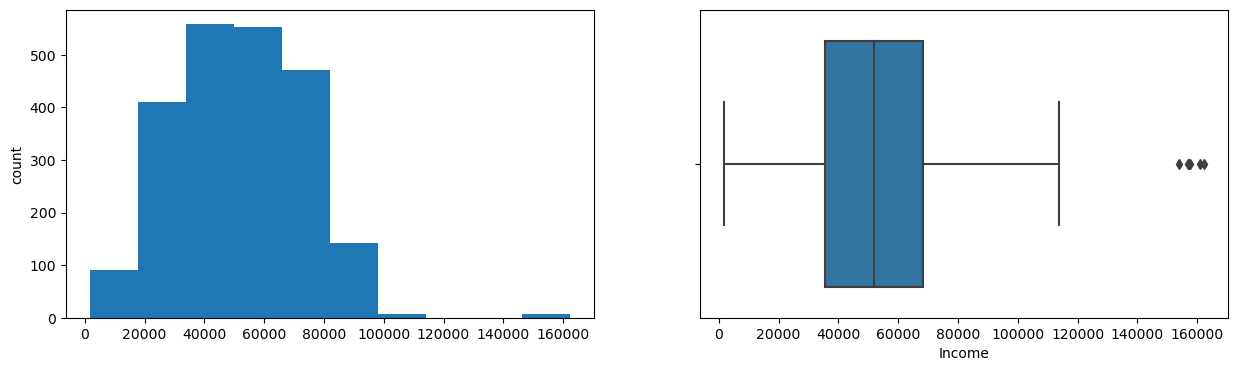

Kidhome
Skew : 0.64


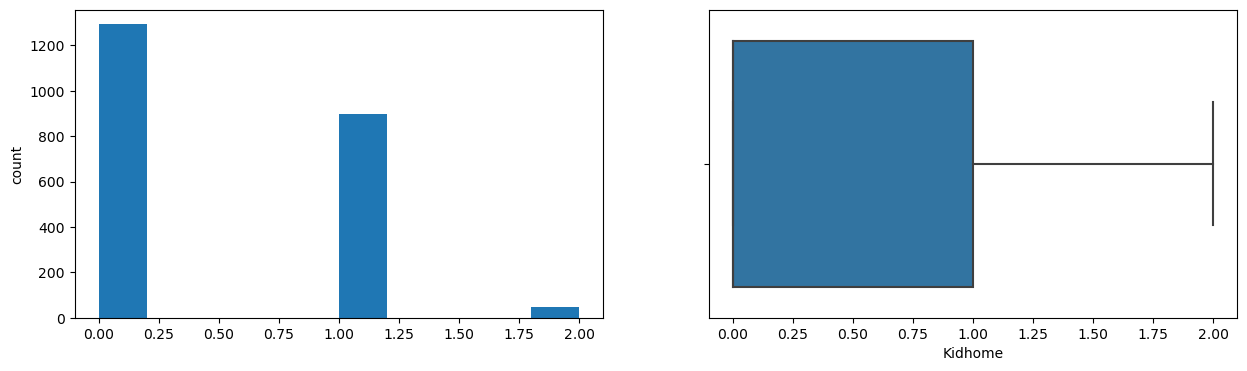

Teenhome
Skew : 0.41


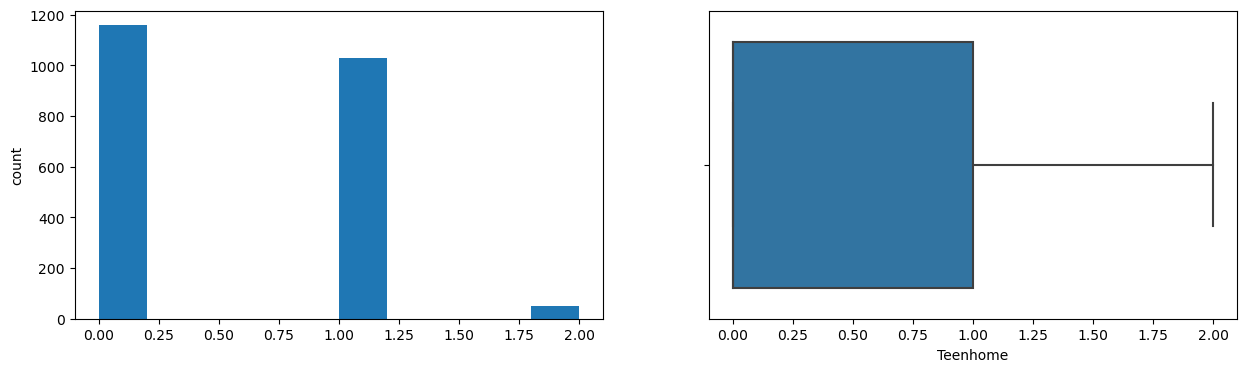

Recency
Skew : -0.0


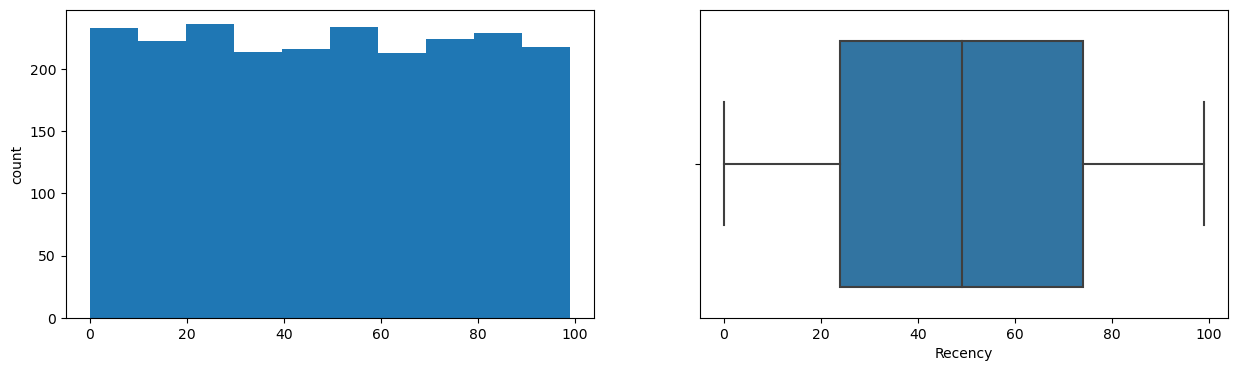

MntWines
Skew : 1.18


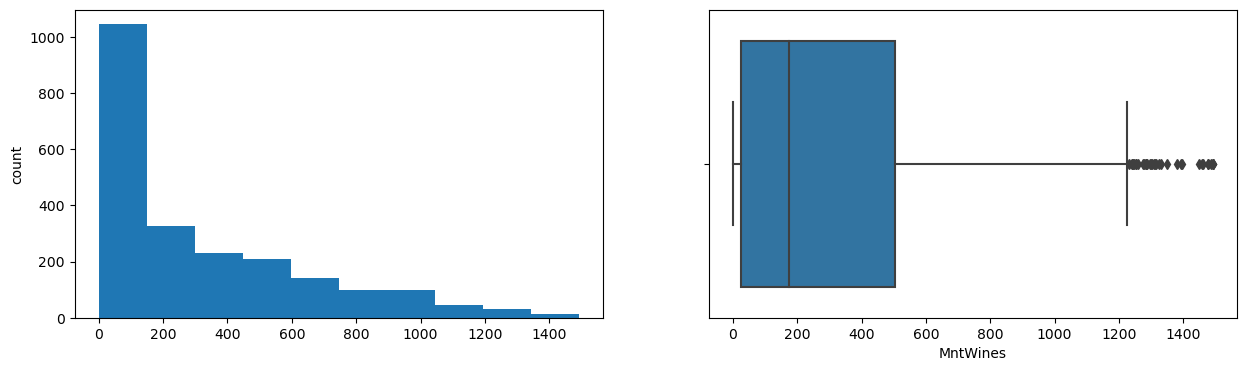

MntFruits
Skew : 2.1


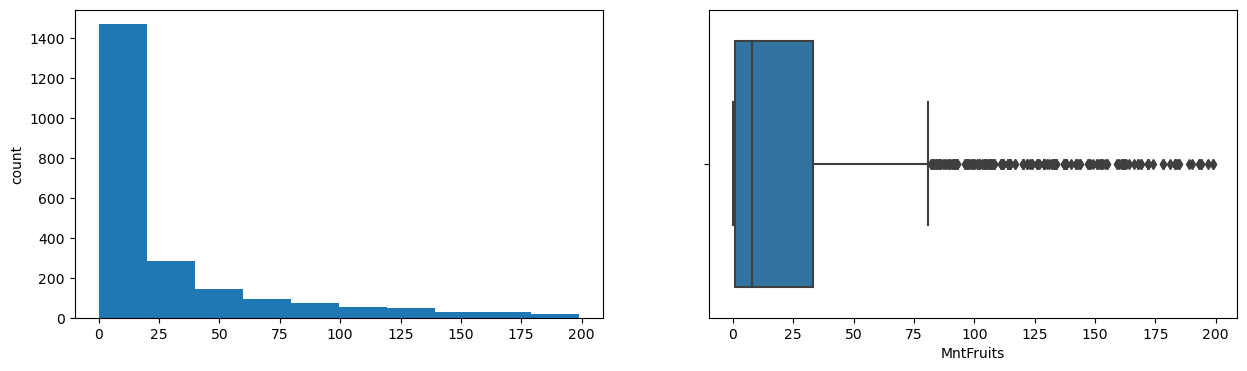

MntMeatProducts
Skew : 2.08


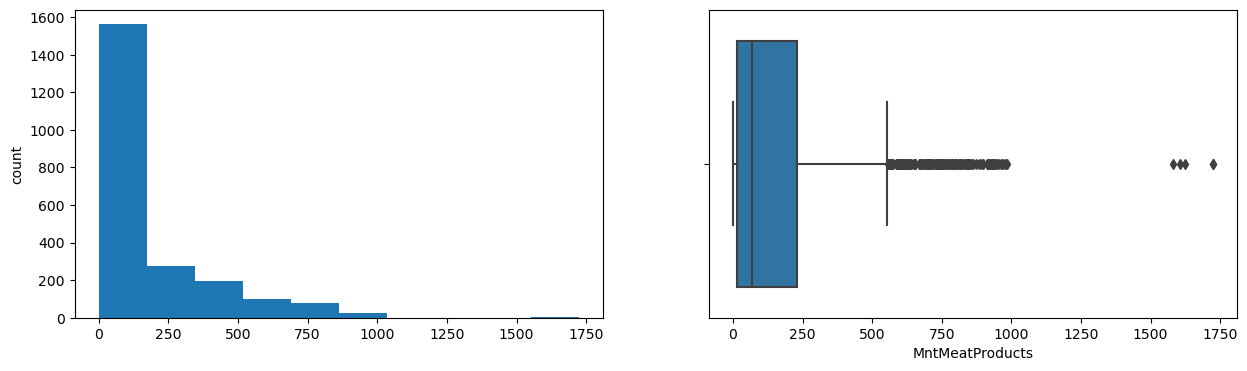

MntFishProducts
Skew : 1.92


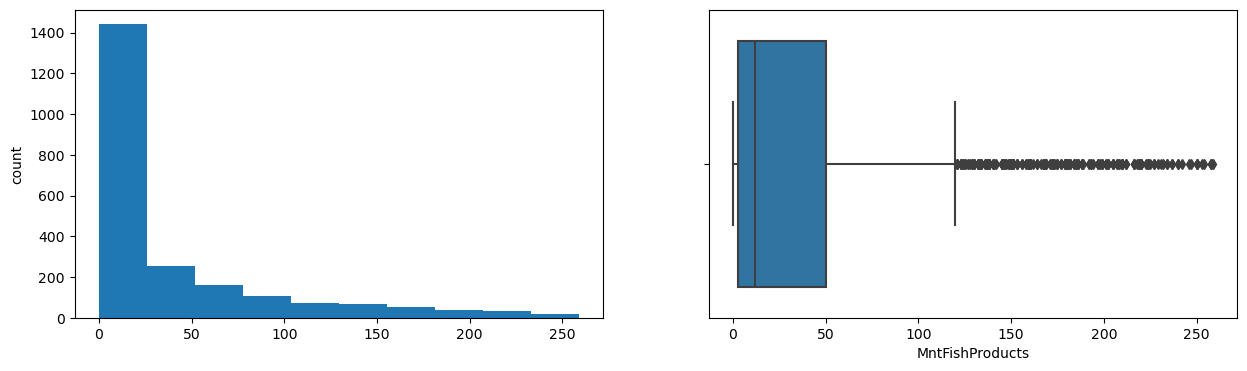

MntSweetProducts
Skew : 2.14


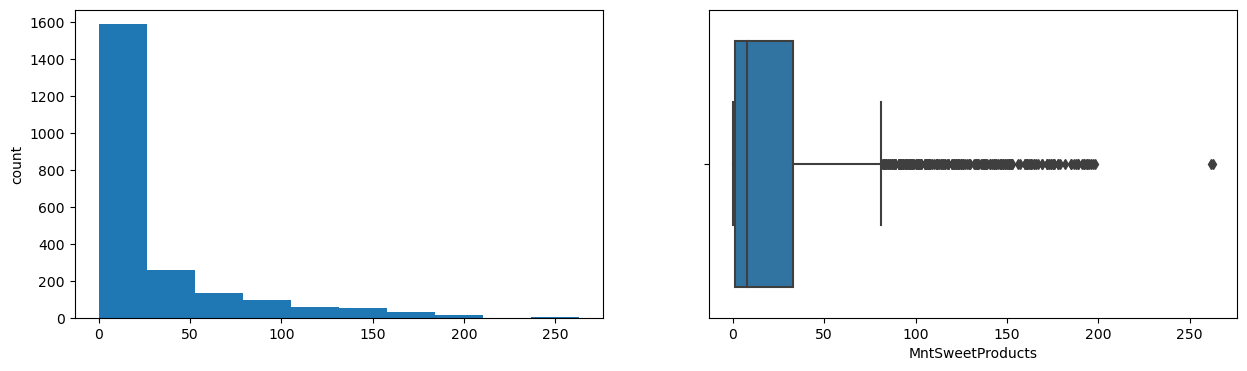

MntGoldProds
Skew : 1.89


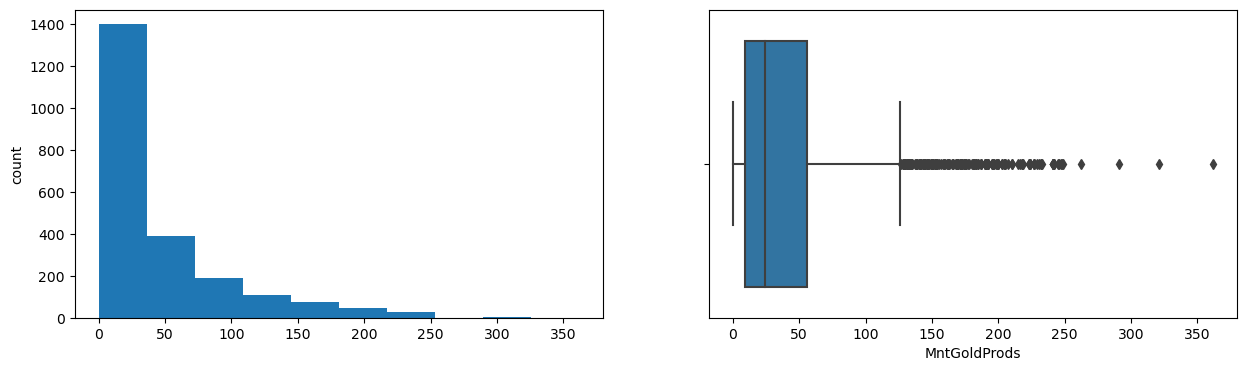

NumDealsPurchases
Skew : 2.42


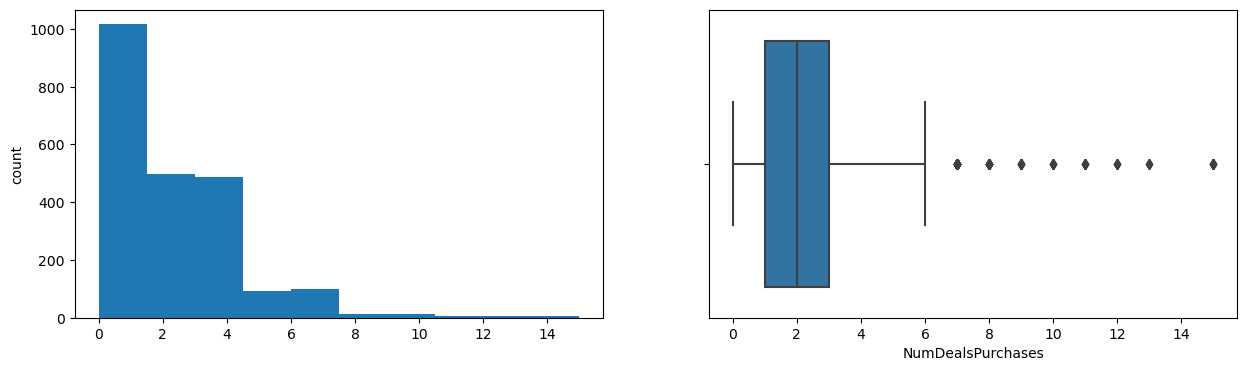

NumWebPurchases
Skew : 1.38


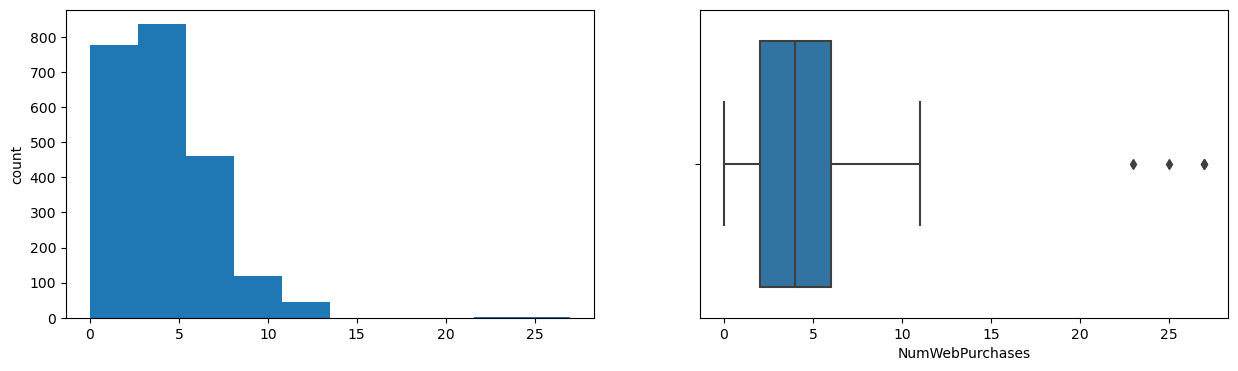

NumCatalogPurchases
Skew : 1.88


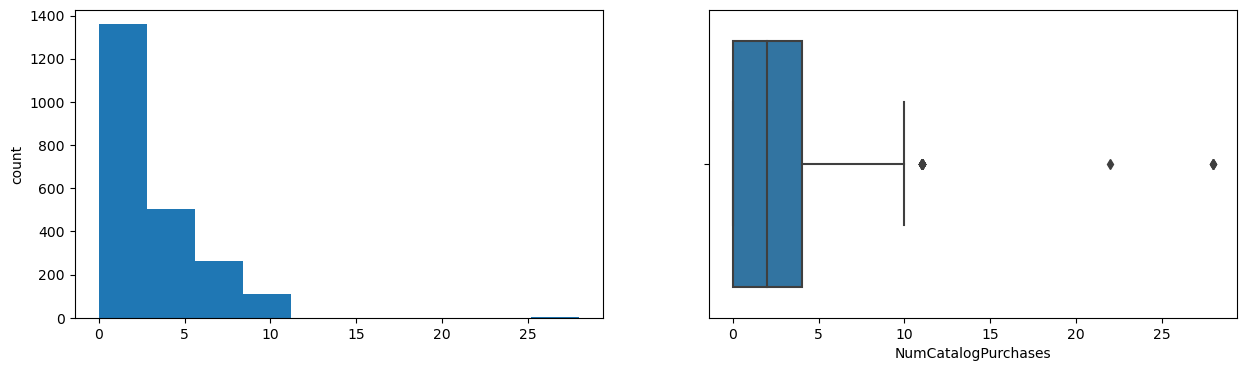

NumStorePurchases
Skew : 0.7


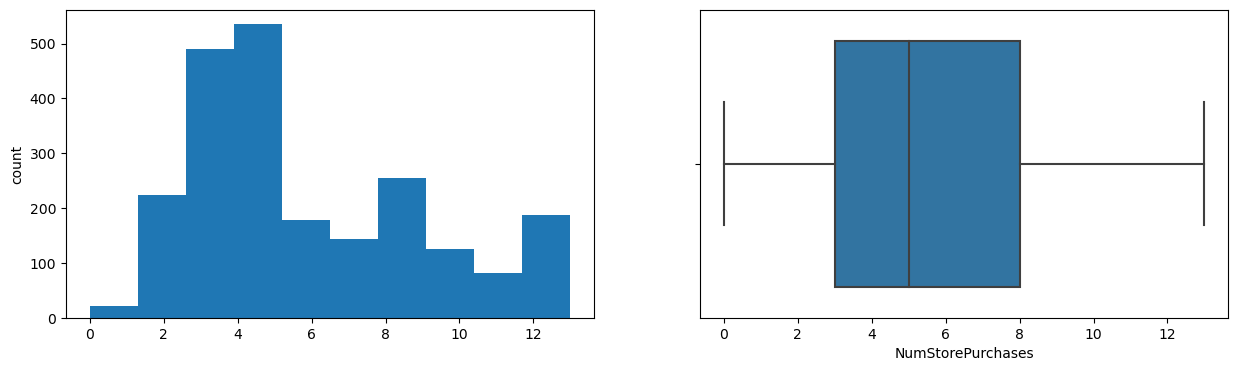

NumWebVisitsMonth
Skew : 0.21


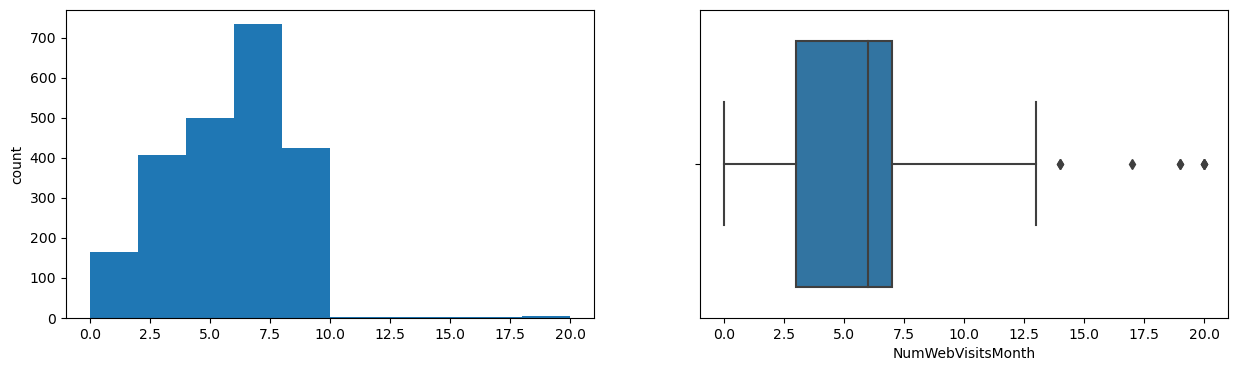

AcceptedCmp3
Skew : 3.29


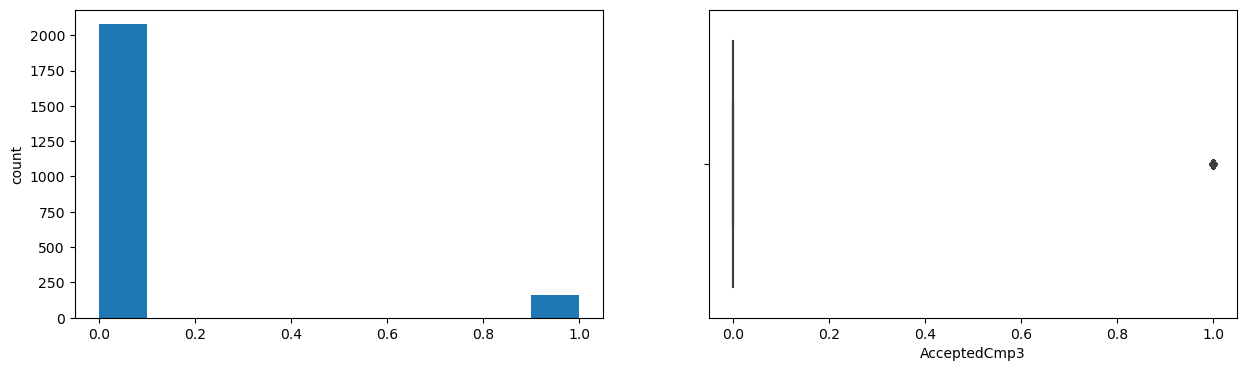

AcceptedCmp4
Skew : 3.24


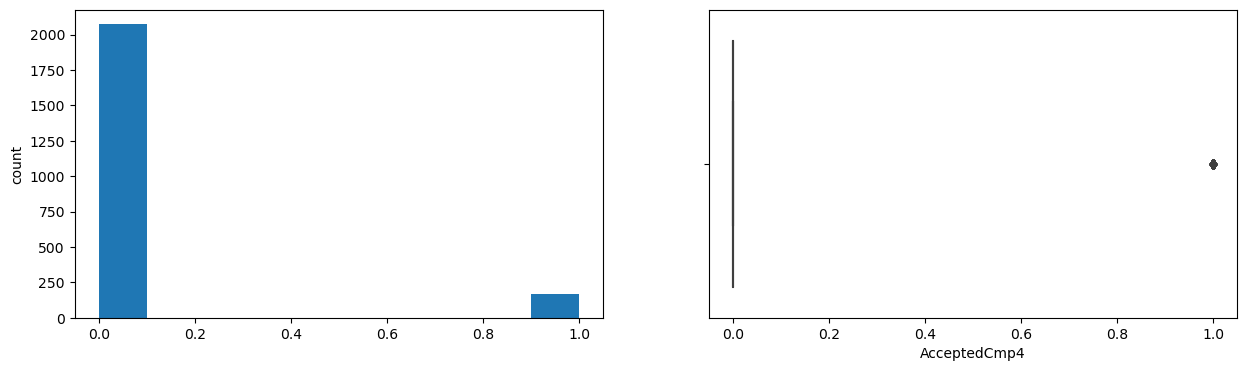

AcceptedCmp5
Skew : 3.29


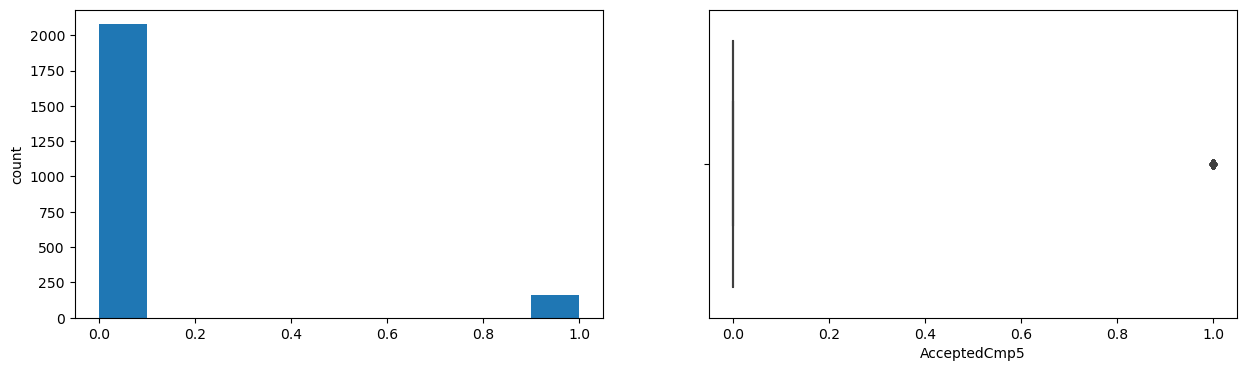

AcceptedCmp1
Skew : 3.56


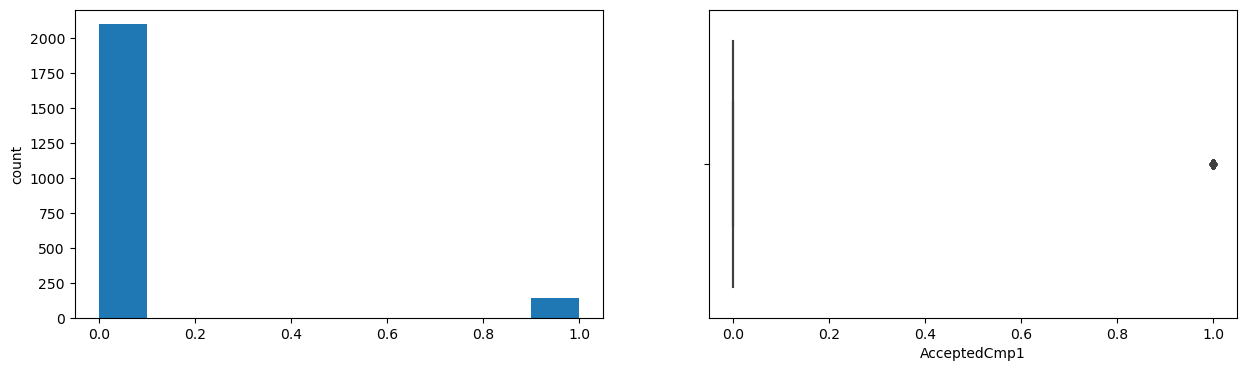

AcceptedCmp2
Skew : 8.62


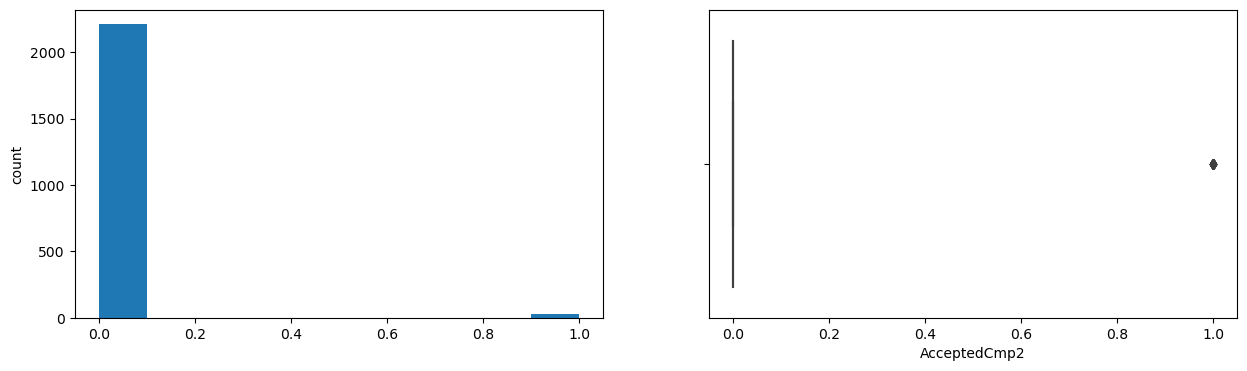

Complain
Skew : 10.19


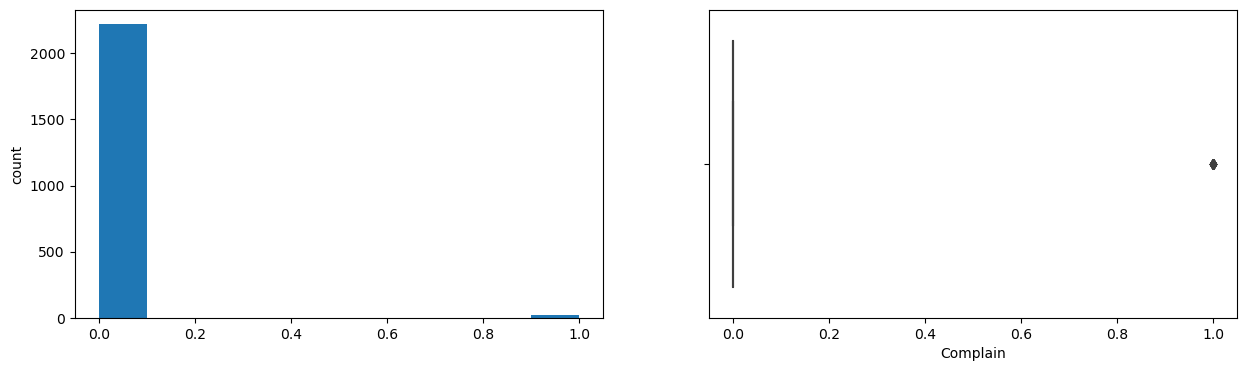

Response
Skew : 1.97


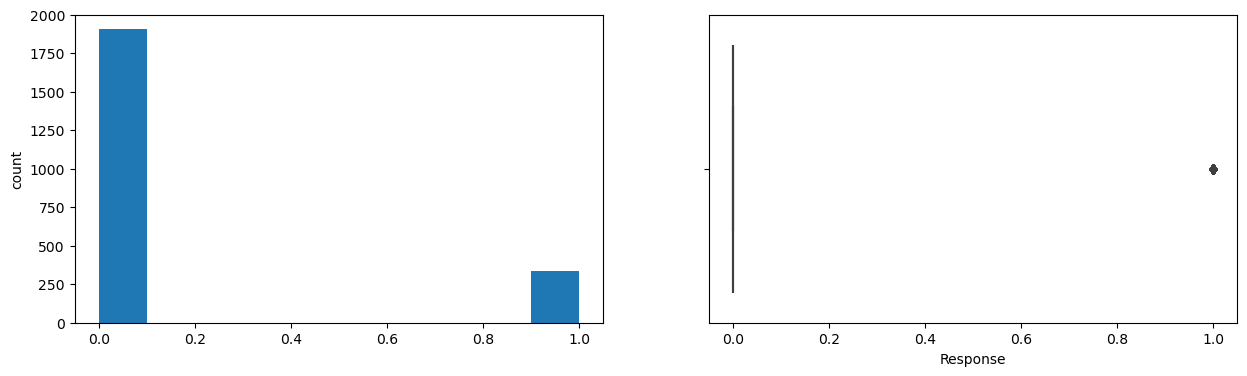

Education_Level
Skew : 0.7


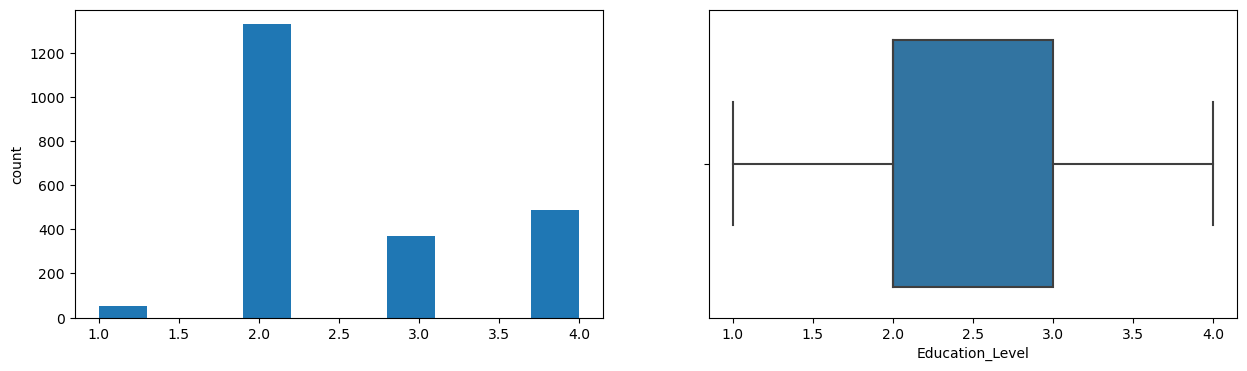

Marital_Status_Size
Skew : -0.72


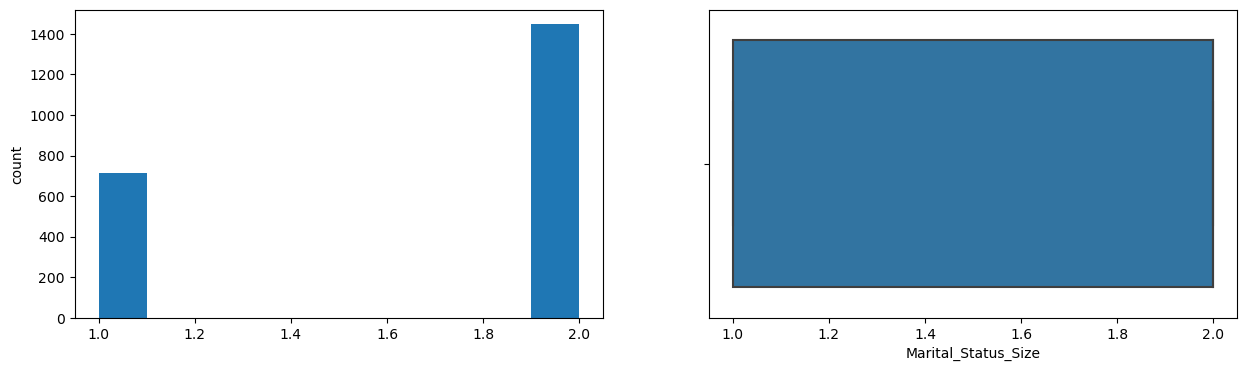

days_since
Skew : 0.01


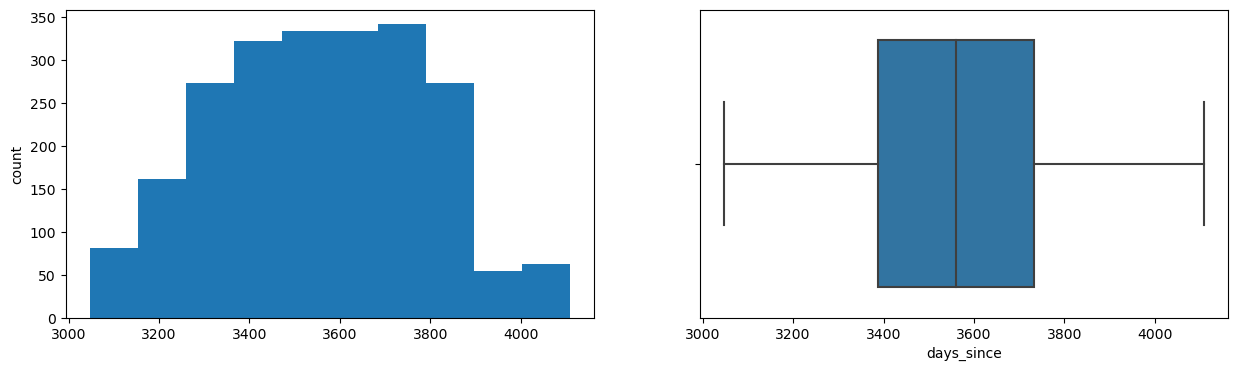

Age
Skew : 0.35


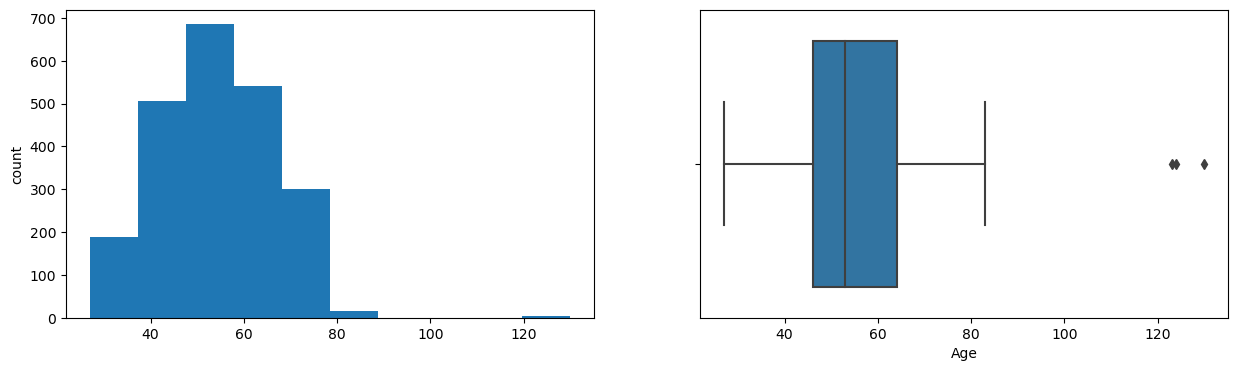

Total_Children
Skew : 0.42


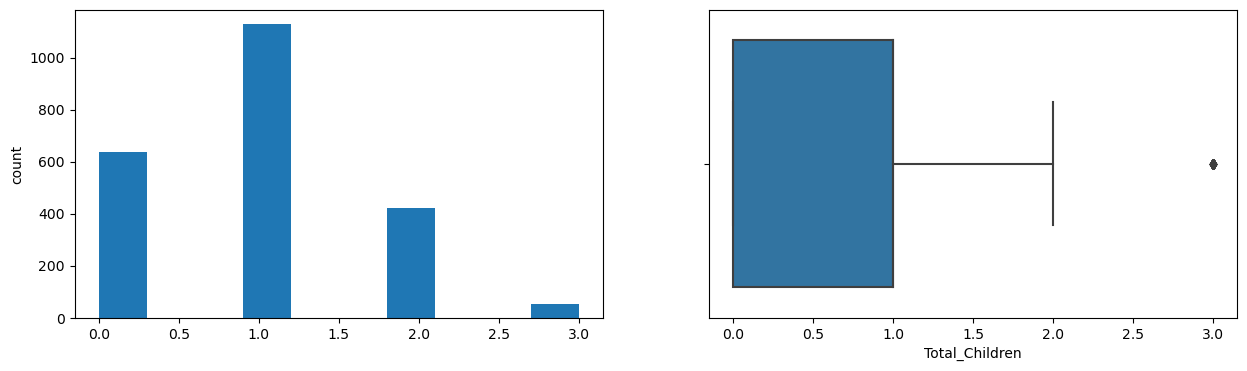

Family_Size
Skew : 0.08


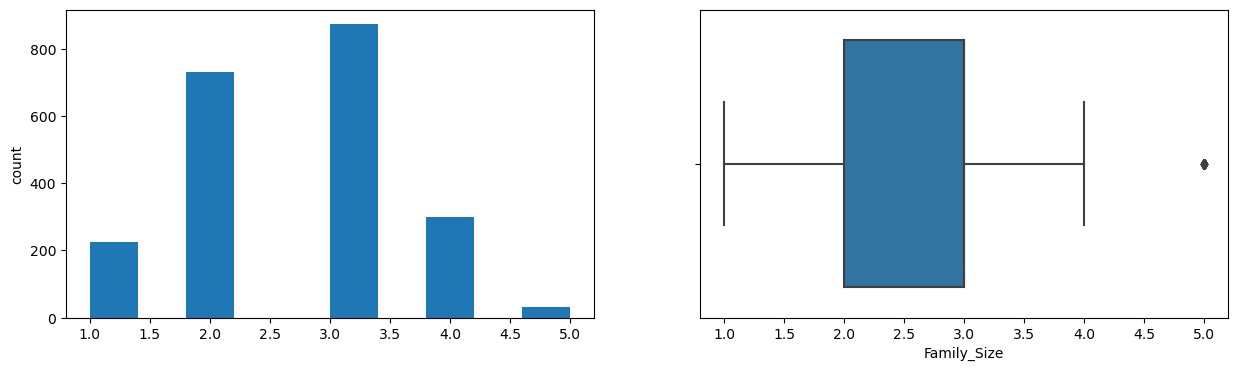

Total_Purchases
Skew : 0.3


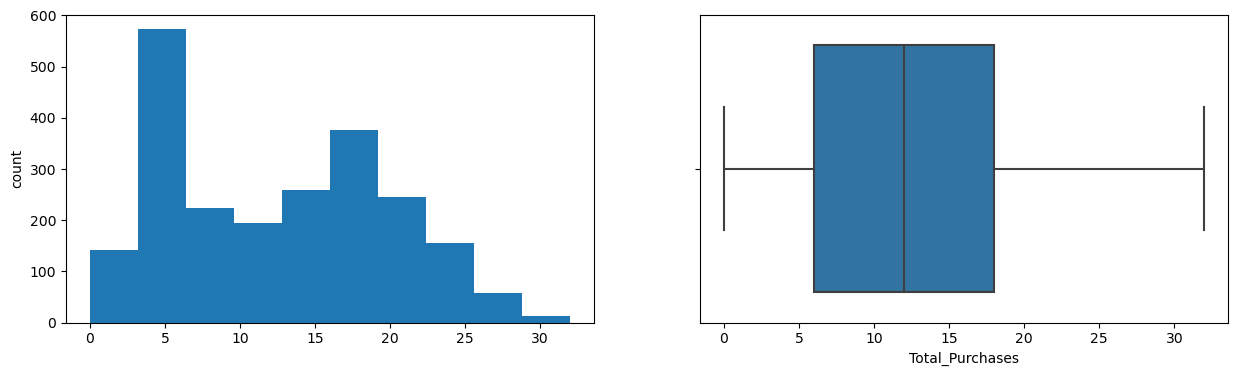

Total_Spent
Skew : 0.86


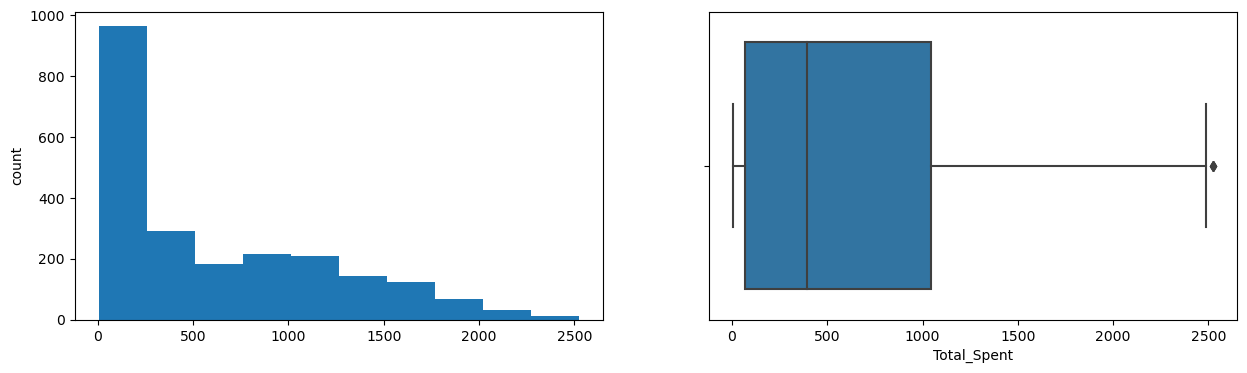

Ave_Purchase
Skew : 20.78


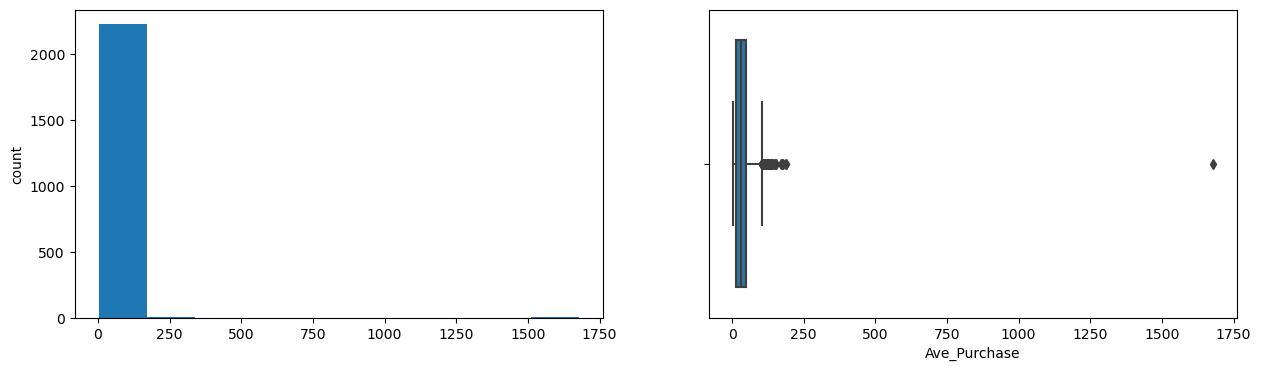

Total_Accepted_Campaigns
Skew : 2.71


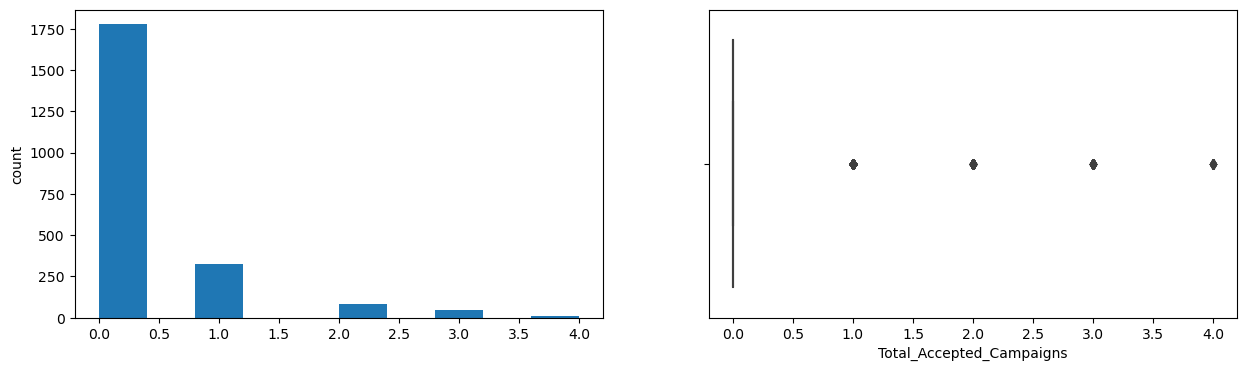

Age_Group_40-49
Skew : 2.23


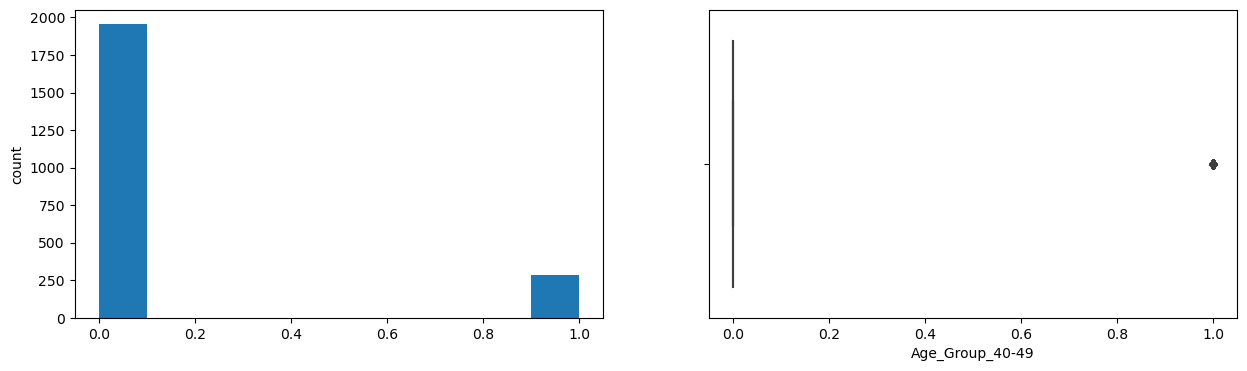

Age_Group_50-59
Skew : 1.0


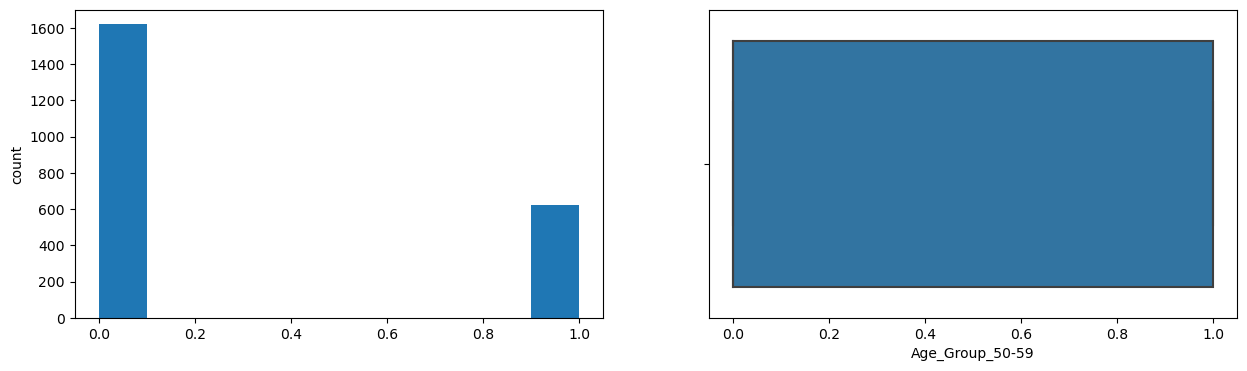

Age_Group_60-69
Skew : 1.0


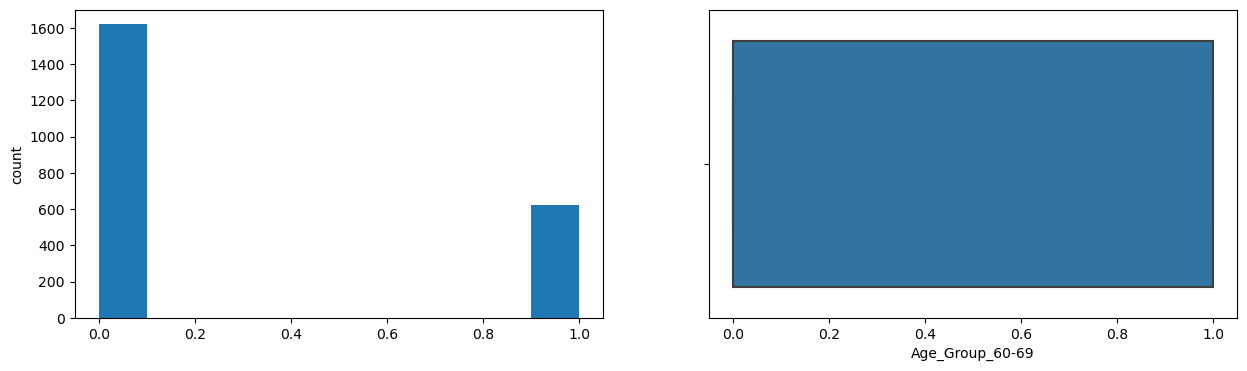

Age_Group_70+
Skew : 1.44


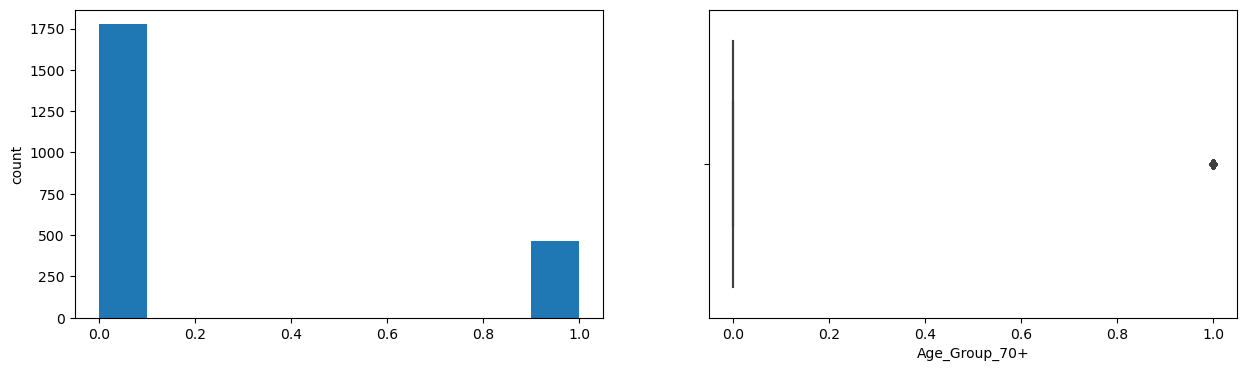

Age_Group_nan
Skew : 2.59


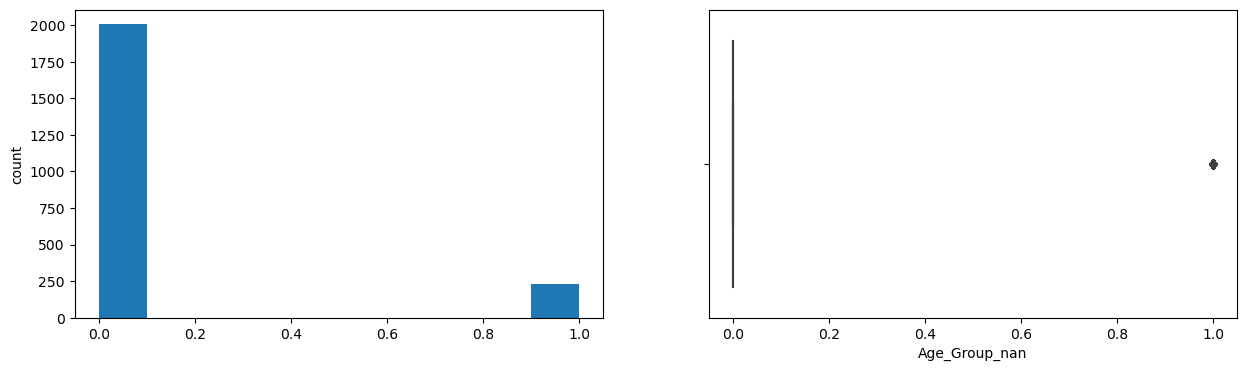

In [47]:
for num_cols in data.columns[1:]:                                             # Creating histogram-boxplots for columns
    print(num_cols)
    
    print('Skew :', round(data[num_cols].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[num_cols].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[num_cols])
    
    plt.show()

In [48]:
data.drop(columns = ['Year_Birth','Kidhome','Teenhome'], inplace = True)                  # dropping ID column

## Observations:

## For numerical columns:
For Year_Birth: Normal distribution between years 1940 and 2000, with a couple outliers to the left<br>
For Income: Shows a normal distribution and most customers have an income between \\$30k and 70k. There are a few outliers with incomes between $100-200k.<br>
For Kidhome: Shows approx. 1300 customers with zero children, 900 customers with 1 child, and 50 with 2 children<br>
For Teenhome: Shows approx. 1150 customers with zero teens, 1100 customers with one teen, and 50 with 2 teens.<br>
For Recency: Shows a fairly uniform distribution between 0-100 days; with slight peaks at 25 and 55 days and slight dips at 20 and 40 days.<br>
For MntWines: Right skewed with mean just under \\$200 in sales. There are over 900 customers spending within \\$50.<br>
For MntFruits: Right skewed with most spending less than \\$25. There are numerous customers however, that spend between \\$100-200 in the last 2 years.<br>
For MntMeatProducts: Right skewed with most spending less than \\$250. There is a large group of outliers spending between \\$500-1000 in the last 2 years.<br>
For MntFishProducts: Right skewed with most spending between \\$10-40. There is a large group of outliers spending between \\$110-250 in the last 2 years.<br>
For MntSweetProducts: Right skewed with most spending between \\$5-25.  There is a large group of outliers spending between \\$80-200 in the last 2 years.<br>
For MntGoldProducts: Right skewed with most spending approx \\$25.<br>
For NumDealsPurchases: Approx 950 customers utilizing one deal and 500 customers utilizing two.<br>
For NumWebPurchases: Right skewed. Customers are making many web purchases- averaging 4 online purchases per person. Less than 50 people don't use the web.<br>
For NumStorePurchases: Slightly right skewed with most customers making 3 purchases in store.<br>
For WebVisitsMonth: Approx 200 customers are visiting the web between 1-4 times each, and approx 400 customers are approaching between 5-9 web visits per month each. This is less than the web purchases; may be opportunity here.<br>
For Accepted Campaigns(1-5): Less than approx 250 people accepted campaign offers 1,3-5; Less than 50 people accepted campaign 2 offer<br>
For Complaints: There are very few complaints; it doesn't seem that this is an issue. <br>
For Response: There are less than 400 people who have responded to the last campaign.

## For categorical columns:
For Education: Approx 85% of customers have college graduation; with 35% of those with graduate level education<br>
For Marital_Status: Approx 65% of customers are in a relationship

## Questions:

<u>1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables</u><br>
See observations and insights below.<br>
<u>2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights.</u><br>
These results are shown above; summaries for these are included below.<br>
<u>3. Are all categories different from each other or can we combine some categories? Is 2n Cycle different from Master?</u><br>
Unless I can confirm what 2n Cycle means, I will keep this separate.<br>
<u>4. There are 8 categories in Marital_Status with some categories having very low count of less than 5. Can we combine these categories with other categories?</u><br>
I have combined these as specified above. It is clear that "alone" means single. It is not clear what Absurd or YOLO would be classified as, so these were changed to the mode. 

### **Bivariate Analysis**

 - Analyze different categorical and numerical variables and check how different variables are related to each other.
 - Check the relationship of numerical variables with categorical variables.

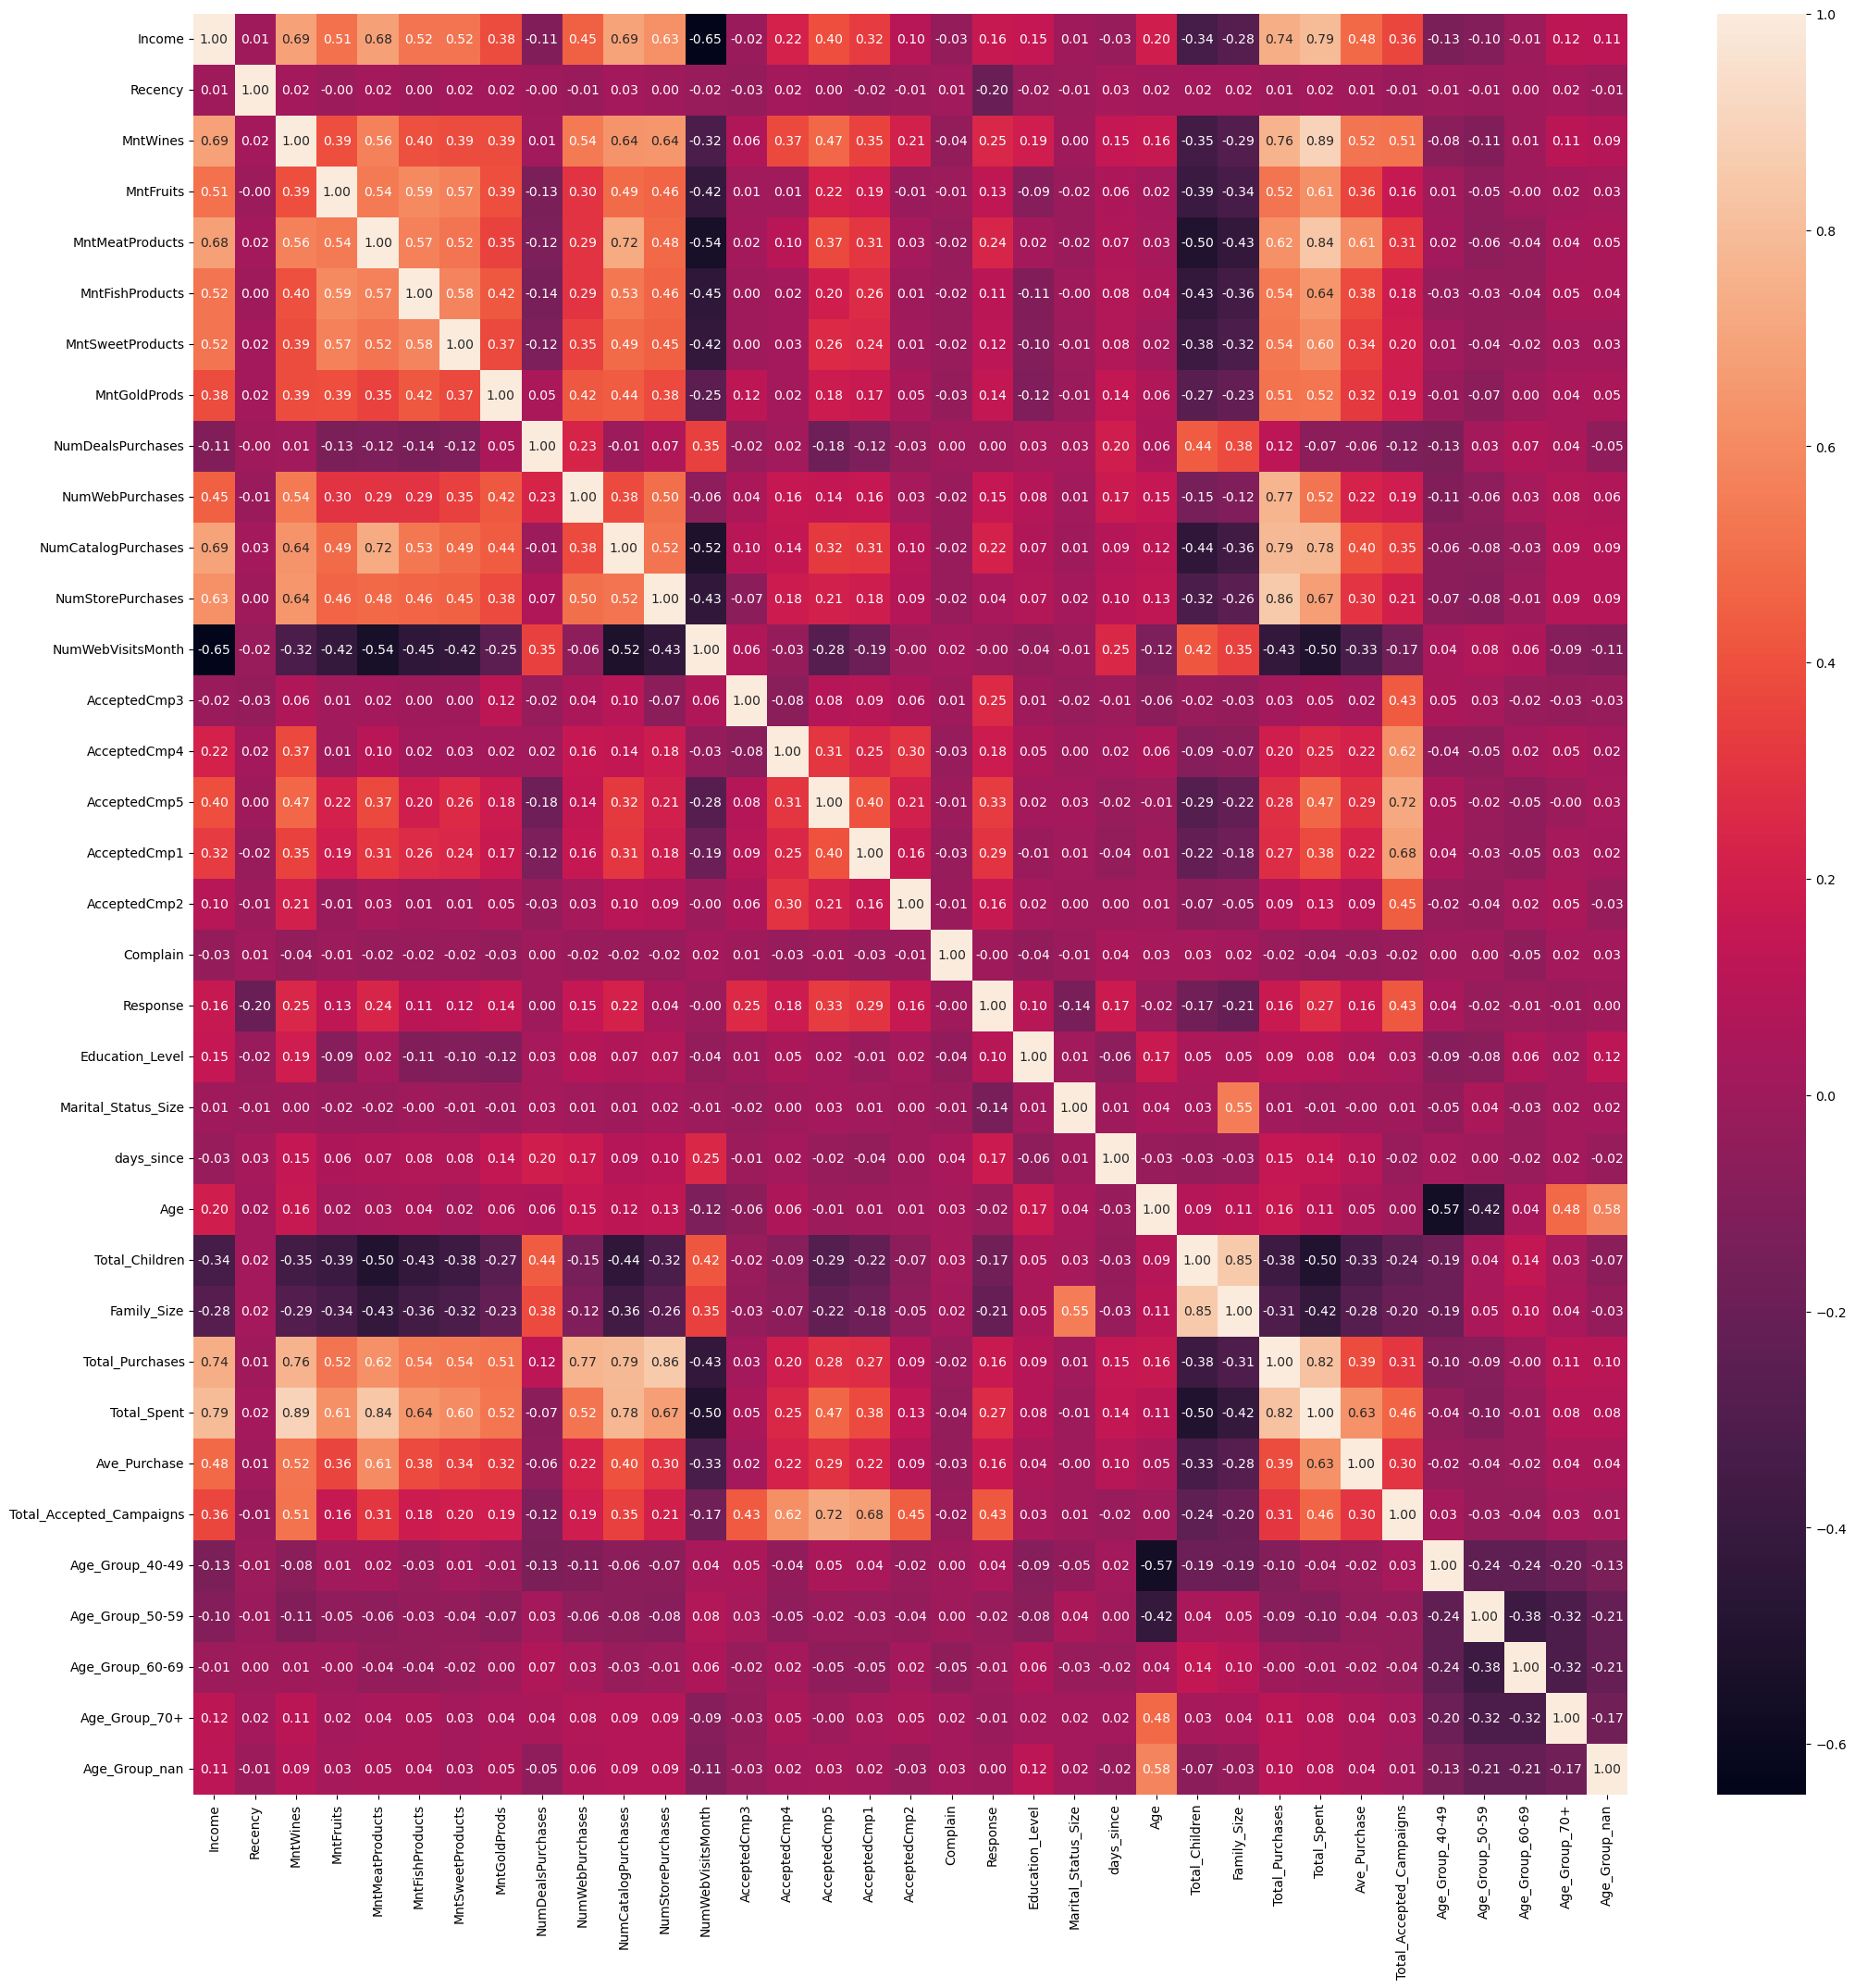

In [49]:
plt.figure(figsize = (25, 25))                                              # Creating heatmap for correlations between variables

sns.heatmap(data.corr(), annot = True, fmt = '0.2f')

plt.show()

## HeatMap Observations:
Year_Birth doesn't correlate closely with any of the variables.<br>
Income is most closely correlated with meat and wine product purchases and online purchases. Income is however negatively correlated with web visits and kid at home.<br>
Kids at home are correlated closest to web visits, and negatively correlates with store visits and catalog purchases.<br>
Teens at home is correlated closes to deals, suggesting savings for these families is important.<br>
Recency doesn't correlate closely with any of the variables.<br>
Wine purchases are closely correlated with store and catalog purchases.<br>
Meat purchases are closely correlated with catalog purchases and income second. These are also correlated with fish purchases.<br>
Fish purchases are related most to meat and sweets purchases. These are moderately correlated with income.<br>
Sweets are related to fruit and fish purchases.These are moderately correlated with income.<br>
Gold purchases are not strongly correlated with any variables. There are moderate correlations to web and catalog purchases, suggesting these purchases may have a bit of research involved.<br>
Deals are only somewhat correlated with teens at home and web visits. Curiously these have almost zero correlation with income.<br>
Web purchases are moderately correlated with wine, as noted above, but they are also moderately correlated with store purchases, suggesting the web visit may have prompted them to go to the store.<br>
Catalog purchases were highest with meat and fish purchases.<br>
Store purchases with highest with wine purchases.<br>
Web visits were highly correlated, although negatively, with income, meat, and catalog purchases. The highest positive correlation, while moderate, is with kid at home.<br>
Campaign 1- low to moderately correlated with wine purchases.<br>
Campaign 2- only slightly correlated with wine purchases.<br>
Campaign 3- no correlation with any purchases.<br>
Campaign 4- low to moderately correlated with wine purchases.<br>
Campaign 5- has almost 50% correlated with wine purchases.<br>
Complaint- There are no correlations for complaints; this may not be an issue as initially expected.<br>
Response- Highest correlation with response is with campaign 5, but still only moderately (30ish percent range).

### **Feature Engineering and Data Processing**

In this section, we will first prepare our dataset for analysis.
- Imputing missing values

**Think About It:**

<u>- Can we extract the age of each customer and create a new feature?</u><br>
Year_Birth outliers (those aged 120-135 yrs) have been updated and replaced with mode for Year_Birth. A new column was added called Age by taking birth year from today. Then another new column, Age_Group, was created so now comparisons can be made between age groups. (See code below.)<br>
<u>- Can we find the total kids and teens in the home?</u><br>
Total children in home can be found by adding kids and teens. There are families with 0, 1, 2 and 3 children. (See code below.)<br>
<u>- Can we find out how many members each family has?</u><br>
Family size can be estimated by combining the number of adults with the total children. Marital_Status_Size will be created to estimate the number of adults. The values for adultsare based on the answers to Marital_Status. If there is one person (single,window,divorced), then the value is 1. If there are two (married, together), then the value is 2. (See code below.)<br>
<u>- Can we find the total amount spent by the customers on various products?</u><br>
Total spent can be found by summing all the purchase columns. The new column Total_Spent was created to reflect this. (See code below.)<br>
<u>- Can we find out how long the customer has been with the company?</u><br> 
Yes, this has been tallied in the column called days_since. The date of joining the company was converted into time and the subtracted from today. This created a column for total days since joining the company. (See code below.)<br>
<u>- Can we find out how many offers the customers have accepted?</u><br>
(See code below.)<br> Yes, another column has been added that provides the total campaigns each customer has participated in. This was created by summing each campaign column.
<u>- Can we find out amount spent per purchase?</u><br>
Yes. To find this, first the columns for the number of different purchases (web, catalog, store) were summed. Then the total spent (found in #9) was divided by the number of purchases. The result was placed in a new column called Ave Spent per Purchase. (See code below.)<br>

## **Important Insights from EDA and Data Preprocessing**

<u>What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?</u><br>

Important observations are:<br>
- Typical family size is 2-3 people and adults are between 40-70 yrs old.<br>
- Average purchase price is \\$50. <br>
- Most of the campaigns were not utilized.<br>
- Meat and wine are the highest selling items.<br>
- Customers have been with the company an average of 3500 days; just shy of 10 years. 

In [50]:
data[data['Ave_Purchase'].isna()]                                     # Looking for null values in new column

Income  Recency  MntWines  MntFruits  MntMeatProducts  \
655   153924.0       81         1          1                1   
981     4861.0       20         2          1                1   
1245    1730.0       65         1          1                3   
1524    3502.0       56         2          1                1   
1846    4023.0       29         5          0                1   
2132  156924.0       85         2          1                2   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
655                 1                 1             1                  0   
981                 1                 0             1                  0   
1245                1                 1             1                 15   
1524                0                 0             1                  0   
1846                1                 1             1                 15   
2132                1                 1             1                  0   

      NumWebPurchases  ...  Family_Size  Total_Purchases  Total_Spent  \
655                 0  ...          1.0                0            6   
981                 0  ...          1.0                0            6   
1245                0  ...          1.0                0            8   
1524                0  ...          2.0                0            5   
1846                0  ...          4.0                0            9   
2132                0  ...          2.0                0            8   

      Ave_Purchase  Total_Accepted_Campaigns  Age_Group_40-49  \
655            NaN                         0                0   
981            NaN                         0                0   
1245           NaN                         0                0   
1524           NaN                         0                0   
1846           NaN                         0                0   
2132           NaN                         0                0   

      Age_Group_50-59  Age_Group_60-69  Age_Group_70+  Age_Group_nan  
655                 1                0              0              0  
981                 0                1              0              0  
1245                0                1              0              0  
1524                1                0              0              0  
1846                0                1              0              0  
2132                0                0              0              1  

[6 rows x 35 columns]

In [51]:
mean_value=data['Ave_Purchase'].mean()                              # Filling null values with mean
data['Ave_Purchase'].fillna(value=mean_value, inplace=True)

In [52]:
data.isnull().sum()                                                  # Double-checking that null values are filled

Income                       0
Recency                      0
MntWines                     0
MntFruits                    0
MntMeatProducts              0
MntFishProducts              0
MntSweetProducts             0
MntGoldProds                 0
NumDealsPurchases            0
NumWebPurchases              0
NumCatalogPurchases          0
NumStorePurchases            0
NumWebVisitsMonth            0
AcceptedCmp3                 0
AcceptedCmp4                 0
AcceptedCmp5                 0
AcceptedCmp1                 0
AcceptedCmp2                 0
Complain                     0
Response                     0
Education_Level              0
Marital_Status_Size         77
days_since                   0
Age                          0
Total_Children               0
Family_Size                 77
Total_Purchases              0
Total_Spent                  0
Ave_Purchase                 0
Total_Accepted_Campaigns     0
Age_Group_40-49              0
Age_Group_50-59              0
Age_Grou

In [53]:
data['Marital_Status_Size'] = data['Marital_Status_Size'].fillna(data['Marital_Status_Size'].median())     # Filling null values in Marital_Status_Size and Family_Size (newer columns)
data['Family_Size'] = data['Family_Size'].fillna(data['Family_Size'].median())

In [54]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)            # Getting rid of infinite values (error when scaling)

In [55]:
data.isnull().sum()                                                 # Double-checking that null values are filled

Income                      0
Recency                     0
MntWines                    0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Response                    0
Education_Level             0
Marital_Status_Size         0
days_since                  0
Age                         0
Total_Children              0
Family_Size                 0
Total_Purchases             0
Total_Spent                 0
Ave_Purchase                0
Total_Accepted_Campaigns    0
Age_Group_40-49             0
Age_Group_50-59             0
Age_Group_60-69             0
Age_Group_

## **Data Preparation for Segmentation**

- The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. So we need to think carefully about the variables we will choose for clustering. Clearly, this is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed.
- Moreover, we often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters. For example, in market research and market segmentation, we can use behavioral data for segmentation (to segment the customers based on their behavior like amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.
- Plot the correlation plot after we've removed the irrelevant variables
- Scale the Data

In [56]:
scaler = StandardScaler()                                       # Scaling the data for better analysis
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled.head()

Income   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.288072  0.307039  0.983781   1.551577         1.679702         2.462147   
1 -0.263023 -0.383664 -0.870479  -0.636301        -0.713225        -0.650449   
2  0.917714 -0.798086  0.362723   0.570804        -0.177032         1.345274   
3 -1.183445 -0.798086 -0.870479  -0.560857        -0.651187        -0.503974   
4  0.295315  1.550305 -0.389085   0.419916        -0.216914         0.155164   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0          1.476500      0.843207           0.349414         1.409304  ...   
1         -0.631503     -0.729006          -0.168236        -1.110409  ...   
2         -0.146905     -0.038766          -0.685887         1.409304  ...   
3         -0.583043     -0.748179          -0.168236        -0.750450  ...   
4         -0.001525     -0.556446           1.384715         0.329427  ...   

   Family_Size  Total_Purchases  Total_Spent  Ave_Purchase  \
0    -1.843898         1.313544     1.679417      0.769644   
1     0.410650        -1.185022    -0.961275     -0.685943   
2    -0.716624         1.035926     0.282673      0.012957   
3     0.410650        -0.907403    -0.918094     -0.640512   
4     0.410650         0.203070    -0.305254     -0.175825   

   Total_Accepted_Campaigns  Age_Group_40-49  Age_Group_50-59  \
0                 -0.439748        -0.382579        -0.618640   
1                 -0.439748        -0.382579        -0.618640   
2                 -0.439748        -0.382579        -0.618640   
3                 -0.439748         2.613842        -0.618640   
4                 -0.439748        -0.382579         1.616448   

   Age_Group_60-69  Age_Group_70+  Age_Group_nan  
0        -0.618640       1.953767      -0.341541  
1        -0.618640       1.953767      -0.341541  
2         1.616448      -0.511832      -0.341541  
3        -0.618640      -0.511832      -0.341541  
4        -0.618640      -0.511832      -0.341541  

[5 rows x 35 columns]

In [57]:
data_scaled.iloc[data_scaled.values==np.inf]                       # Making sure there are no infinite values

Empty DataFrame
Columns: [Income, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Education_Level, Marital_Status_Size, days_since, Age, Total_Children, Family_Size, Total_Purchases, Total_Spent, Ave_Purchase, Total_Accepted_Campaigns, Age_Group_40-49, Age_Group_50-59, Age_Group_60-69, Age_Group_70+, Age_Group_nan]
Index: []

[0 rows x 35 columns]

In [58]:
np.where(data.values >= np.finfo(np.float64).max)                      # Setting a max value for data

(array([], dtype=int64), array([], dtype=int64))

In [59]:
data_scaled_copy = data_scaled.copy(deep = True)                 # Creating copy of the data to store labels from each algorithm     

## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying T-SNE**

In [60]:
from sklearn.decomposition import PCA                     # Importing needed libraries

from sklearn.manifold import TSNE

In [61]:
tsne = TSNE(n_components=2,random_state=1,perplexity=25)           # Running tsne
data_tsne = tsne.fit_transform(data_scaled)    

In [62]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])        # Defining 2 components

In [63]:
data_tsne.shape                                                              # Checking shape

(2240, 2)

In [64]:
data_tsne.head()                                                              # Checking first 5 rows of each component

Component 1  Component 2
0    12.717187    31.837345
1    16.806026    73.942390
2   -18.789181   -11.435628
3    67.797485    -0.940357
4     6.623255   -41.516479

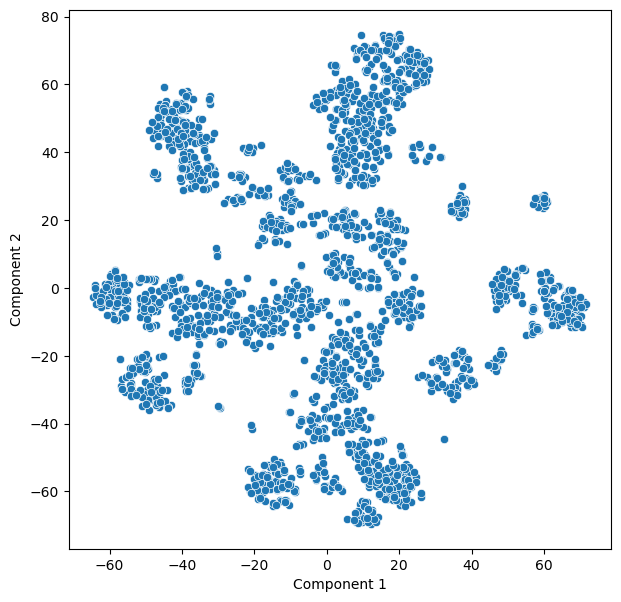

In [65]:
plt.figure(figsize = (7,7))                                                 # Creating a scatterplot for the 2 components

sns.scatterplot(x = 'Component 1', y = 'Component 2', data = data_tsne)

plt.show()

## Observations
With a perplexity of 25, this scatterplot shows some groupings, but it isn't clear where the specific groups are. It also appears to be many groups. 

In [66]:
tsne = TSNE(n_components = 3, random_state = 1)             # Fitting t-SNE with number of components equal to 3 ; to see what 3d model looks like
data_tsne = tsne.fit_transform(data_scaled)
data_tsne = pd.DataFrame(data_tsne, columns = ['X1', 'X2', 'X3'])

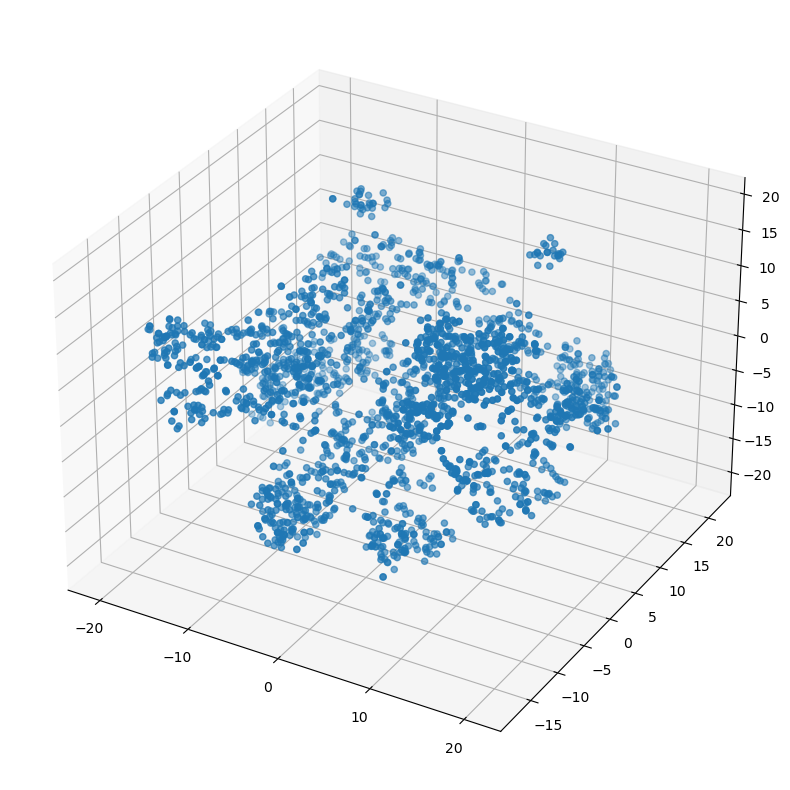

In [67]:
fig = plt.figure(figsize = (10, 10))               # Scatter plot for all three components

ax = fig.add_subplot(111, projection = '3d')

x = data_tsne['X1']

y = data_tsne['X2']

z = data_tsne['X3']

ax.scatter(x, y, z)

plt.show()

## Observations

In the above 3D model, the data is still very clumped together and hard to gain much insight. 

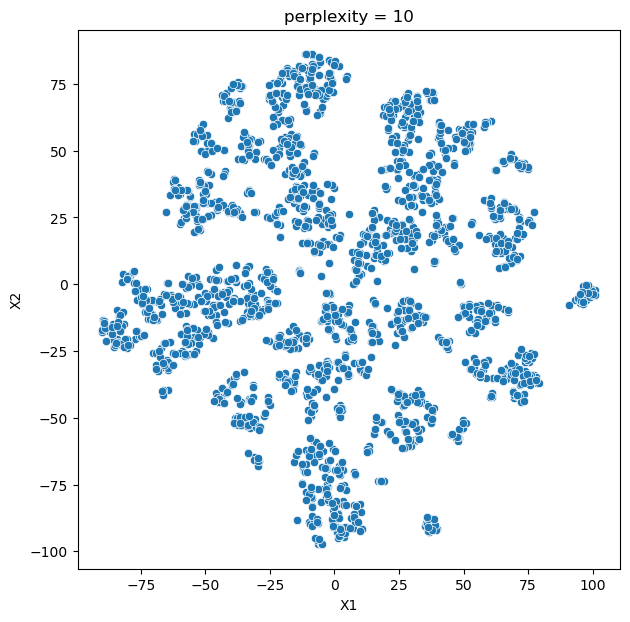

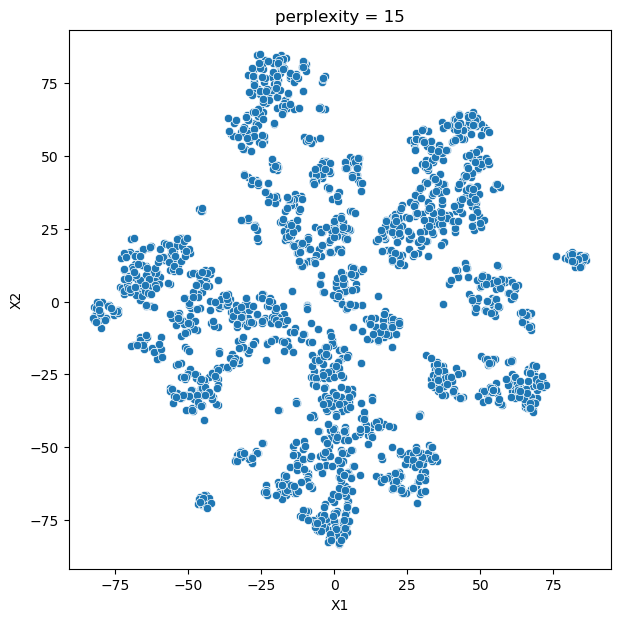

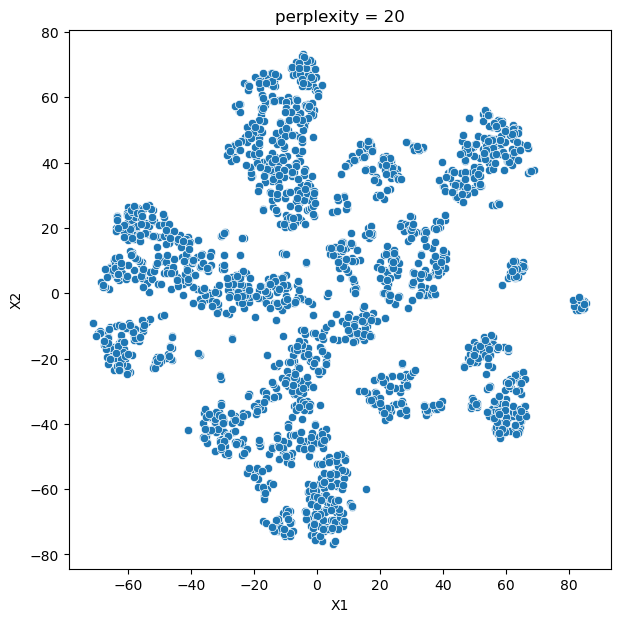

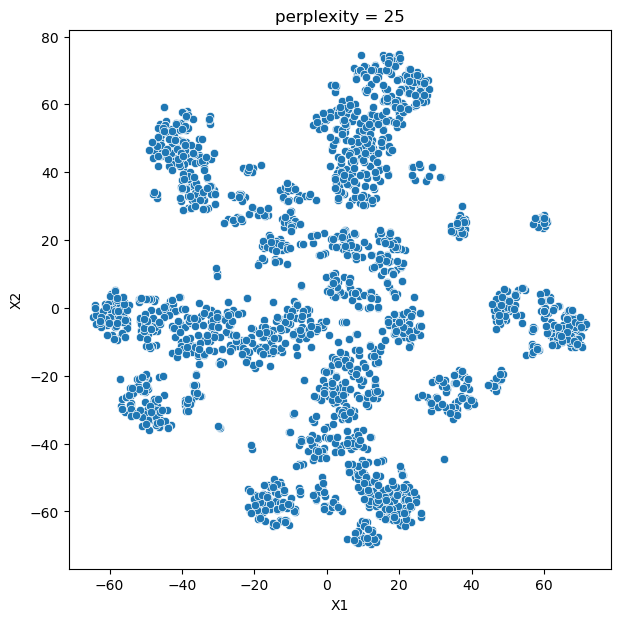

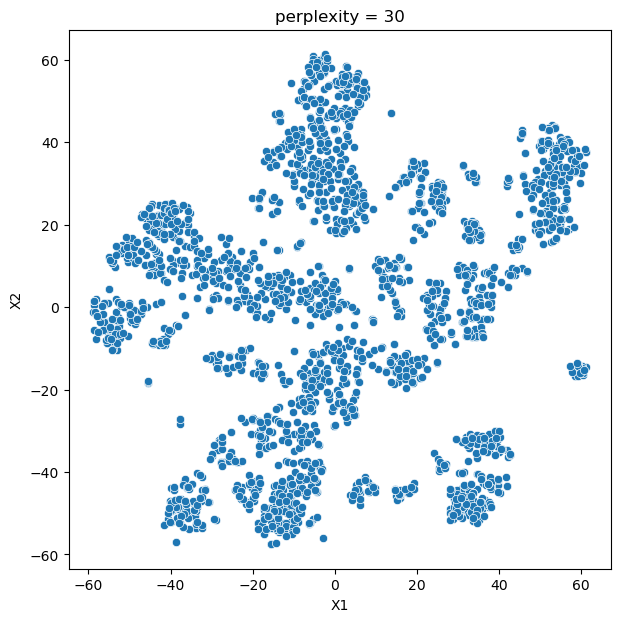

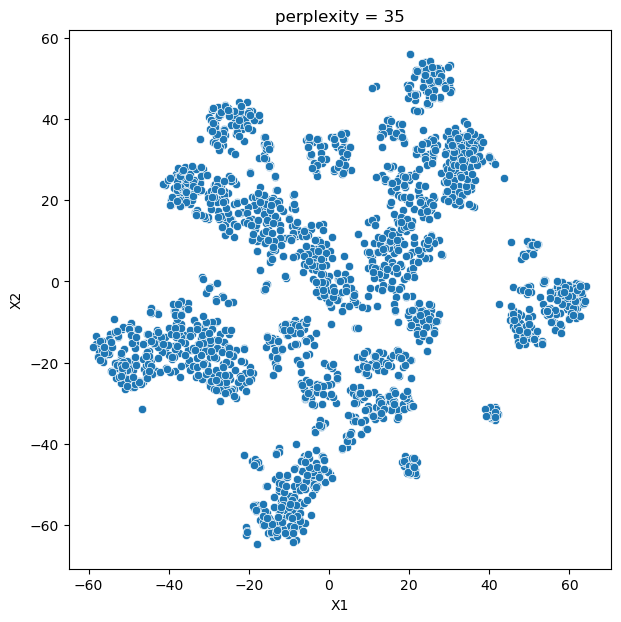

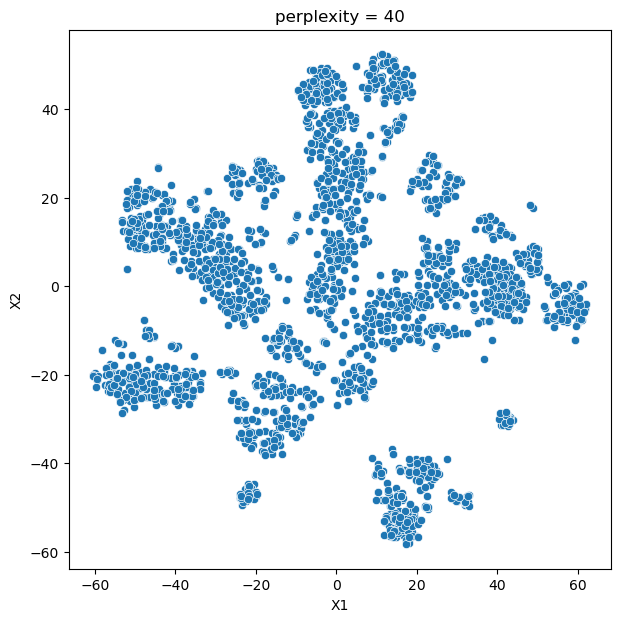

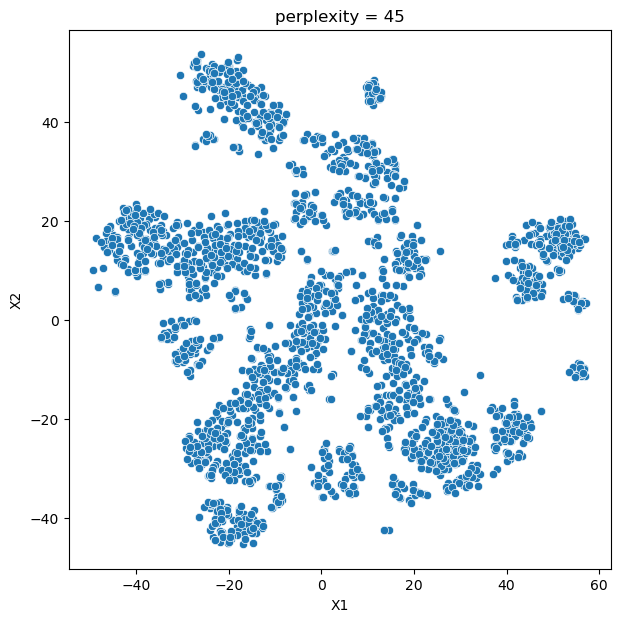

In [68]:
for i in range(10, 50, 5):                                                                 # Running tsne with a variety of perplexities
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
    
    data_tsne = tsne.fit_transform(data_scaled)
    
    data_tsne = pd.DataFrame(data_tsne)
    
    data_tsne.columns = ['X1', 'X2']
    
    plt.figure(figsize = (7, 7))
    
    sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)
    
    plt.title("perplexity = {}".format(i))

## Observations

The above scatterplots range in perplexity from 5 to 45, in increments of 5. There are slight differences between the charts, but again, it is still difficult to find clear distinctions. 

In [69]:
tsne = TSNE(n_components=2,random_state=1,perplexity=150)           # Apply the t-SNE algorithm with random_state = 1

data_tsne = tsne.fit_transform(data_scaled)    # Fit and transform t-SNE function on the scaled data

In [70]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['X1', 'X2'])        # Defining 2 components

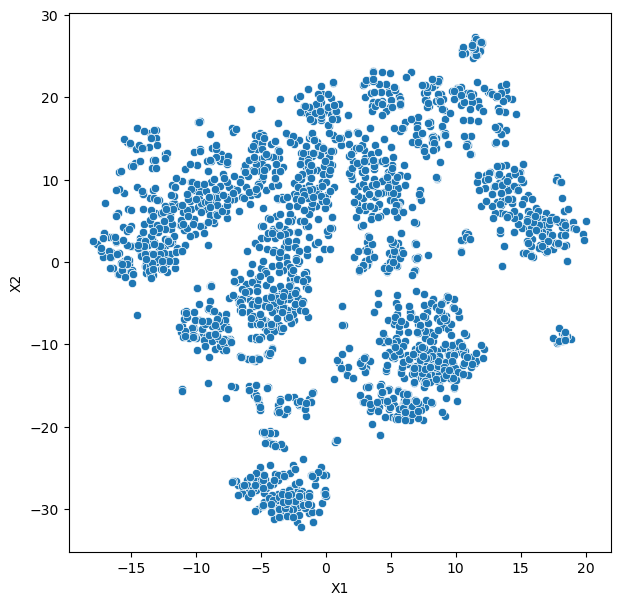

In [71]:
plt.figure(figsize = (7,7))                                                 # Creating a scatterplot for the 2 components

sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)

plt.show()

## Observations
Ran t-sne with a perplexity of 150, above, to see if that helps clarify the groups. 

### **Applying PCA**

**Think about it:**

<u>- Should we apply clustering algorithms on the current data or should we apply PCA on the data before applying clustering algorithms? How would this help?</u><br>
It is better to apply PCA on the data before running algorithms. PCA helps to reduce the dimensions of the dataset- and this dataset has a lot of columns.

In [72]:
n = data_scaled.shape[1]
pca = PCA(n_components=n,random_state=1)               # Finding number of principal components
data_pca = pd.DataFrame(pca.fit_transform(data_scaled))   
exp_var = pca.explained_variance_ratio_                    # Variance percent by each component

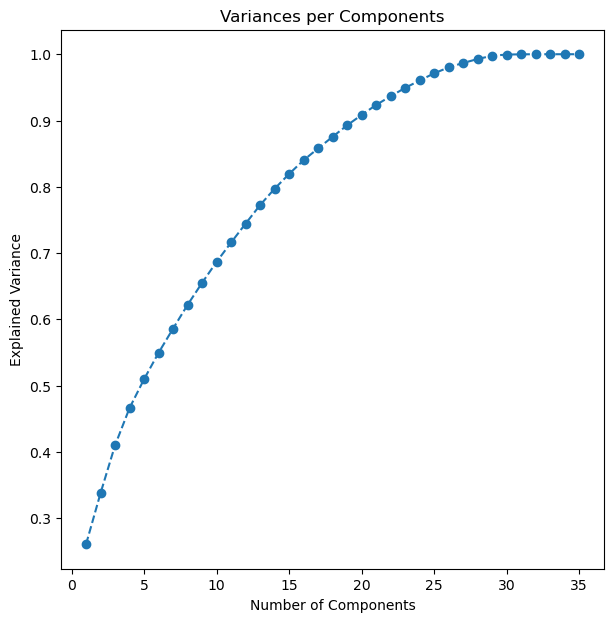

In [73]:
plt.figure(figsize = (7, 7))                   # Looking at the variance per component

plt.plot(range(1, 36), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title('Variances per Components')

plt.xlabel('Number of Components')

plt.ylabel('Explained Variance')

plt.show()

In [74]:
sum = 0                                                                  # Finding components for 70% variance

for ix, i in enumerate(exp_var):
    
    sum = sum + i
    
    if(sum>0.70):
        print("Number of PCs that explain at least 70% variance: ", ix + 1)
        break

Number of PCs that explain at least 70% variance:  11


In [75]:
sum = 0                                                                  # Finding components for 70% variance


for ix, i in enumerate(exp_var):
    
    sum = sum + i
    
    if(sum>0.90):
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  20


In [76]:
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']                        # Looking at data within each component

pc11 = pd.DataFrame(np.round(pca.components_.T[:, 0:11], 2), index = data_scaled.columns, columns = cols)
pc11

PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8  \
Income                    0.28 -0.10 -0.02  0.07 -0.13 -0.08  0.02 -0.07   
Recency                   0.00 -0.04 -0.04  0.02 -0.10 -0.04 -0.29 -0.08   
MntWines                  0.27 -0.09  0.16 -0.06  0.02 -0.05 -0.04 -0.17   
MntFruits                 0.22  0.02 -0.20 -0.05 -0.04 -0.00  0.02  0.19   
MntMeatProducts           0.27  0.05 -0.10  0.01 -0.06 -0.02  0.03  0.02   
MntFishProducts           0.23  0.01 -0.20 -0.03 -0.07  0.05  0.01  0.18   
MntSweetProducts          0.22  0.02 -0.17 -0.06 -0.07  0.02 -0.01  0.17   
MntGoldProds              0.18 -0.06 -0.07 -0.17  0.10  0.08  0.03  0.23   
NumDealsPurchases        -0.04 -0.31  0.11 -0.38  0.09  0.05 -0.02 -0.05   
NumWebPurchases           0.18 -0.23  0.04 -0.26  0.14  0.03  0.02 -0.09   
NumCatalogPurchases       0.27 -0.05 -0.04 -0.02 -0.02  0.01  0.06  0.02   
NumStorePurchases         0.24 -0.17 -0.07 -0.10 -0.02 -0.04 -0.08 -0.17   
NumWebVisitsMonth        -0.20 -0.04  0.19 -0.29  0.23  0.09 -0.02 -0.01   
AcceptedCmp3              0.03  0.13  0.19 -0.09  0.11  0.16  0.34  0.37   
AcceptedCmp4              0.09  0.03  0.37  0.04 -0.05 -0.10 -0.25 -0.25   
AcceptedCmp5              0.17  0.17  0.27  0.09 -0.13 -0.01 -0.00  0.03   
AcceptedCmp1              0.15  0.15  0.26  0.06 -0.11  0.05 -0.00  0.15   
AcceptedCmp2              0.06  0.07  0.31  0.03 -0.01 -0.04 -0.19 -0.06   
Complain                 -0.01 -0.01 -0.01  0.01  0.04  0.18 -0.02  0.05   
Response                  0.10  0.15  0.26 -0.08  0.27  0.10  0.26  0.12   
Education_Level           0.02 -0.14  0.13  0.13  0.05 -0.18  0.24 -0.35   
Marital_Status_Size      -0.01 -0.16  0.06 -0.04 -0.50  0.06 -0.00  0.27   
days_since                0.03 -0.07  0.02 -0.33  0.29  0.21 -0.09  0.00   
Age                       0.04 -0.42  0.09  0.41  0.16  0.13  0.07  0.09   
Total_Children           -0.19 -0.28  0.17 -0.15 -0.13 -0.05  0.02  0.10   
Family_Size              -0.16 -0.32  0.17 -0.14 -0.38 -0.01  0.02  0.23   
Total_Purchases           0.29 -0.18 -0.03 -0.16  0.04 -0.00 -0.00 -0.10   
Total_Spent               0.32 -0.04  0.00 -0.06 -0.01 -0.03 -0.01 -0.03   
Ave_Purchase              0.20  0.03  0.01 -0.00 -0.04 -0.03 -0.03 -0.04   
Total_Accepted_Campaigns  0.18  0.19  0.46  0.04 -0.07  0.03 -0.00  0.10   
Age_Group_40-49          -0.01  0.34 -0.08 -0.12  0.13 -0.02 -0.25  0.09   
Age_Group_50-59          -0.04  0.16 -0.04 -0.27 -0.40  0.30  0.28 -0.38   
Age_Group_60-69          -0.01 -0.11  0.04 -0.08  0.12 -0.73  0.06  0.24   
Age_Group_70+             0.03 -0.21  0.05  0.23  0.10  0.37 -0.48  0.14   
Age_Group_nan             0.04 -0.18  0.01  0.33  0.12  0.16  0.40 -0.08   

                           PC9  PC10  PC11  
Income                   -0.06 -0.10 -0.04  
Recency                   0.10  0.38 -0.63  
MntWines                  0.06 -0.06 -0.03  
MntFruits                -0.04  0.07  0.08  
MntMeatProducts          -0.01 -0.05  0.08  
MntFishProducts          -0.06  0.11  0.10  
MntSweetProducts         -0.02  0.09  0.05  
MntGoldProds              0.01  0.12 -0.12  
NumDealsPurchases        -0.01 -0.04 -0.03  
NumWebPurchases           0.05 -0.03 -0.13  
NumCatalogPurchases      -0.03 -0.07 -0.09  
NumStorePurchases         0.06 -0.06 -0.06  
NumWebVisitsMonth         0.09  0.11  0.06  
AcceptedCmp3             -0.14 -0.14 -0.48  
AcceptedCmp4              0.07  0.18  0.15  
AcceptedCmp5              0.06  0.04  0.03  
AcceptedCmp1             -0.00  0.05  0.01  
AcceptedCmp2             -0.05  0.15  0.04  
Complain                  0.08  0.20 -0.10  
Response                 -0.10 -0.13  0.22  
Education_Level           0.07 -0.46 -0.13  
Marital_Status_Size       0.38 -0.13  0.18  
days_since                0.18  0.18  0.28  
Age                      -0.05  0.15  0.05  
Total_Children           -0.10 -0.03 -0.08  
Family_Size               0.13 -0.09  0.03  
Total_Purchases           0.03 -0.07 -0.11  
Total_Spent               0.02

**Observation and Insights:**

There are 11 primary components needed to reach 70% variation in the data. This is a lot of components. All have relatively low percents; not sure how meaningful this is. <br>
PC1- highest points (still mid-20%) are for income, wine, meat, and catalog purchases. total spent and total purchases approach 30%. <br>
PC2- moderately negative for age, children, family size and age group 40-49.<br>
PC3- holds components for the campaigns and total campaigns. <br>
PC4- holds web visits and purchases, and number of deals; also moderately high for age<br>
PC5- negative for marital status and family size, and holds days between purchases.<br>
PC6- holds complaints and negative age group 50-59. Also holds high negative for age group 40-49.<br>
PC7- holds campaign 3, education level, negative for age group over 70.<br>
PC8- holds campaign 3 also, as well as marital status size and famiy size, suggesting perhaps campaign 3 was more relevant for larger family sizes.<br>
PC9- holds age group 40-49 and marital status size<br>
PC10- holds recency and complaints.<br>
PC11- has highest values for days since and negative for campaign 3.<br>

## **K-Means** 

**Think About It:**

<u>- How do we determine the optimal k value from the elbow curve?</u><br>
The optimal value for K is found by creating the elbow curve and choosing the point where the curve shifts. Finding the silhouette value can help confirm the value.<br>
<u>- Which metric can be used to determine the final k value?</u><br>
The silhouette coefficient can be used to determine the final k value.<br>

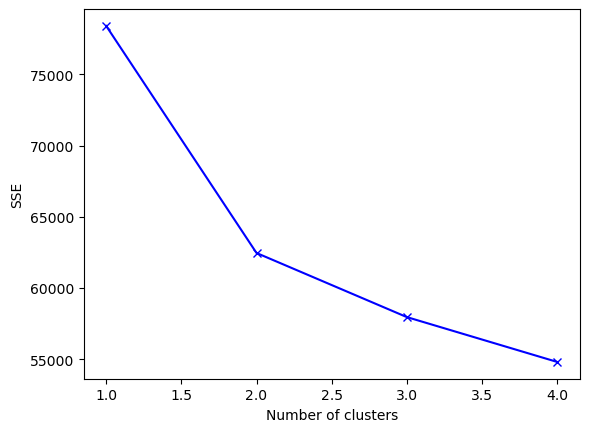

In [77]:
sse = {}                                                                     #  Creating elbow plot

for k in range(1, 5):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_scaled)
    sse[k] = kmeans.inertia_

plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of clusters")

plt.ylabel("SSE")

plt.show()

### **Applying KMeans on the PCA data and visualize the clusters**

In [78]:
kmeans = KMeans(n_clusters = 2, random_state = 1)            # Running kmeans for clusters

kmeans.fit(data_scaled)

data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)

data['KMeans_Labels'] = kmeans.predict(data_scaled)

In [79]:
data['KMeans_Labels'].value_counts()                       # Finding the breakdown of values between the clusters

1    1344
0     896
Name: KMeans_Labels, dtype: int64

In [80]:
mean = data.groupby('KMeans_Labels').mean()              # Checking stats for kmeans and the clusters 0 and 1

median = data.groupby('KMeans_Labels').median()

data_kmeans = pd.concat([mean, median], axis = 0)

data_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_0 Median', 'group_1 Median']

data_kmeans.T

group_0 Mean  group_1 Mean  group_0 Median  \
Income                    71282.961384  39099.622098    71344.500000   
Recency                      49.676339     48.731399       51.000000   
MntWines                    613.526786     97.541667      571.500000   
MntFruits                    55.508929      6.831101       40.000000   
MntMeatProducts             361.583705     37.194196      299.000000   
MntFishProducts              78.489955     10.215774       62.000000   
MntSweetProducts             57.236607      6.947173       42.000000   
MntGoldProds                 75.808036     22.831101       54.000000   
NumDealsPurchases             2.034598      2.518601        1.000000   
NumWebPurchases               5.816964      2.930060        5.000000   
NumCatalogPurchases           5.322545      0.888393        5.000000   
NumStorePurchases             8.579241      3.930804        9.000000   
NumWebVisitsMonth             3.754464      6.357887        3.000000   
AcceptedCmp3                  0.085938      0.063988        0.000000   
AcceptedCmp4                  0.142857      0.029018        0.000000   
AcceptedCmp5                  0.181920      0.000000        0.000000   
AcceptedCmp1                  0.152902      0.005208        0.000000   
AcceptedCmp2                  0.030134      0.001488        0.000000   
Complain                      0.007812      0.010417        0.000000   
Response                      0.233259      0.093006        0.000000   
Education_Level               2.625000      2.541667        2.000000   
Marital_Status_Size           1.666295      1.690476        2.000000   
days_since                 3586.116071   3540.994792     3603.000000   
Age                          56.072545     52.941964       56.000000   
Total_Children                0.498884      1.251488        0.000000   
Family_Size                   2.188616      2.933780        2.000000   
Total_Purchases              19.718750      7.749256       20.000000   
Total_Spent                1242.154018    181.561012     1174.000000   
Ave_Purchase                 67.242992     18.847709       68.049043   
Total_Accepted_Campaigns      0.593750      0.099702        0.000000   
Age_Group_40-49               0.106027      0.142113        0.000000   
Age_Group_50-59               0.212054      0.319940        0.000000   
Age_Group_60-69               0.276786      0.276786        0.000000   
Age_Group_70+                 0.256696      0.174851        0.000000   
Age_Group_nan                 0.136161      0.083333        0.000000   

                          group_1 Median  
Income                      38552.000000  
Recency                        49.000000  
MntWines                       34.000000  
MntFruits                       3.000000  
MntMeatProducts                20.000000  
MntFishProducts                 4.000000  
MntSweetProducts                3.000000  
MntGoldProds                   12.000000  
NumDealsPurchases               2.000000  
NumWebPurchases                 2.000000  
NumCatalogPurchases             1.000000  
NumStorePurchases               3.000000  
NumWebVisitsMonth               7.000000  
AcceptedCmp3                    0.000000  
AcceptedCmp4                    0.000000  
AcceptedCmp5                    0.000000  
AcceptedCmp1                    0.000000  
AcceptedCmp2                    0.000000  
Complain                        0.000000  
Response                        0.000000  
Education_Level                 2.000000  
Marital_Status_Size             2.000000  
days_since                   3539.000000  
Age                            51.000000  
Total_Children                  1.000000  
Family_Size                     3.000000  
Total_Purchases                 6.000000  
Total_Spent                    91.000000  
Ave_Purchase                   15.708333  
Total_Accepted_Campaigns        0.000000  
Age_Group_40-49                 0.000000  
Age_Group_50-59                 0.000000  
Age_Group_60-6

### **Applying KMeans on the PCA data and visualize the clusters**

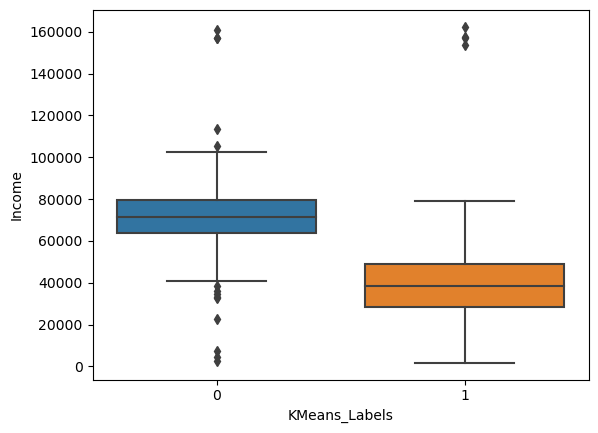

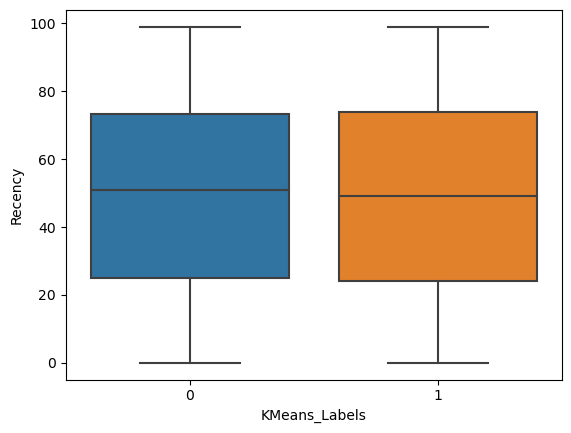

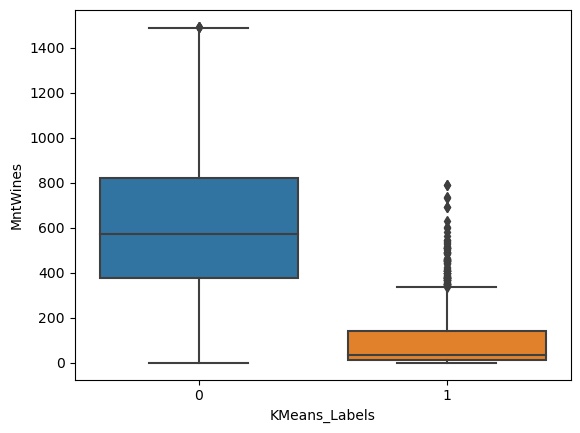

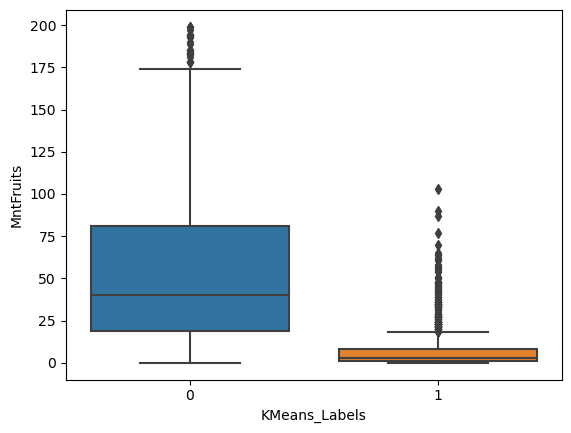

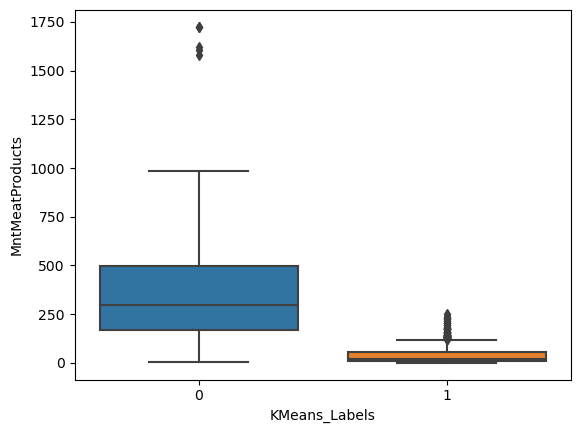

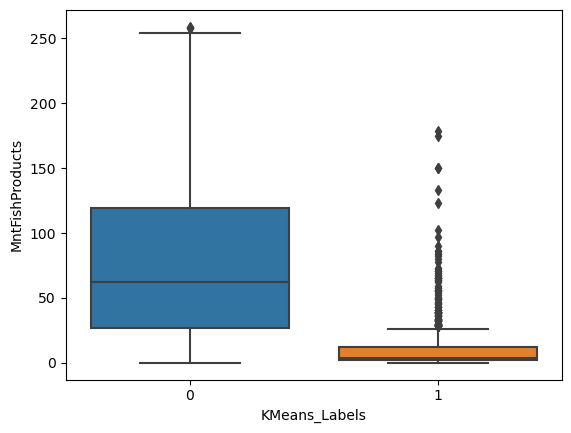

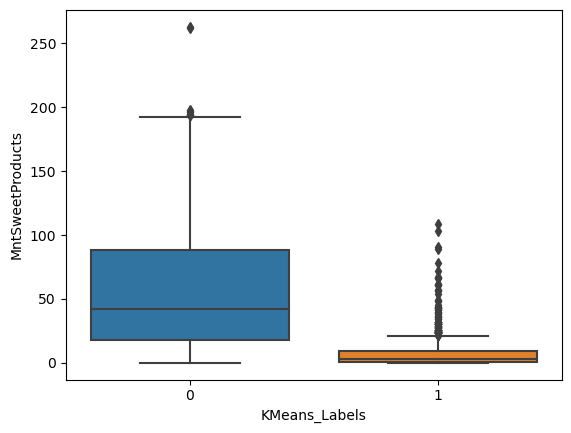

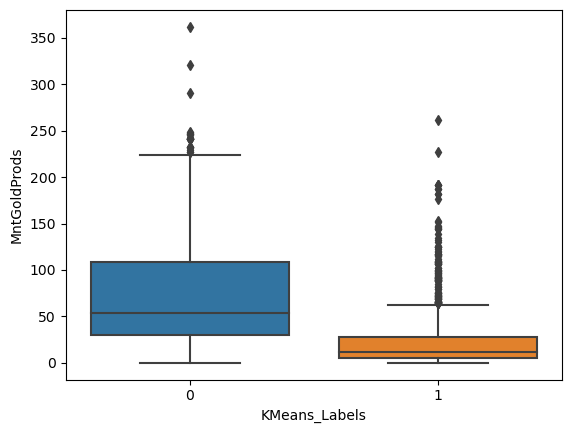

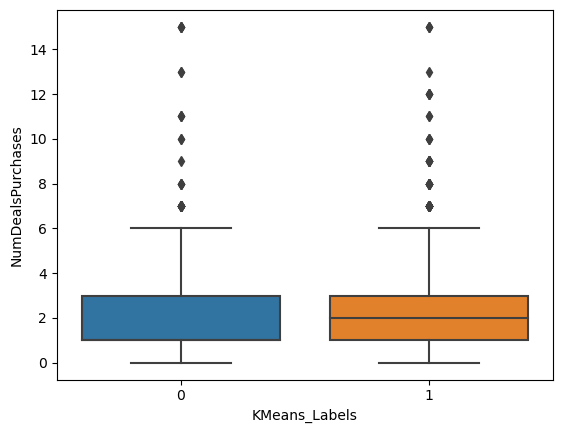

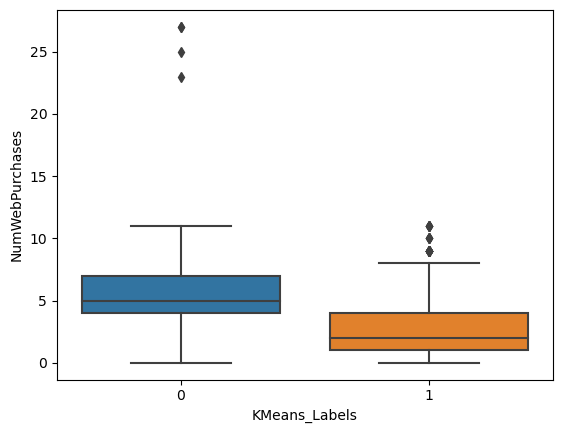

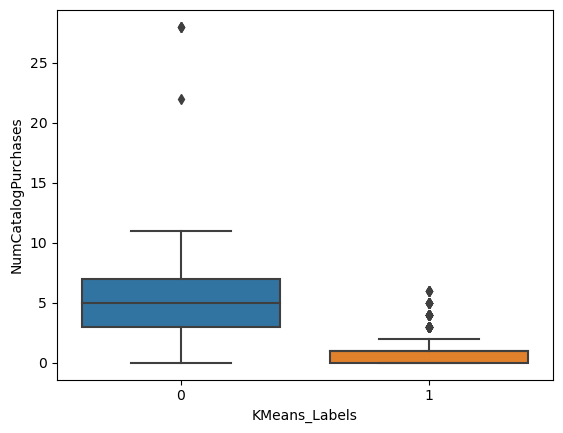

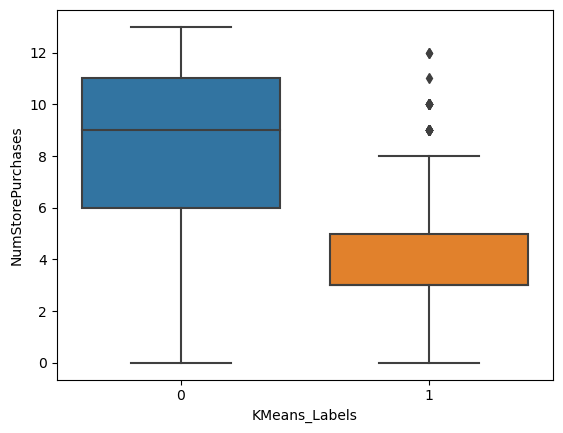

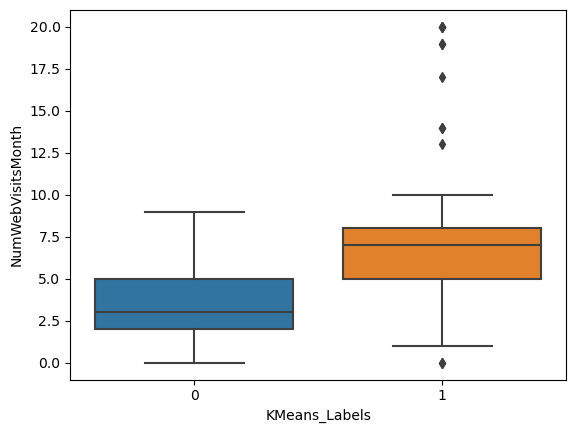

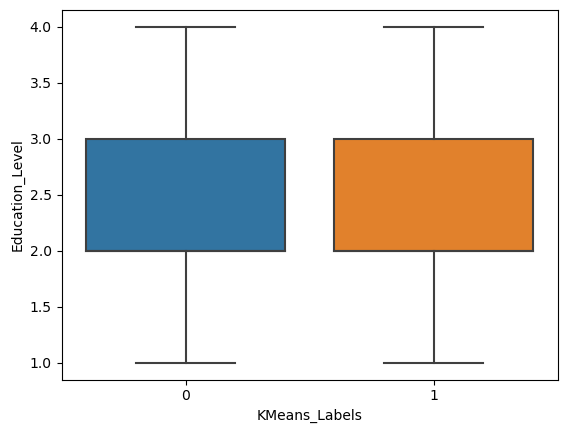

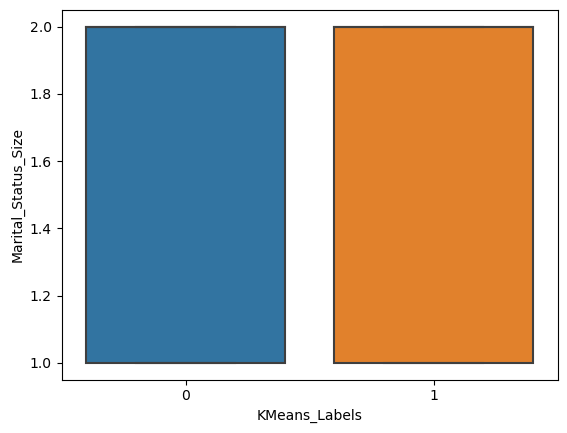

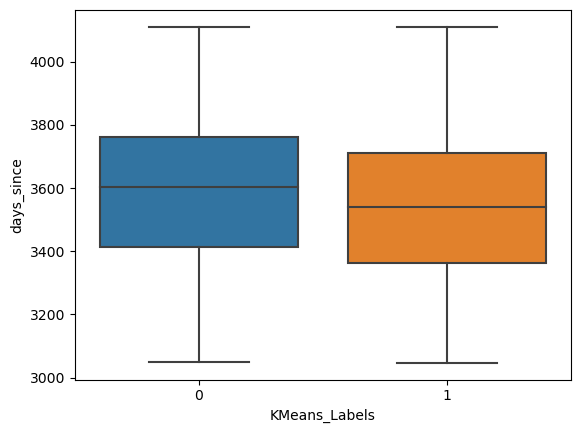

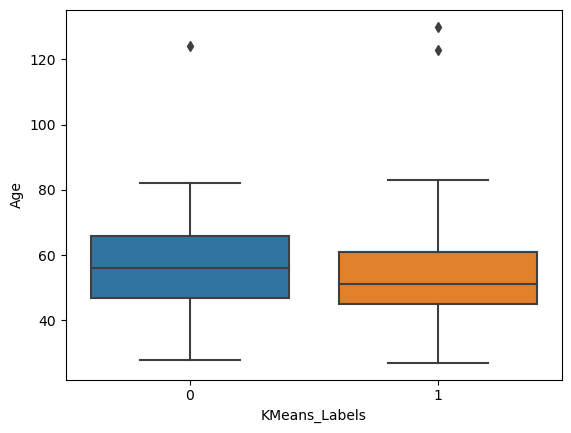

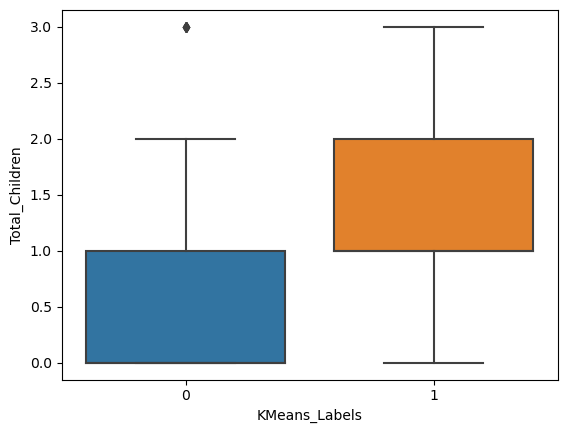

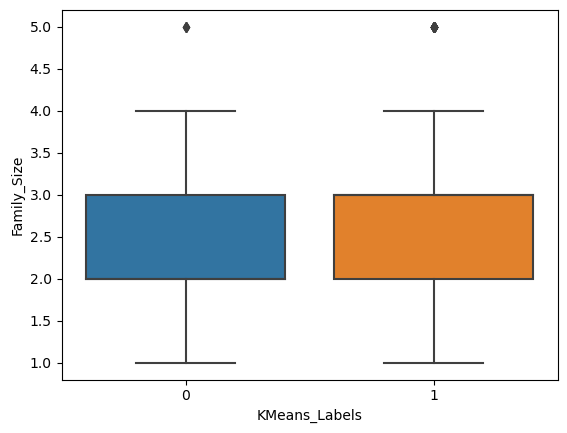

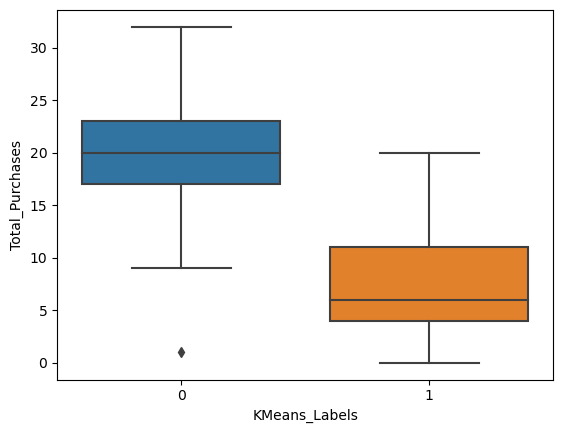

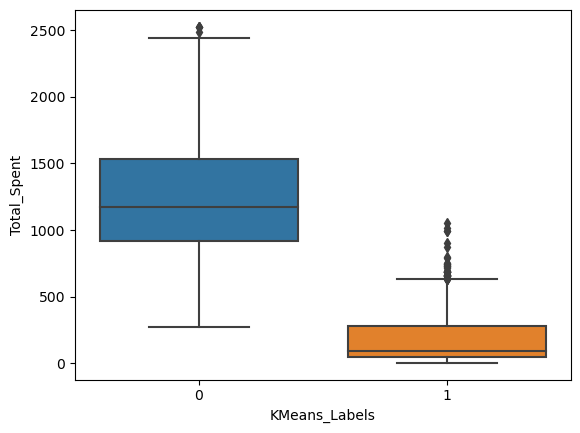

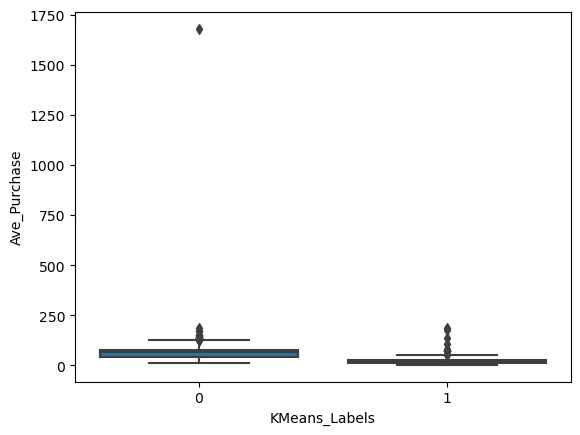

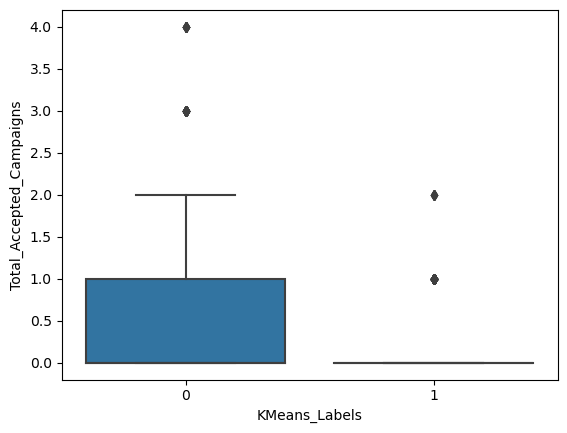

In [81]:
# Checking boxplots for clusters 
cols_visualise = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Education_Level', 'Marital_Status_Size', 'days_since', 'Age', 'Total_Children', 'Family_Size', 'Total_Purchases', 'Total_Spent', 'Ave_Purchase', 'Total_Accepted_Campaigns']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = data)
    plt.show()

### **Cluster Profiling**

### **Describe the characteristics of each cluster**

**Summary of each cluster:**

**Observations and Insights:**<br>

Cluster 0- This cluster has a higher income, between 60-80k. They are between 50-70 yrs old. They have 0 or 1 children with family sizes between 2-3. On average they spend more than Cluster 1, averaging: wine- between 400-600, fruit- between 25-80, meat- between 200-500, fish- between 25-80, sweets- between 20-90, and gold: between 40-115. They make more than twice as many purchases as Cluster 1 with the average purchase price between 50-100.  Their total expenditures range between 1000-1500. They have used none or only 1 campaign. They shop more in the store, then web purchases are second, and catalog purchases are third- and are primary audience for catalog use. They visit the website less than Cluster 1, with between 2-5 visits. 

Cluster 1- This cluster has a lower income, between 35-50k. They are slightly younger than cluster 0, with a range between 50-60 yrs old. They have more children- between 1-2 and family sizes are the same as cluster 0, suggesting there may be some one parent households. On average, they spend less than Cluster 0: wine-less than 100, fruit- less than 15, meat- less than 50, fish- less than 20, sweets- less than 20, and gold- less than 25. They are making between 4-10 purchases with the average purchase price less than 50. Their total expenditures are less than 250. They haven't used any campaigns. They  make between 1-4 web purchases, 0-1 catalog purchases, and 3-5 store purchases. They use the website almost twice as much as Cluster 0, between 3-5 times. 

The recency/days between purchases are the same for both clusters, with a range between 25-75 days. Number of deals is also the same, between 1-3 deals. Education levels are approximately the same, the bulk with degrees. Days since they've become customers is the same, ranging between 3350-3700. 

**Think About It:**<br>
<u>- Are the K-Means profiles providing any deep insights into customer purchasing behavior or which channels they are using?</u><br>
There are some general insights that can be determined from kmeans. The clusters are primarily separated by income and family size, which leads to the differences in their spending. Families with higher income and fewer children spend more on each purchase. However, there are still a lot of outliers showing. 

<u>- What is the next step to get more meaningful insights? </u><br>
The next step would be to run K-Medoids which will help reduce the noise, working better with outliers. 

## **K-Medoids**

In [82]:
k_med_df = data_scaled.copy()

In [83]:
kmedo = KMedoids(n_clusters = 3, random_state = 1)

kmedo.fit(data_scaled)

data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled)

data['kmedoLabels'] = kmedo.predict(data_scaled)

In [84]:
data.kmedoLabels.value_counts()

2    802
0    723
1    715
Name: kmedoLabels, dtype: int64

In [85]:
# Calculating the mean and the median of the original data for each label
original_features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                     'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                     'NumWebVisitsMonth', 'Education_Level', 'Marital_Status_Size', 'days_since', 'Age', 'Total_Children', 
                     'Family_Size', 'Total_Purchases', 'Total_Spent', 'Ave_Purchase', 'Total_Accepted_Campaigns']


mean = data.groupby('kmedoLabels').mean()

median = data.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)

df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmedoids[original_features].T

group_0 Mean  group_1 Mean  group_2 Mean  \
Income                    71441.531812  48641.345035  37392.314589   
Recency                      52.207469     47.131469     48.079800   
MntWines                    669.453665    189.222378     76.692020   
MntFruits                    50.507607     25.337063      5.341646   
MntMeatProducts             362.817427    123.391608     29.209476   
MntFishProducts              68.688797     39.784615      7.417706   
MntSweetProducts             50.478562     27.969231      5.145885   
MntGoldProds                 73.038728     43.692308     18.157107   
NumDealsPurchases             2.197787      2.398601      2.374065   
NumWebPurchases               5.853389      3.952448      2.608479   
NumCatalogPurchases           5.572614      1.924476      0.695761   
NumStorePurchases             8.867220      5.114685      3.618454   
NumWebVisitsMonth             3.928077      5.387413      6.504988   
Education_Level               2.788382      2.401399      2.537406   
Marital_Status_Size           1.681881      1.696503      1.665835   
days_since                 3600.676349   3536.994406   3541.168329   
Age                          57.520055     48.938462     55.881546   
Total_Children                0.546335      0.973427      1.294264   
Family_Size                   2.254495      2.668531      2.950125   
Total_Purchases              20.293223     10.991608      6.922693   
Total_Spent                1274.984786    449.397203    141.963840   
Ave_Purchase                 65.077672     34.901132     16.927153   
Total_Accepted_Campaigns      0.625173      0.179021      0.107232   

                          group_0 Median  group_1 Median  group_2 Median  
Income                           71113.0    46923.000000         37152.5  
Recency                             55.0       46.000000            49.0  
MntWines                           629.0      121.000000            30.0  
MntFruits                           33.0        7.000000             2.0  
MntMeatProducts                    291.0       59.000000            16.0  
MntFishProducts                     50.0       13.000000             3.0  
MntSweetProducts                    35.0        8.000000             2.0  
MntGoldProds                        53.0       25.000000            11.0  
NumDealsPurchases                    1.0        2.000000             2.0  
NumWebPurchases                      6.0        3.000000             2.0  
NumCatalogPurchases                  5.0        1.000000             1.0  
NumStorePurchases                    9.0        4.000000             3.0  
NumWebVisitsMonth                    4.0        6.000000             7.0  
Education_Level                      2.0        2.000000             2.0  
Marital_Status_Size                  2.0        2.000000             2.0  
days_since                        3613.0     3527.000000          3537.5  
Age                                 58.0       47.000000            57.0  
Total_Children                       0.0        1.000000             1.0  
Family_Size                          2.0        3.000000             3.0  
Total_Purchases                     20.0       11.000000             6.0  
Total_Spent                       1211.0      331.000000            76.0  
Ave_Purchase                        67.5       28.285714            14.2  
Total_Accepted_Campaigns             0.0        0.000000             0.0

### **Visualize the clusters using PCA**

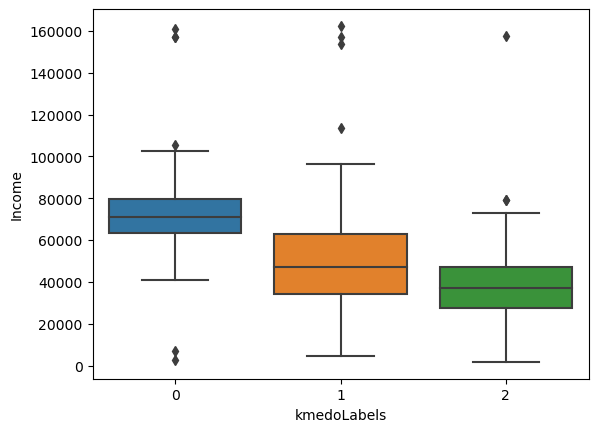

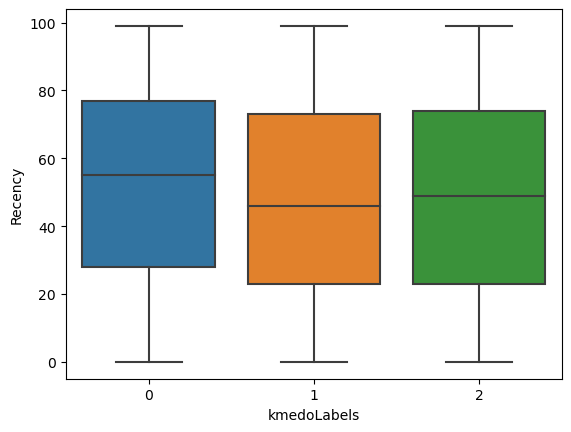

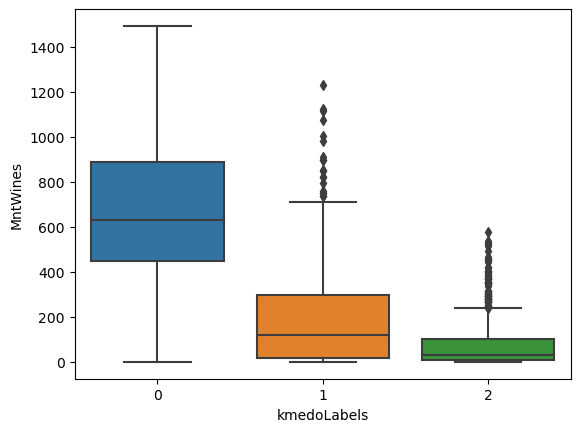

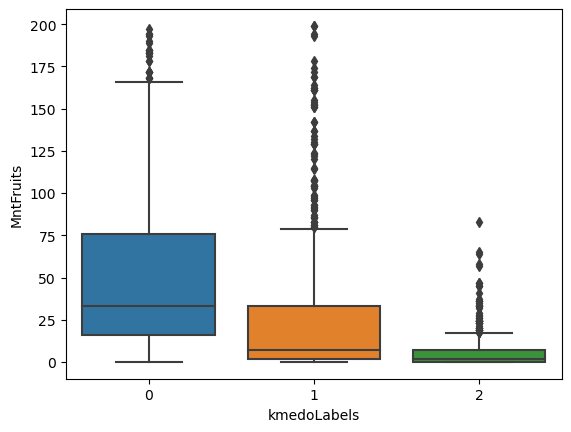

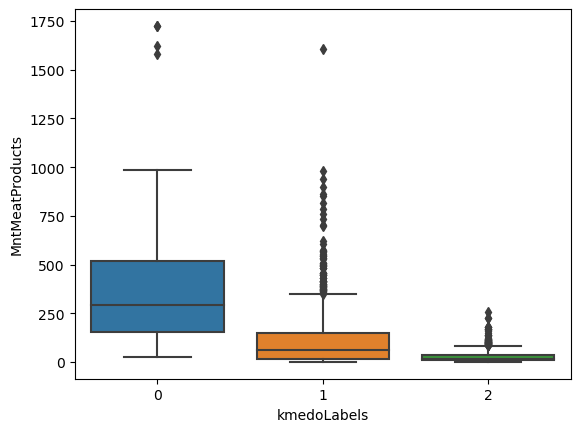

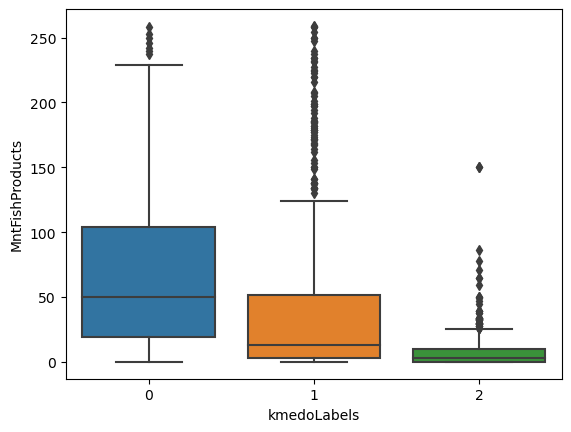

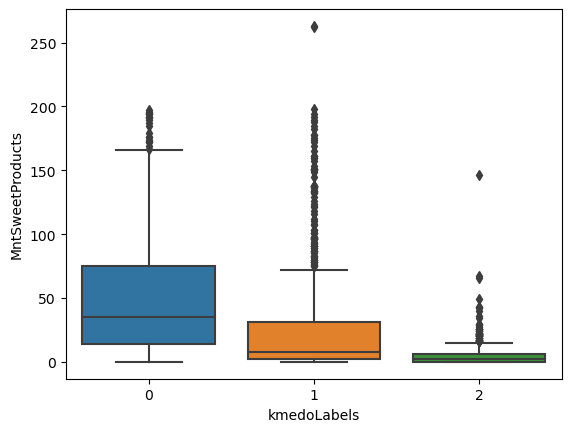

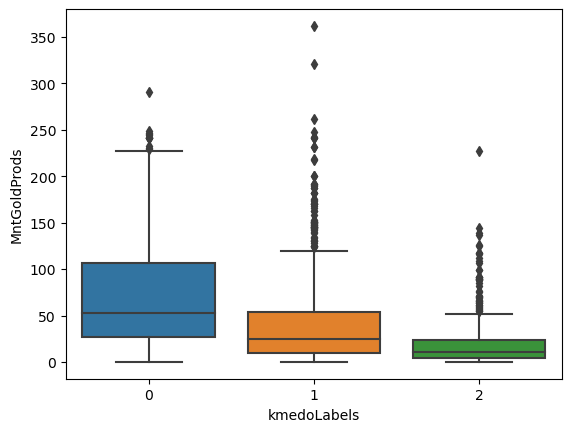

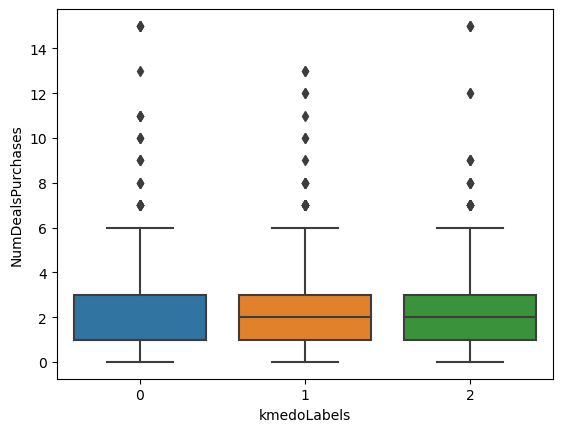

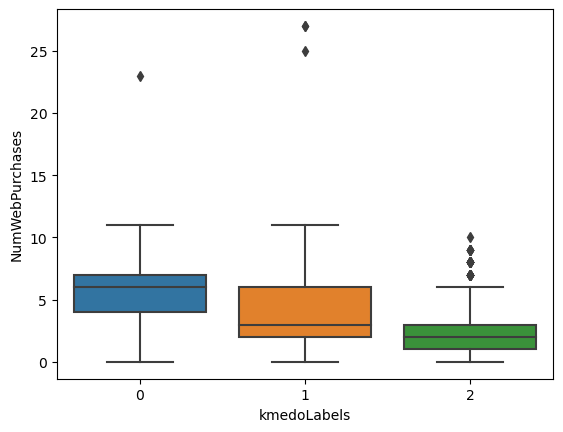

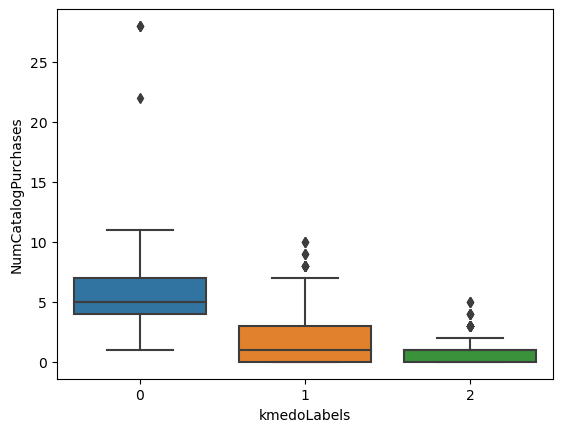

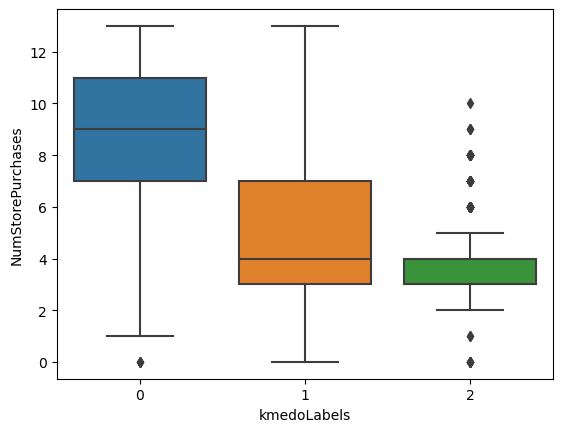

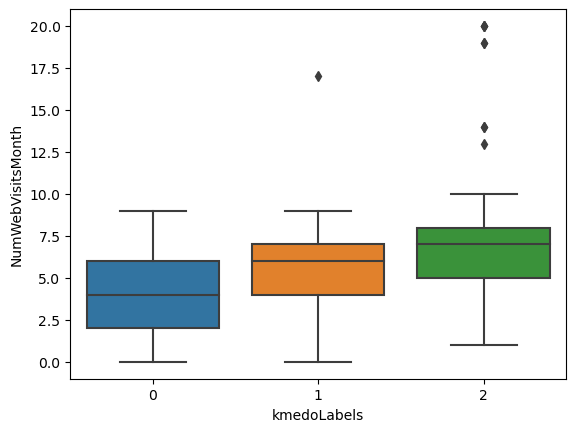

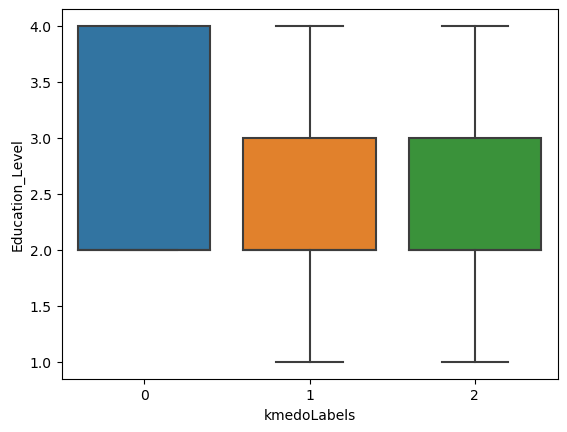

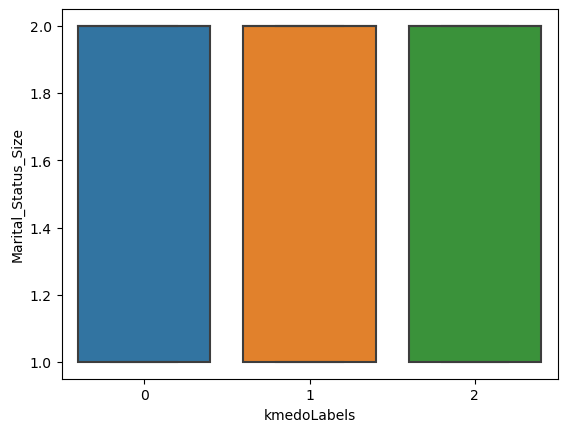

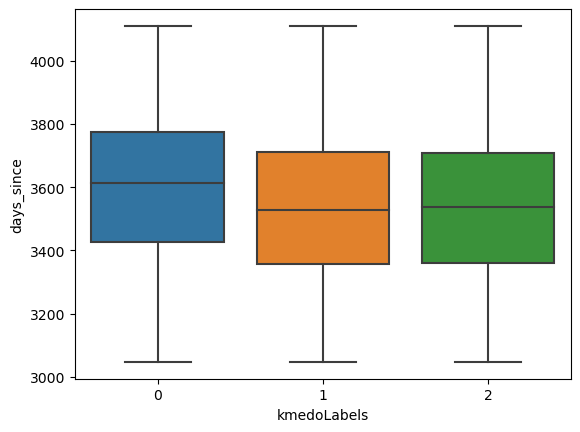

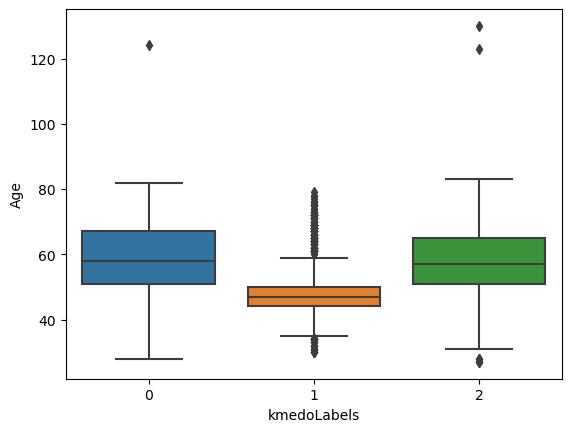

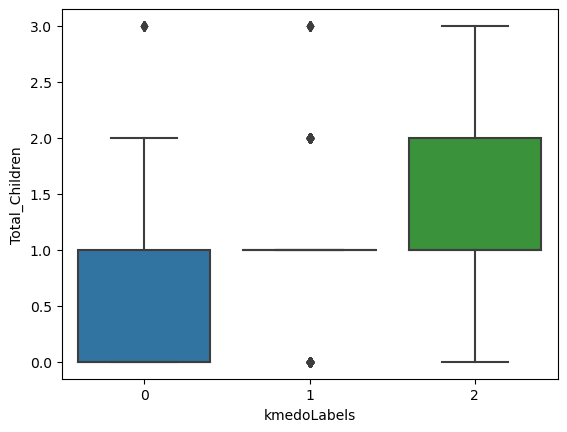

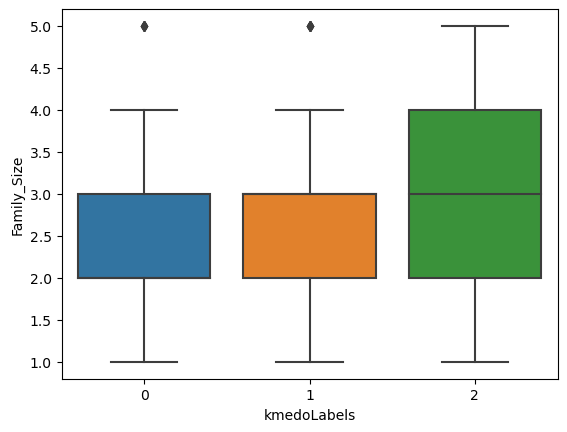

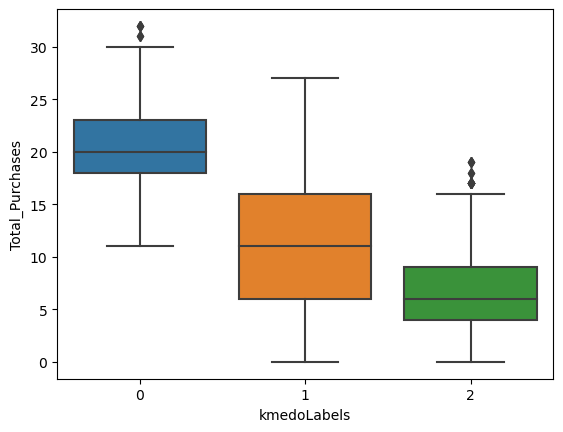

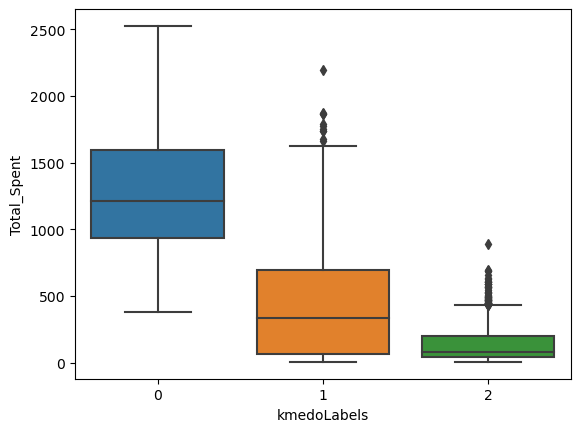

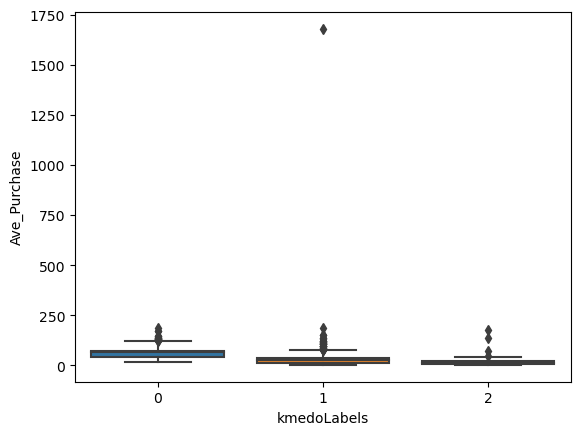

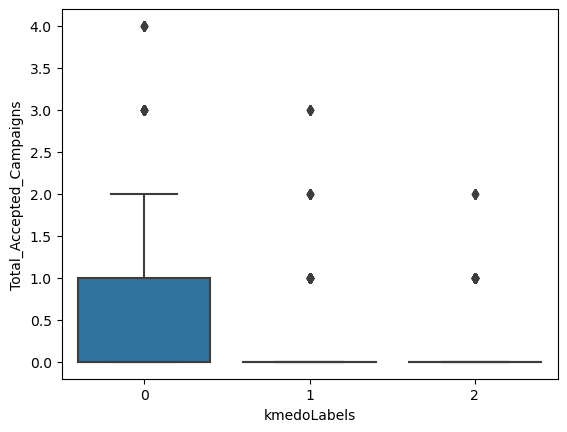

In [86]:
for col in cols_visualise:
    sns.boxplot(x = 'kmedoLabels', y = col, data = data)
    
    plt.show()

### **Cluster Profiling**

### **Characteristics of each cluster**

**Observations and Insights:**

Cluster 0- Income highest, 65-80k, age 55-70, and have 0-1 children with family sizes between 2-3. Spend more than others, fewer children, smaller family size, more disposable income. Spend the more wine(up to 900) and meat(up to 500), and most on all categories vs the other clusters.They make most purchases in stores, and make most catalog purchases.They also visit the web less than the other clusters. Suggesting in-store and catalog campaigns may be best for this audience.

Cluster 1- Medium income, 35k-65k, aged 45-50 with 0-1 children and family sizes between 2-3. Spending is between cluster 0 and 2. They spend an average less than 50 per purchase and make a few more store purchases than web, and a few catalog purchases. They visit the wesite between 4-7 times. 

Cluster 2- Least income, between 30-50k, ages 50-65, and have 1-2 children with famliy sizes between 2-4. Spend the least among the three clusters. Ave purchase is less than 40 and their total number of purchases is between 4-7. They visit the web between 5-7 times and make most of their purchases also in-store. This audience doesn't need catalogs; focus for them on website.

Recency is the same between all three clusters- between 25-75 days. This suggests campaigns can be sent out about once a month. All clusters use between 1-3 deals. All spend the most on wine and meat. They all use between 1-3 deals.

## **Hierarchical Clustering**

- Find the Cophenetic correlation for different distances with different linkage methods.
- Create the dendrograms for different linkages 
- Explore different linkages with each distance metric

**Think about it:**

- Can we clearly decide the number of clusters based on where to cut the dendrogram horizontally?
- What is the next step in obtaining number of clusters based on the dendrogram?
- Are there any distinct clusters in any of the dendrograms?

Because my dendrograms ended up too difficult to read, I haven't answered these questions.

In [87]:
from sklearn.cluster import AgglomerativeClustering                 # importing libraries for agglom clusters, dendrograms
from scipy.cluster.hierarchy import dendrogram, linkage

In [88]:
hcluster = data_scaled.copy()                                        # Making a copy and find/replacing max values
max_value = np.nanmax(hcluster[hcluster != np.inf])
hcluster.replace([np.inf, -np.inf], max_value, inplace=True)
hcluster.replace(['?', 0], inplace=True)
hcluster.replace(['null',0],inplace=True)

In [89]:
hcluster = pd.DataFrame(data)                                           # Checking for inf values (kept getting errors)
  
display(hcluster)
  
print()
print("checking for infinity")
ds = hcluster.isin([np.inf, -np.inf])
print(ds)

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     58138.0       58       635         88              546              172   
1     46344.0       38        11          1                6                2   
2     71613.0       26       426         49              127              111   
3     26646.0       26        11          4               20               10   
4     58293.0       94       173         43              118               46   
...       ...      ...       ...        ...              ...              ...   
2235  61223.0       46       709         43              182               42   
2236  64014.0       56       406          0               30                0   
2237  56981.0       91       908         48              217               32   
2238  69245.0        8       428         30              214               80   
2239  52869.0       40        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0                   88            88                  3                8  ...   
1                    1             6                  2                1  ...   
2                   21            42                  1                8  ...   
3                    3             5                  2                2  ...   
4                   27            15                  5                5  ...   
...                ...           ...                ...              ...  ...   
2235               118           247                  2                9  ...   
2236                 0             8                  7                8  ...   
2237                12            24                  1                2  ...   
2238                30            61                  2                6  ...   
2239                 1            21                  3                3  ...   

      Total_Spent  Ave_Purchase  Total_Accepted_Campaigns  Age_Group_40-49  \
0            1617     73.500000                         0                0   
1              27      6.750000                         0                0   
2             776     38.800000                         0                0   
3              53      8.833333                         0                1   
4             422     30.142857                         0                0   
...           ...           ...                       ...              ...   
2235         1341     83.812500                         0                0   
2236          444     29.600000                         1                0   
2237         1241     68.944444                         1                0   
2238          843     40.142857                         0                0   
2239          172     21.500000                         0                0   

      Age_Group_50-59  Age_Group_60-69  Age_Group_70+  Age_Group_nan  \
0                   0                0              1              0   
1                   0                0              1              0   
2                   0                1              0              0   
3                   0                0              0              0   
4                   1                0              0              0   
...               ...              ...            ...            ...   
2235                0                1              0              0   
2236                0                0              0              1   
2237                1                0              0              0   
2238                0                0              1              0   
2239                0                0              1              0   

      KMeans_Labels  kmedoLabels  
0                 0            0  
1                 1            2  
2                 0            0  
3                 1            2  
4                 1            1  
...             ...          ...  
2235          


checking for infinity
      Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0      False    False     False      False            False            False   
1      False    False     False      False            False            False   
2      False    False     False      False            False            False   
3      False    False     False      False            False            False   
4      False    False     False      False            False            False   
...      ...      ...       ...        ...              ...              ...   
2235   False    False     False      False            False            False   
2236   False    False     False      False            False            False   
2237   False    False     False      False            False            False   
2238   False    False     False      False            False            False   
2239   False    False     False      False            False            False   

      MntSweetPr

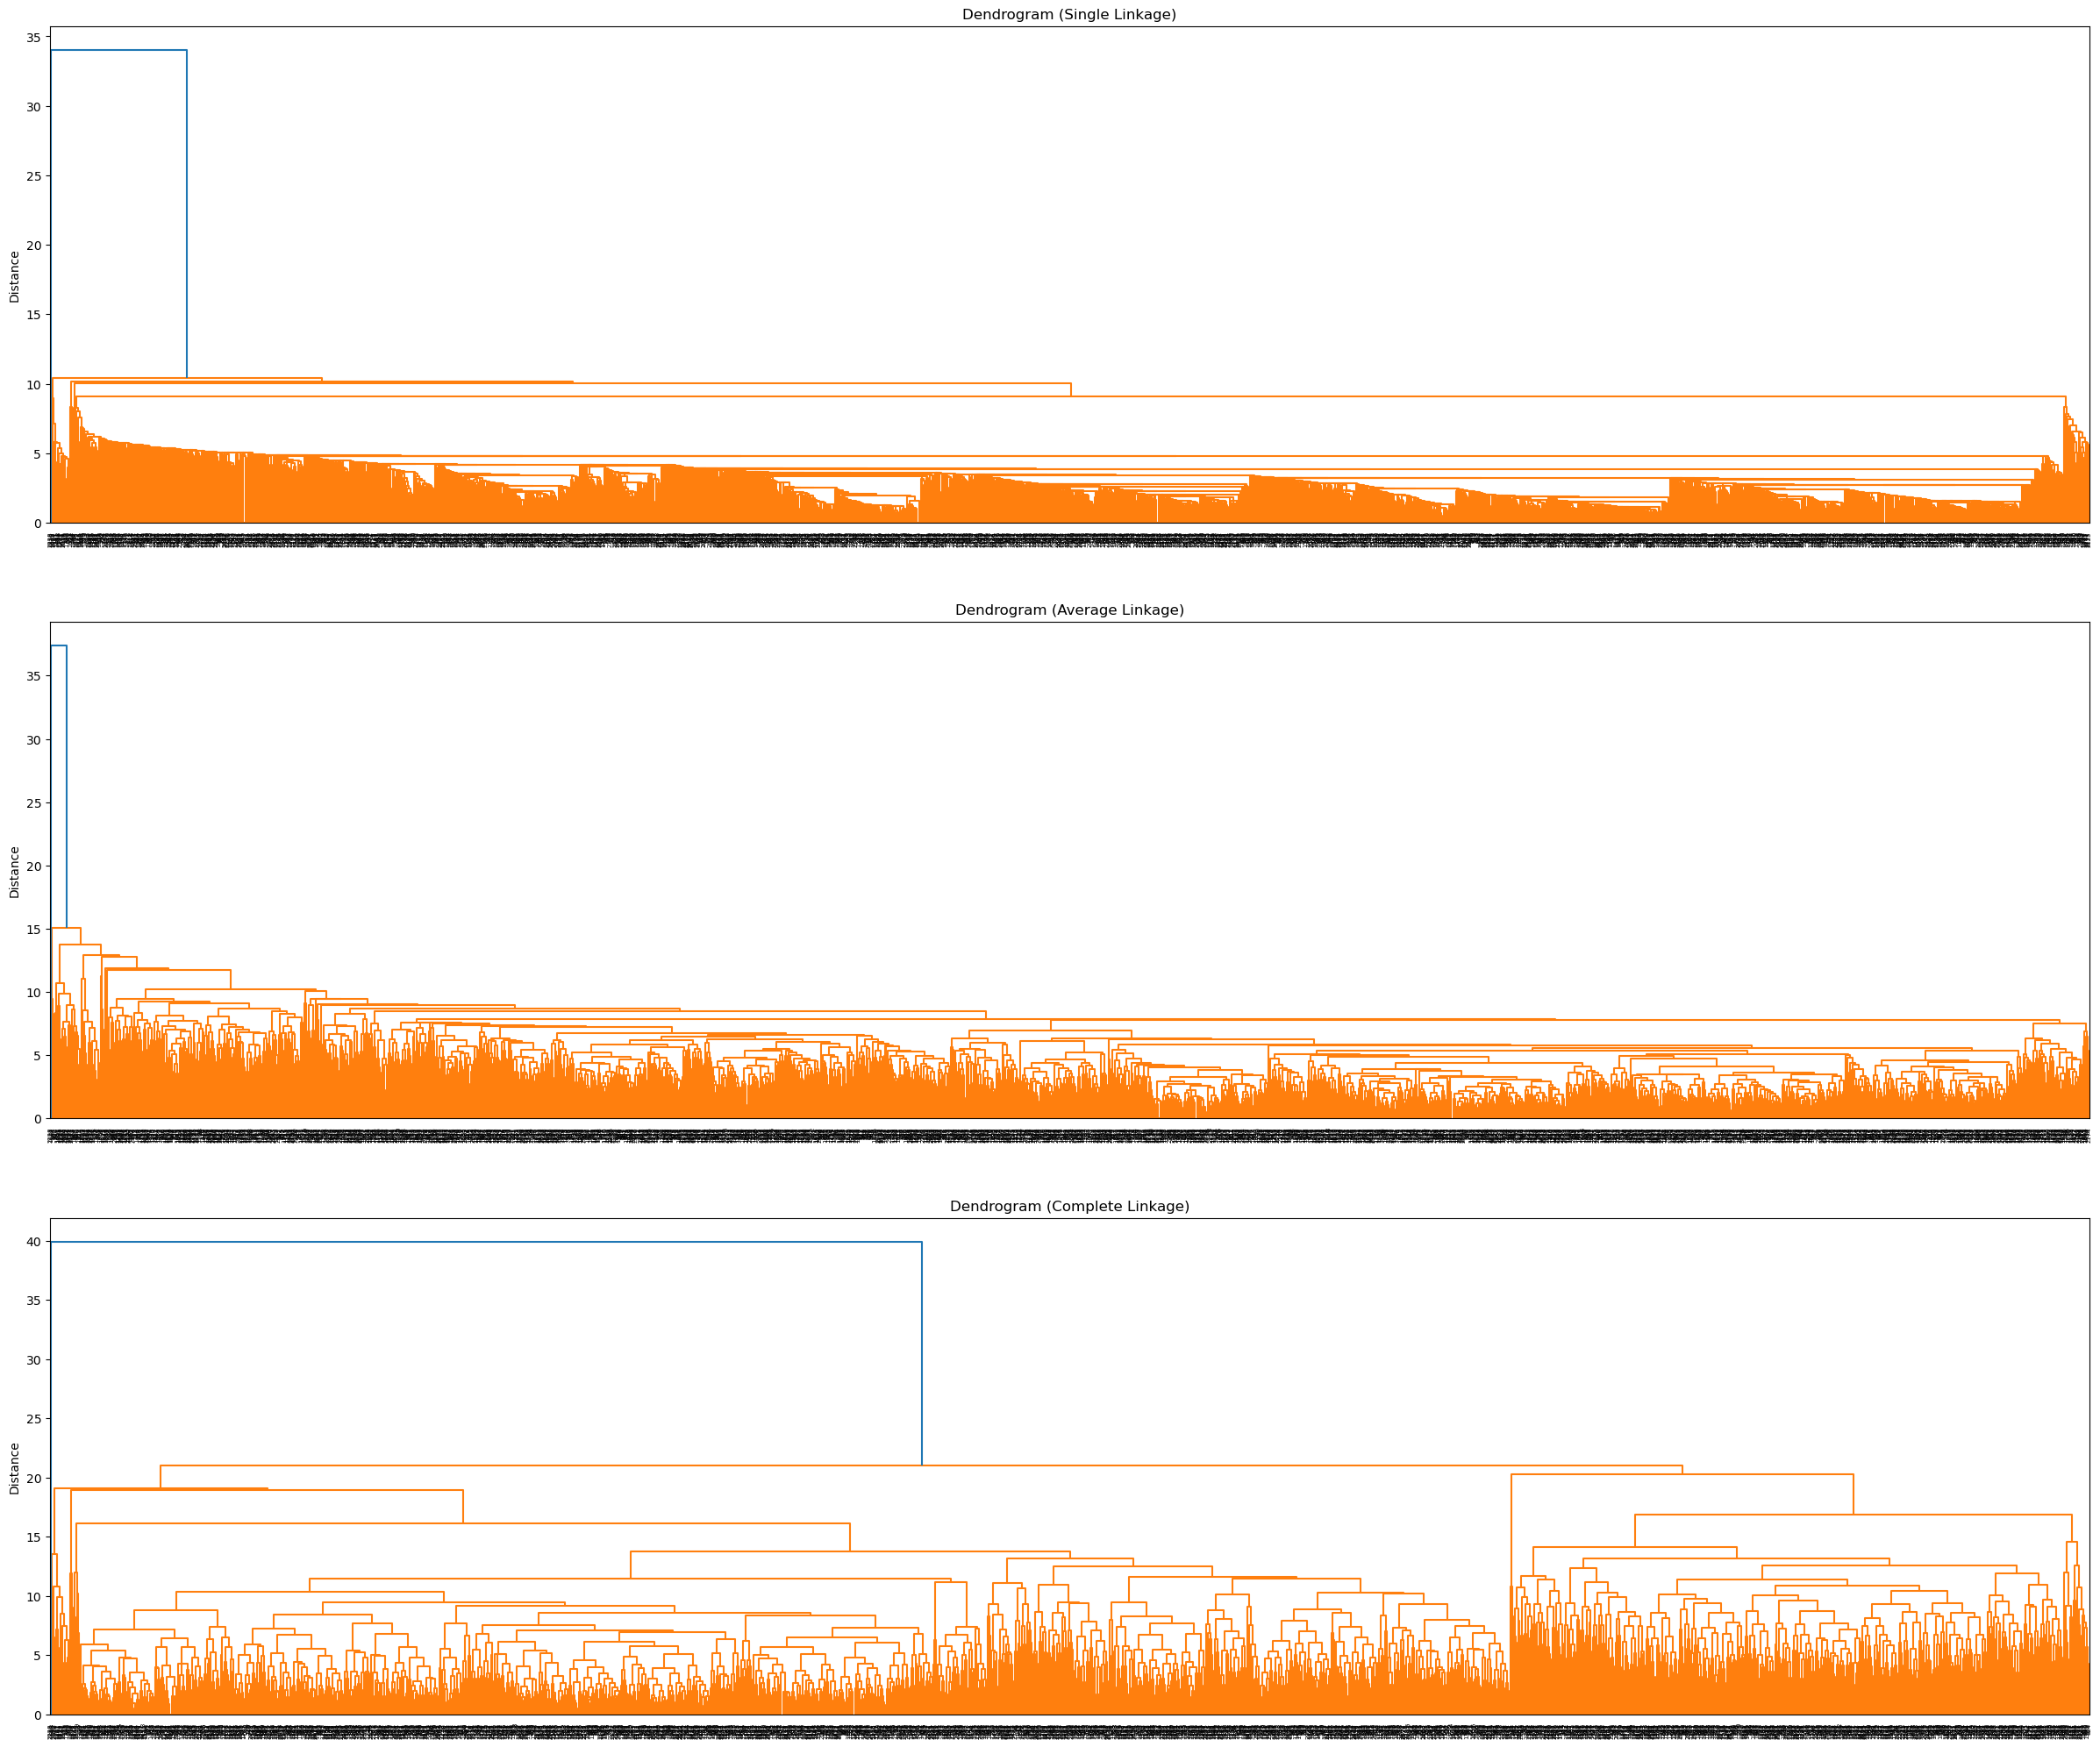

In [90]:
methods = ['single',                                      # Checking three types of linkages
           'average', 
           'complete']

fig, axs = plt.subplots(len(methods), 1, figsize = (30, 25))

for i, method in enumerate(methods):
    Z = linkage(data_scaled, metric = 'euclidean', method = method)
    
    dendrogram(Z, ax = axs[i]);
    
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    
    axs[i].set_ylabel('Distance')

In [91]:
hc_df = data_pca.copy()                                                        # Another copy

In [92]:
distance_metrics = ['euclidean', 'chebyshev', 'cityblock']                  # Calc cophenet correlation for distance/linkage types

# List of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric = dm, method = lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.8148481004726199.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6475938643862668.
Cophenetic correlation for Euclidean distance and average linkage is 0.8659212917077184.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.7933685335723901.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7306543345431267.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.6129653269835512.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8124193237005255.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.6205322028111367.
Cophenetic correlation for Cityblock distance and single linkage is 0.8519153103107717.
Cophenetic correlation for Cityblock distance and complete linkage is 0.7552815381543138.
Cophenetic correlation for Cityblock distance and average linkage is 0.8713734423429551.
Cophenetic correlat

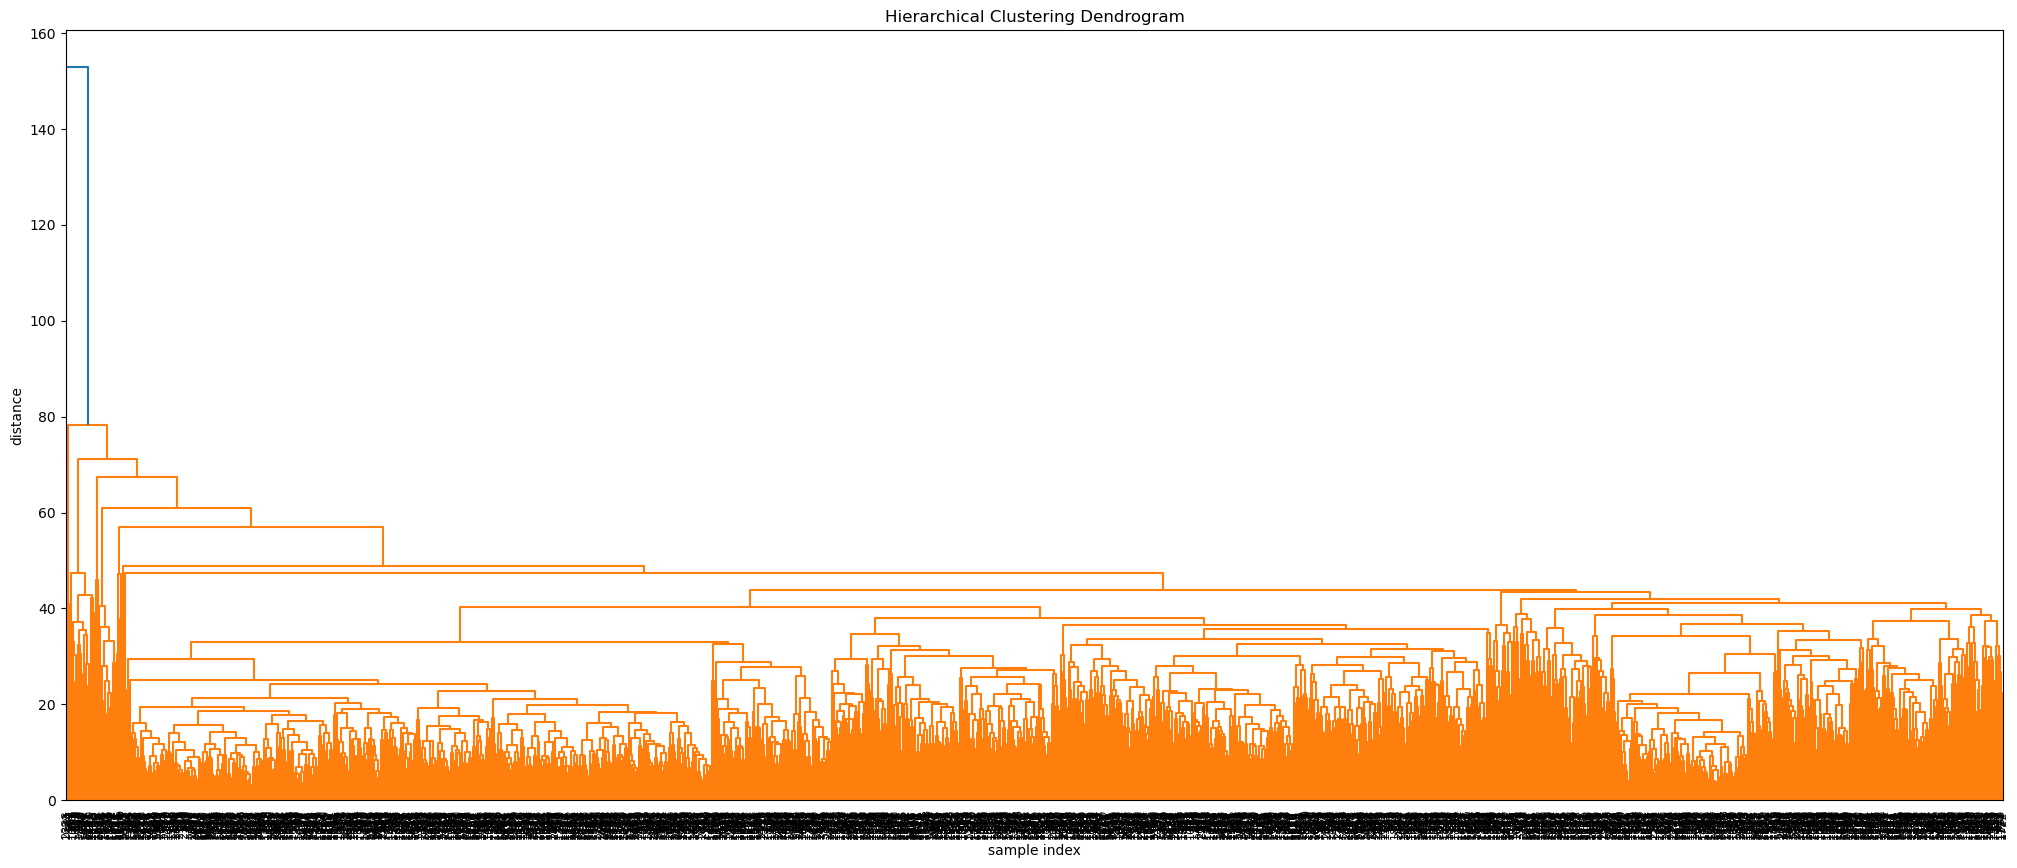

In [93]:
plt.figure(figsize=(25, 10))                                                       # Creating dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [94]:
hierarchical = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'complete')                       # Clustering attempt for 7 clusters

hierarchical.fit(data_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=7)

In [95]:
data_scaled_copy['HCLabels'] = hierarchical.labels_

data['HCLabels'] = hierarchical.labels_

In [96]:
data.HCLabels.value_counts()                                      # Counts for each cluster

0    1578
6     603
2      29
1      21
4       4
5       4
3       1
Name: HCLabels, dtype: int64

In [97]:
hierarchical = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')                     # Agglomerative clusters, trying 5 clusters

hierarchical.fit(data_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [98]:
data_scaled_copy['HCLabels'] = hierarchical.labels_

data['HCLabels'] = hierarchical.labels_

In [99]:
data.HCLabels.value_counts()                                                     # Counts for each cluster

0    1582
2     632
1      21
4       4
3       1
Name: HCLabels, dtype: int64

In [100]:
hierarchical = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')                    # Agglomerative clusters, trying 3 clusters

hierarchical.fit(data_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [101]:
data_scaled_copy['HCLabels'] = hierarchical.labels_

data['HCLabels'] = hierarchical.labels_

In [102]:
data.HCLabels.value_counts()                                                    # Counts for each cluster

2    1603
0     636
1       1
Name: HCLabels, dtype: int64

In [103]:
hierarchical = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')                   # Agglomerative clusters, trying 2 clusters

hierarchical.fit(data_scaled)

AgglomerativeClustering(linkage='complete')

In [104]:
data_scaled_copy['HCLabels'] = hierarchical.labels_

data['HCLabels'] = hierarchical.labels_

In [105]:
data.HCLabels.value_counts()                                                   # Counts for each cluster

0    2239
1       1
Name: HCLabels, dtype: int64

In [106]:
data_scaled_copy['HCLabels4'] = hierarchical.labels_

data['HCLabels4'] = hierarchical.labels_

In [107]:
hierarchical = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')                 # Agglomerative clusters, trying 4 clusters

hierarchical.fit(data_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [108]:
data.HCLabels4.value_counts()                                                    # Counts for each cluster

0    2239
1       1
Name: HCLabels4, dtype: int64

### **Visualize the clusters using PCA**

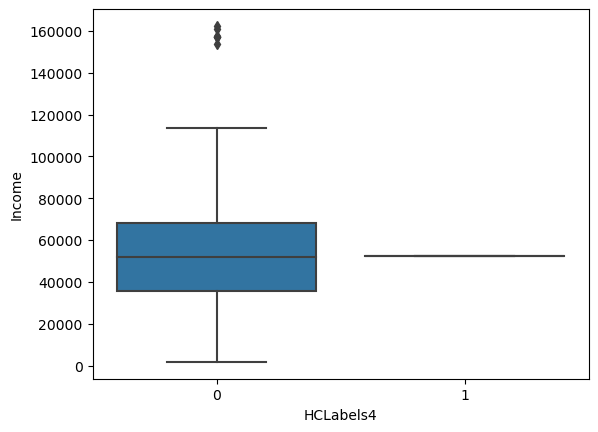

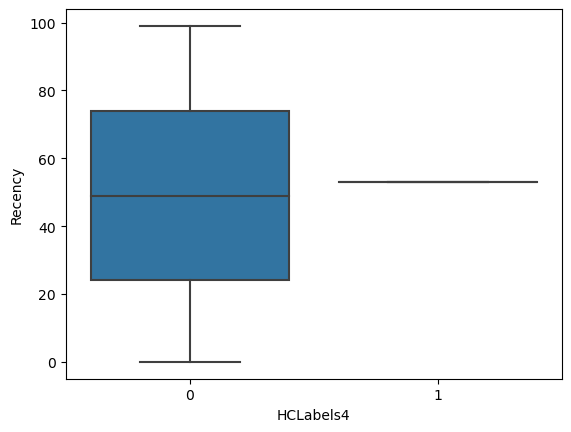

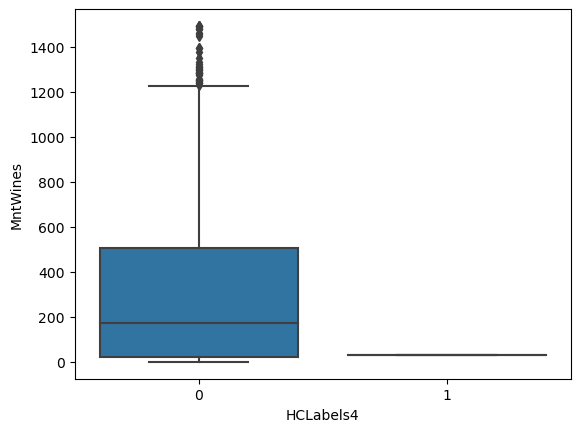

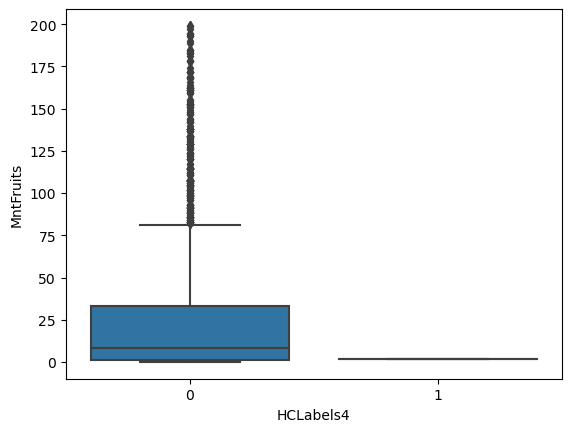

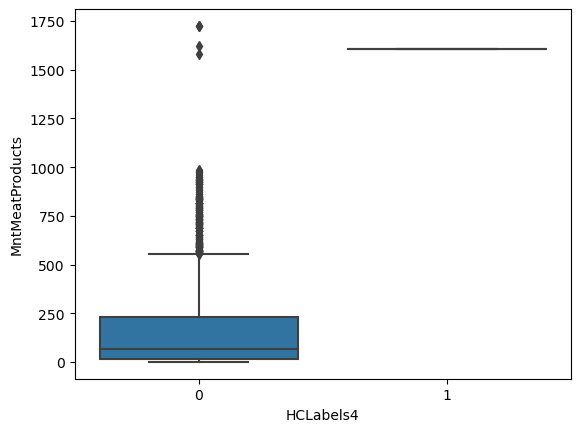

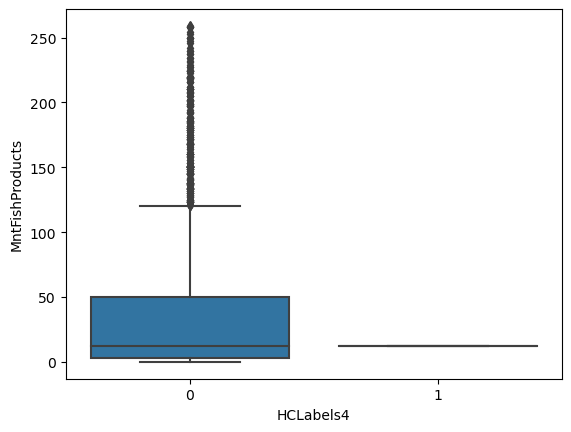

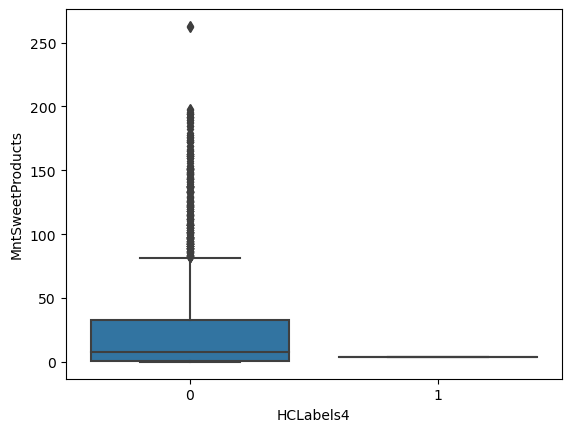

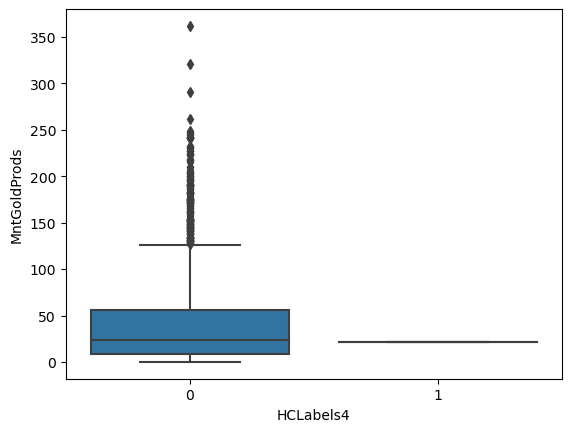

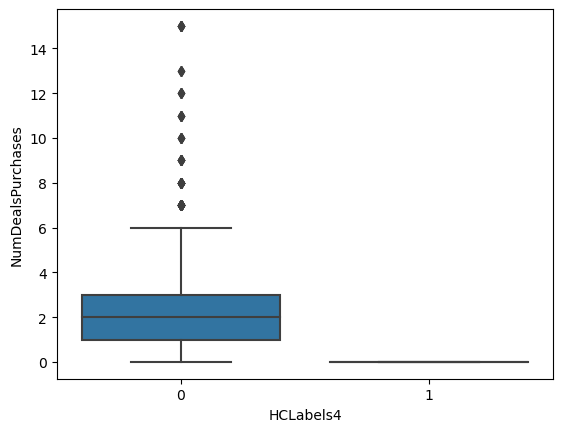

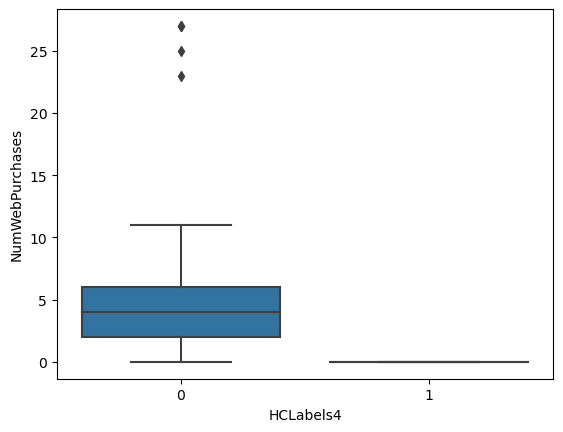

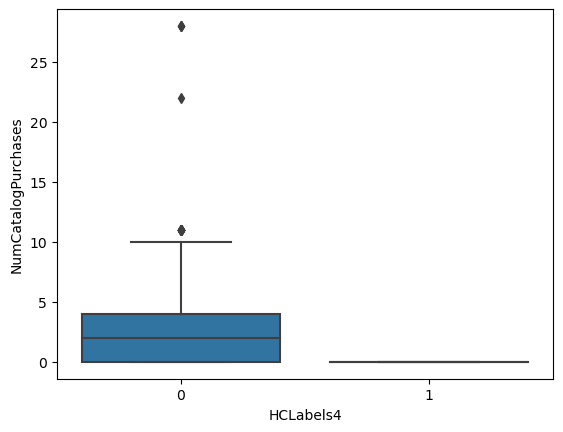

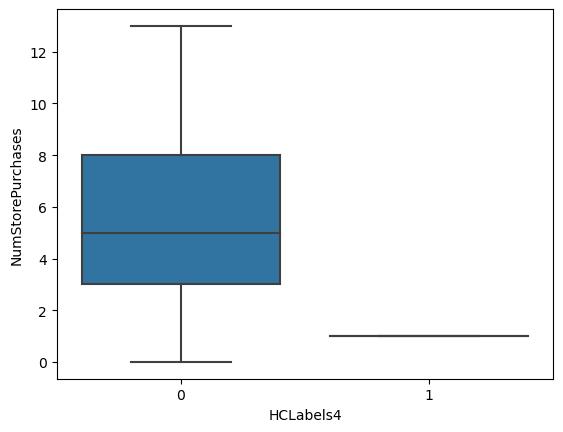

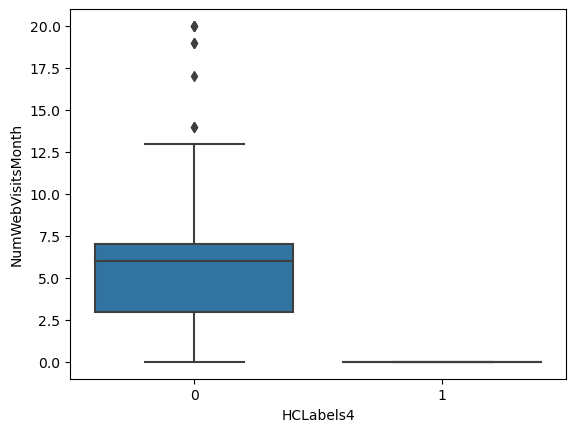

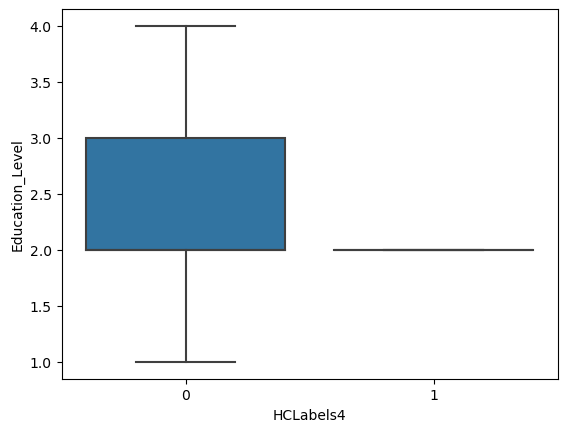

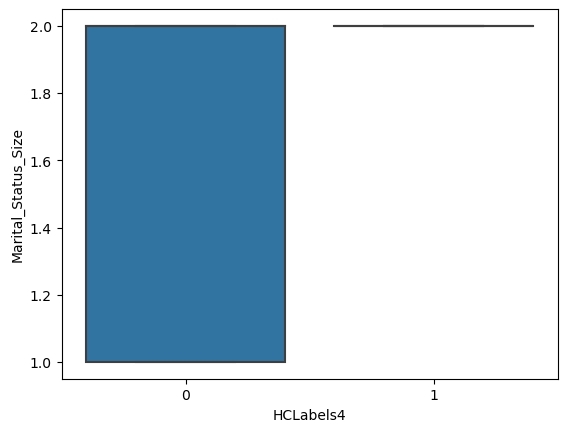

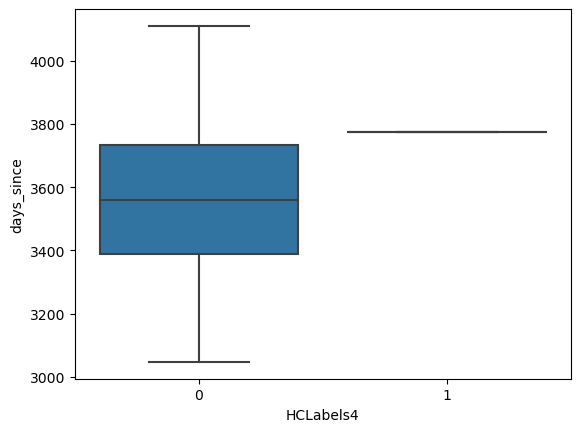

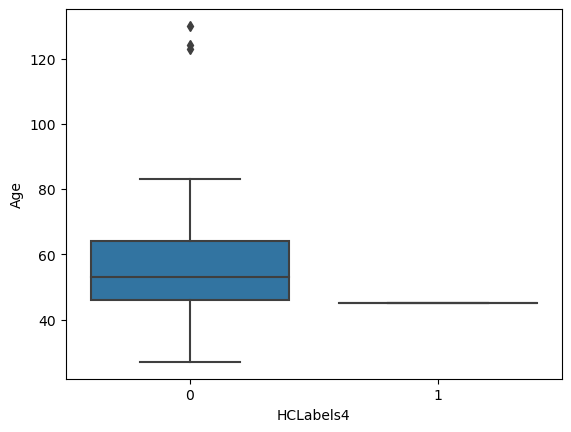

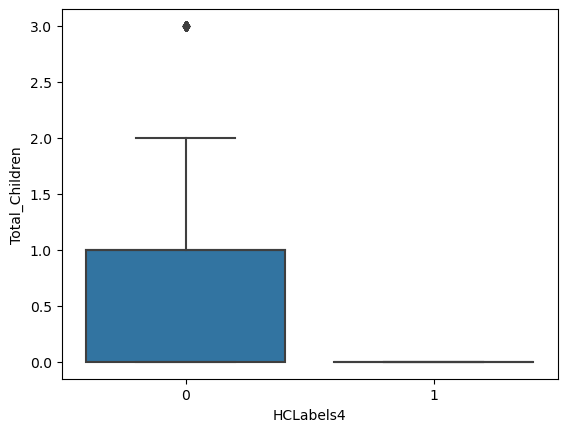

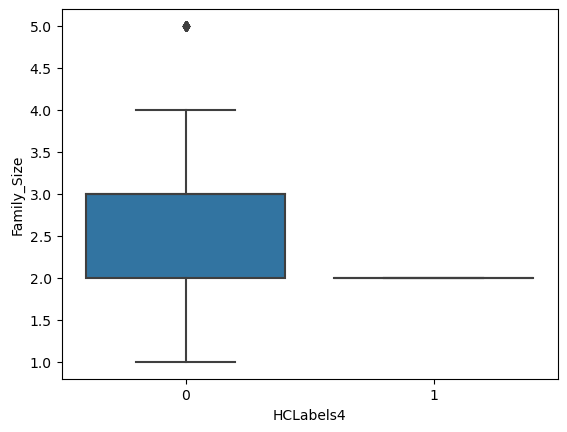

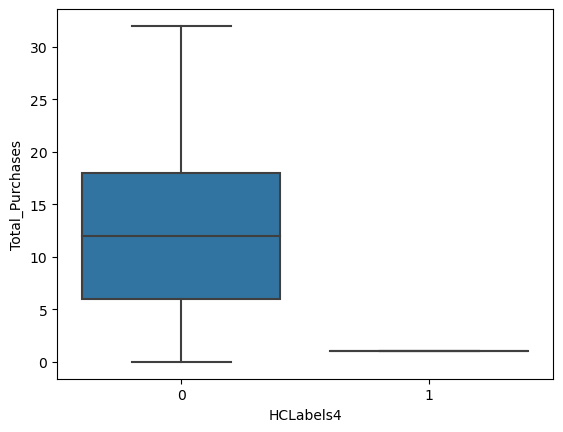

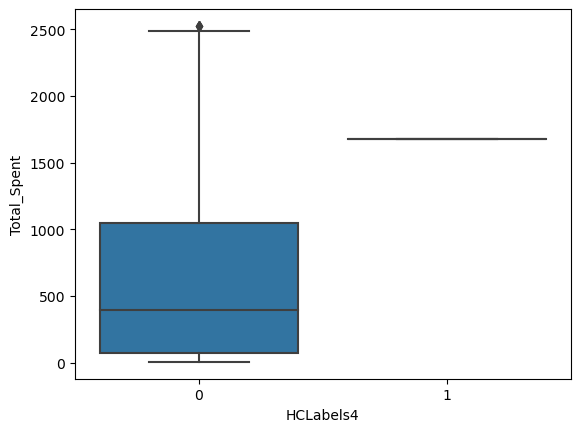

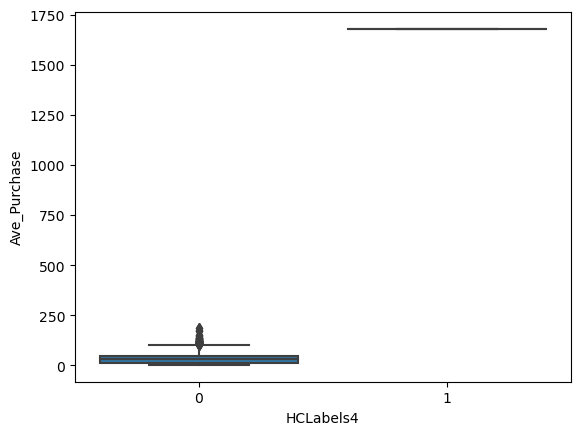

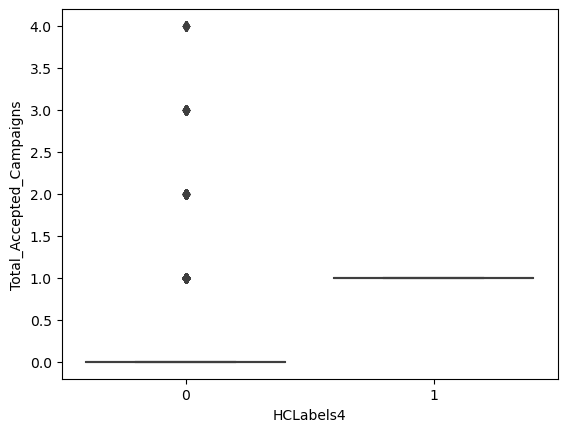

In [109]:
for col in cols_visualise:
    sns.boxplot(x = 'HCLabels4', y = col, data = data)
    plt.show()

### **Cluster Profiling**

**Observations and Insights:**
Hierarchical clusters did not work well. A challenge is the number of variables and how many clusters to fit to. The visualizations to PCA are based on 4 clusters, but they are not well distributed. Several number of clusters were attempted. This section needs some guidance. I believe the clusters outlined below are overfit (or just not right).

### **Characteristics of each cluster**

**Summary of each cluster:**

Based on 4 cluster profiles:<br>

Cluster 0- least income, spent up to 250 on wine, and up to 50 on meat; also spent up to 40 on gold. Most purchases were made in-store (up to 6) and online (2-5). This cluster had the most web visits with an average purchase of up to 50. They have family sizes between 2-3, are ages 45-65 and they didn't use the campaigns.<br>
Cluster 1- most income, spent up to 50 on wine and the most on meat- from 1500-1700. They didn't purchase gold. They made their purchases from the catalog with almost no store or web visits/zero web purchases. However, they utilized 12-15 web deals. They are ages 45-50 with family sizes between 2-3. <br>
Cluster 2- has mid income from 70-80k, spends the most of any cluster on wine (400-900). This group also purchases gold. They purchase through web,store and catalog. They are ages 50-70 with 0-1 children. They spend the second most amount in total (second to Cluster 0). <br>
Cluster 3- This is only 1 (or a few) in this group. The income for this group is 55k, and there is a family size of 2 with zero children. They spent upwards of 1600 on meat and almost nothing else. They puchased in store


## **DBSCAN**

### **Apply DBSCAN for the best hyperparameter and visualize the clusters from PCA**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

In [110]:
dbscan_1 = data_pca.copy()

In [111]:
eps_value = [2,3]                       # Using random eps
min_sample_values = [5,15]              # Using random min_sample value
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}  # Setting up dictionary

In [112]:
high_silhouette_avg = 0                                               # Finding eps and silhouette scores and calc DBScan
high_i_j = [0, 0]                                                     
key = res.keys()                                                      
for i in key:
    z = res[i]                                                       
    for j in z:
        db = DBSCAN(eps = i, min_samples = j).fit(dbscan_1)          
        core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(dbscan_1, labels)            
        print( 
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                            
        )
        if high_silhouette_avg < silhouette_avg:                                
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =5 The average silhoutte_score is : -0.09427309348810341
For eps value =2 For min sample =15 The average silhoutte_score is : -0.11934381216417995
For eps value =3 For min sample =5 The average silhoutte_score is : 0.005479145722621274
For eps value =3 For min sample =15 The average silhoutte_score is : 0.04153674704048747


In [113]:
print(                                                                               # Getting highest sil score
    "Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(
        high_silhouette_avg, high_i_j[0], high_i_j[1]
    )
)

Highest_silhoutte_avg is 0 for eps = 3 and min sample = 15


In [114]:
dbscan_2 = DBSCAN(eps = 3, min_samples = 15)                                        # Defining what eps and min samples are based on highest sil ave

In [119]:
dbscan_2 = DBSCAN(eps = 3, min_samples=15)

data_scaled_copy['dbscan_1'] = dbscan_2.fit_predict(data_scaled)

data['dbscan_1'] = dbscan_2.fit_predict(data_scaled)

In [139]:
# Calculating the mean and the median of the original data for each label
original_features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Education_Level', 'Marital_Status_Size', 'days_since', 'Age', 'Total_Children', 'Family_Size', 'Total_Purchases', 'Total_Spent', 'Ave_Purchase', 'Total_Accepted_Campaigns']

mean = data.groupby('dbscan_1').mean()

median = data.groupby('dbscan_1').median()

df_hierachical = pd.concat([mean, median], axis = 0)

df_hierachical.index = ['group_-1 Mean', 'group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean', 'group_4 Mean', 'group_-1 Median', 'group_0 Median', 'group_1 Median', 'group_2 Median', 'group_3 Median', 'group_4 Median']

df_hierachical[original_features].T

group_-1 Mean  group_0 Mean  group_1 Mean  \
Income                     63949.141391  44797.491176  28571.690260   
Recency                       47.846957     50.529412     48.707792   
MntWines                     501.783478    145.921569     28.051948   
MntFruits                     44.151304      9.348039      6.694805   
MntMeatProducts              288.411304     55.441176     25.292208   
MntFishProducts               63.351304     12.524510      9.902597   
MntSweetProducts              45.472174     10.500000      7.142857   
MntGoldProds                  66.433913     27.813725     15.837662   
NumDealsPurchases              2.365217      2.397059      1.753247   
NumWebPurchases                5.333043      3.230392      2.025974   
NumCatalogPurchases            4.366087      1.245098      0.422078   
NumStorePurchases              7.393913      4.882353      3.305195   
NumWebVisitsMonth              4.612174      5.509804      6.694805   
Education_Level                2.630435      2.568627      2.207792   
Marital_Status_Size            1.633913      1.789216      1.662338   
days_since                  3591.642609   3519.897059   3537.233766   
Age                           55.592174     65.450980     36.551948   
Total_Children                 0.680870      1.318627      0.792208   
Family_Size                    2.329565      3.093137      2.454545   
Total_Purchases               17.093043      9.357843      5.753247   
Total_Spent                 1009.603478    261.549020     92.922078   
Ave_Purchase                  57.628072     21.222252     13.545674   
Total_Accepted_Campaigns       0.579130      0.000000      0.000000   

                          group_2 Mean  group_3 Mean  group_4 Mean  \
Income                    37814.650000  41520.230671  44843.014085   
Recency                      51.143678     50.303514     51.112676   
MntWines                     78.060345    109.654952    115.352113   
MntFruits                     7.577586      6.316294      8.323944   
MntMeatProducts              37.525862     36.412141     37.098592   
MntFishProducts              11.060345      8.249201      9.746479   
MntSweetProducts              7.606322      6.150160      7.239437   
MntGoldProds                 19.959770     18.610224     18.676056   
NumDealsPurchases             2.373563      2.424920      2.028169   
NumWebPurchases               2.712644      2.865815      2.887324   
NumCatalogPurchases           0.741379      0.913738      1.112676   
NumStorePurchases             3.925287      4.111821      4.352113   
NumWebVisitsMonth             6.250000      6.070288      5.281690   
Education_Level               2.408046      2.667732      2.901408   
Marital_Status_Size           1.729885      1.690096      1.887324   
days_since                 3537.882184   3507.332268   3522.492958   
Age                          46.293103     54.907348     73.056338   
Total_Children                1.198276      1.434505      1.253521   
Family_Size                   2.925287      3.115016      3.140845   
Total_Purchases               7.379310      7.891374      8.352113   
Total_Spent                 161.790230    185.392971    196.436620   
Ave_Purchase                 16.933267     17.983348     19.321440   
Total_Accepted_Campaigns      0.000000      0.000000      0.000000   

                          group_-1 Median  group_0 Median  group_1 Median  \
Income                       66835.000000       46651.000    28215.500000   
Recency                         48.000000          50.000       48.000000   
MntWines                       462.500000          69.000       11.000000   
MntFruits                       26.000000           3.000        4.000000   
MntMeatProducts                217.000000          24.500       14.500000   
MntFishProducts                 41.500000           4.000        6.000000   
MntSweetProducts                28.000000           3.000        4.000000   
MntGoldProds            

## Observations
Four clusters were determined.<br>
Cluster -1 has highest income, makes most purchases, spends most, smaller family size. Ave age around 53.Spends most on wine and meat.Ave purchase is near $40 and they are the only cluster that used the campaigns.They also have highest education.<br>
The rest of the clusters follow a similar path having less income, more famliy, less purchases- in the order of cluster 4, then 0, then 2, then 1. Cluster 0 has ave age of 46, Cluster 1 has ave age of 45, Cluster 2 has ave age of 36, Cluster 3 has an ave age of 55, and Cluster 4 has an ave age of 73.<br>

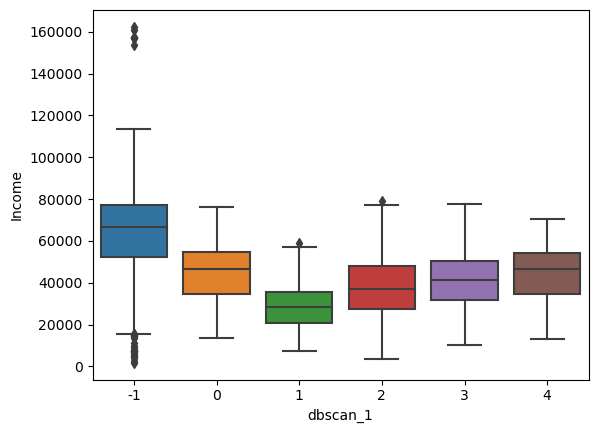

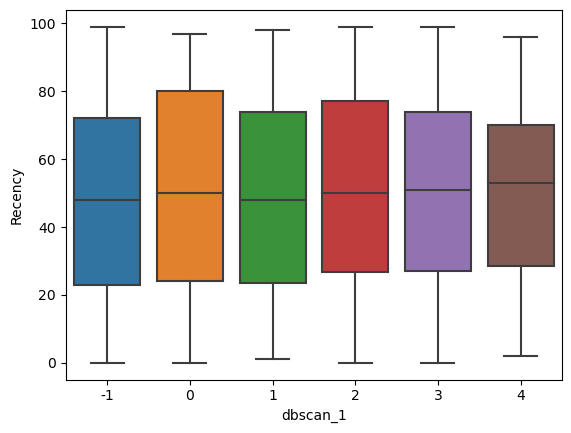

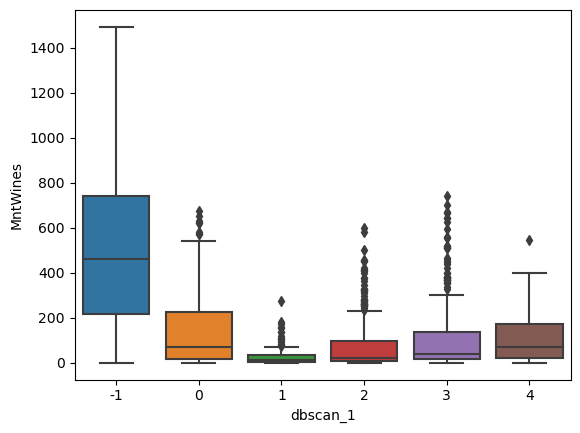

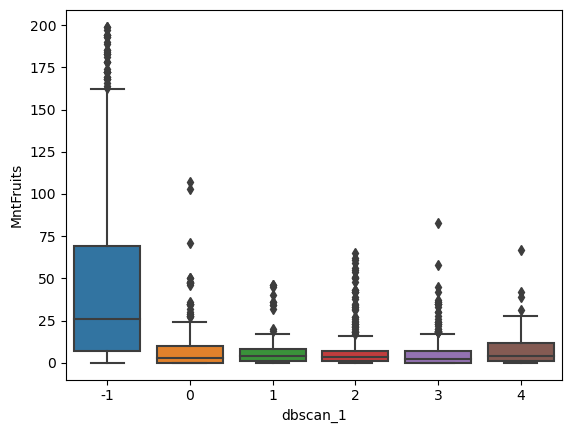

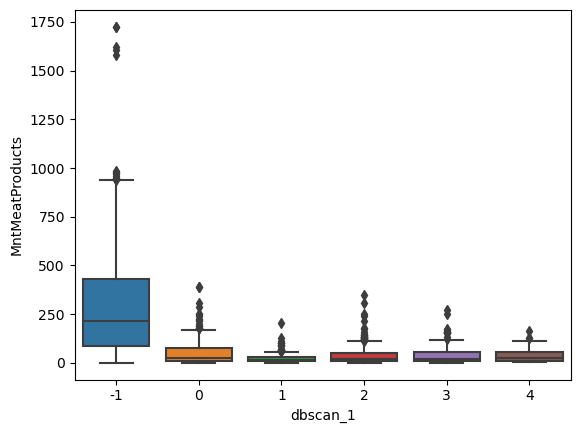

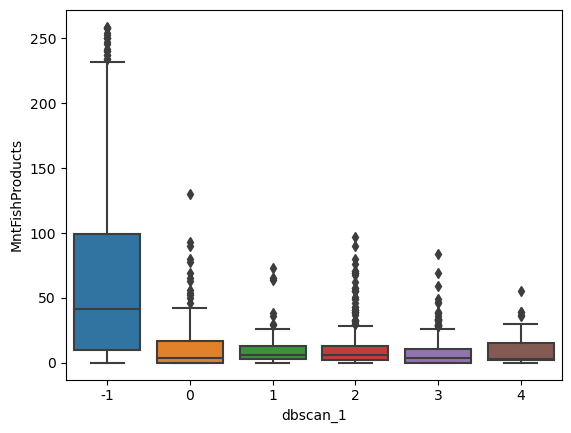

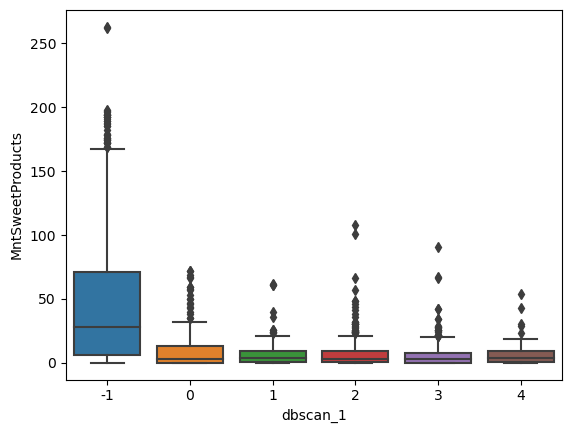

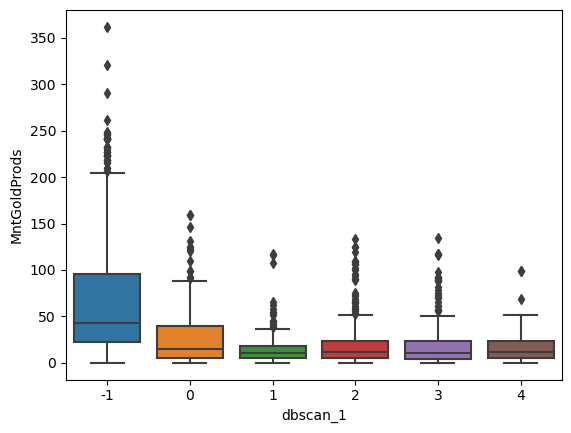

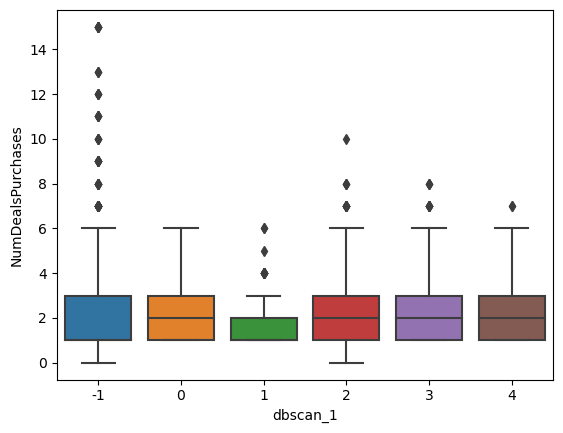

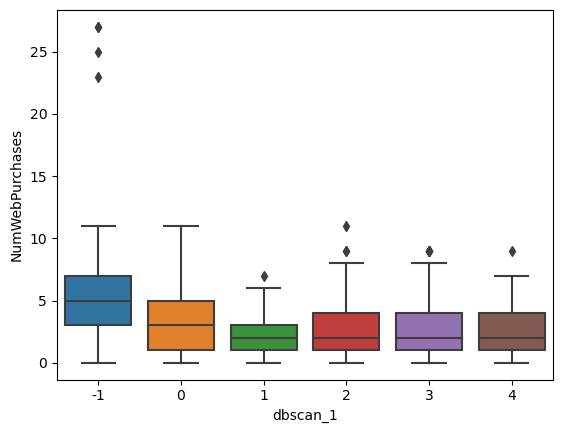

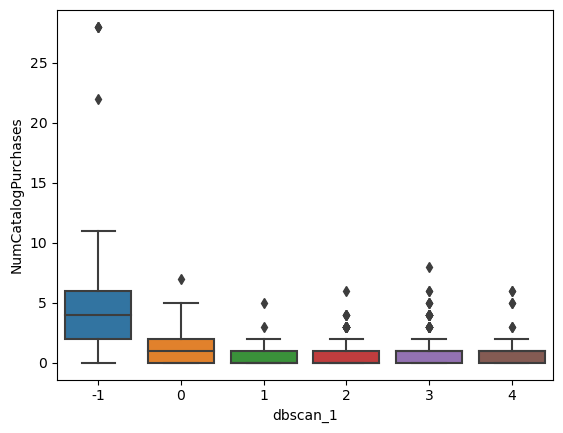

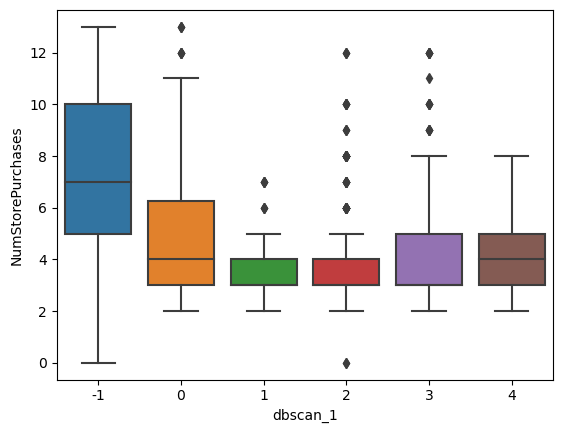

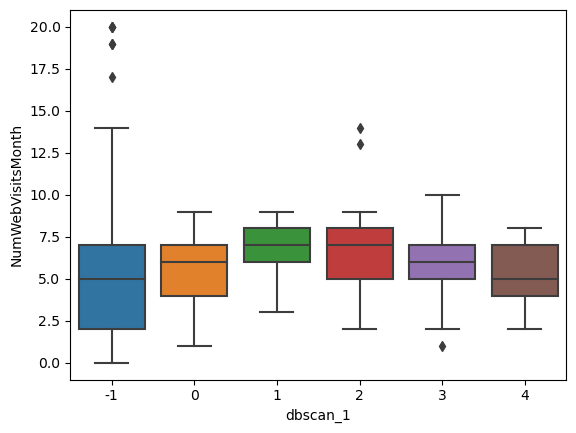

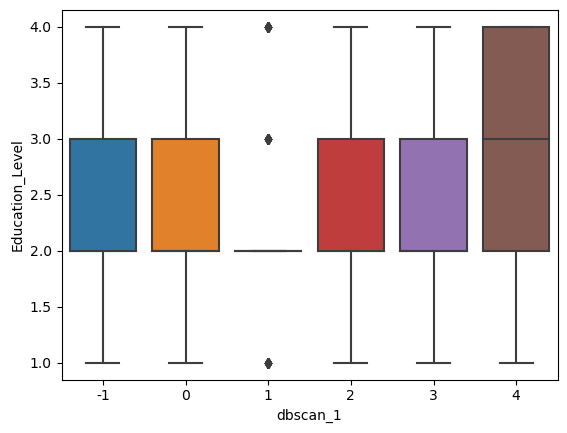

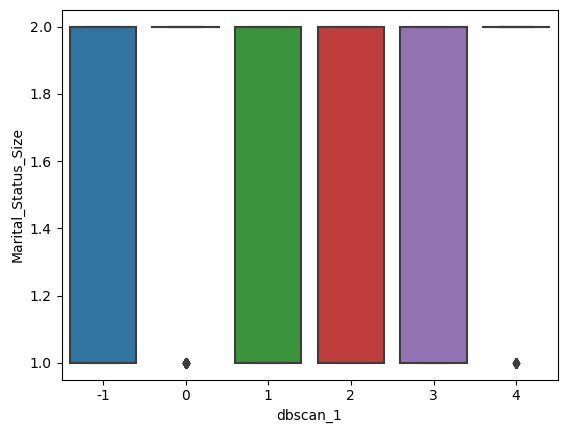

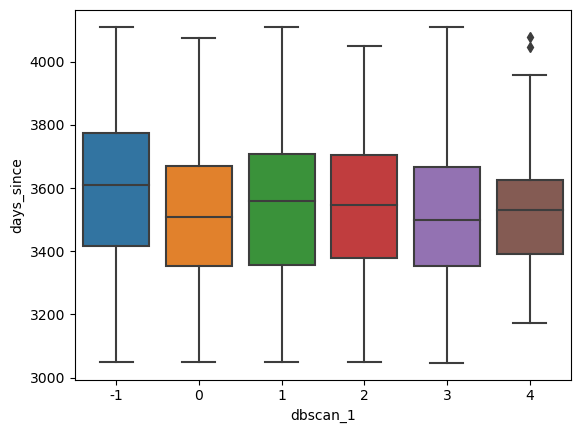

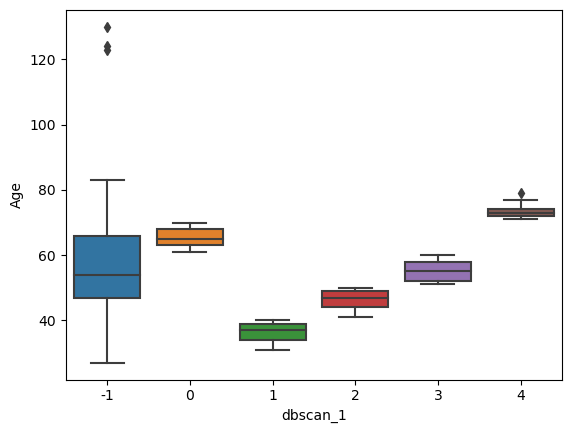

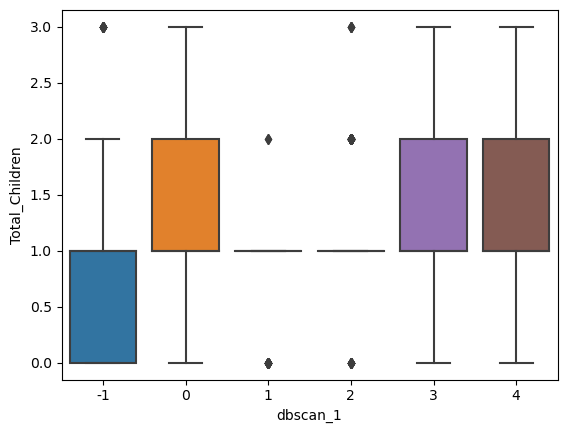

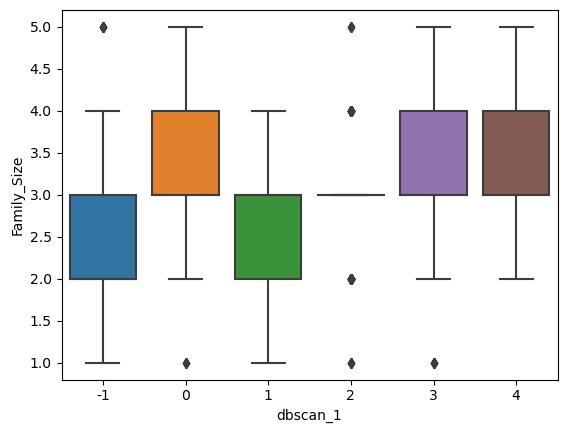

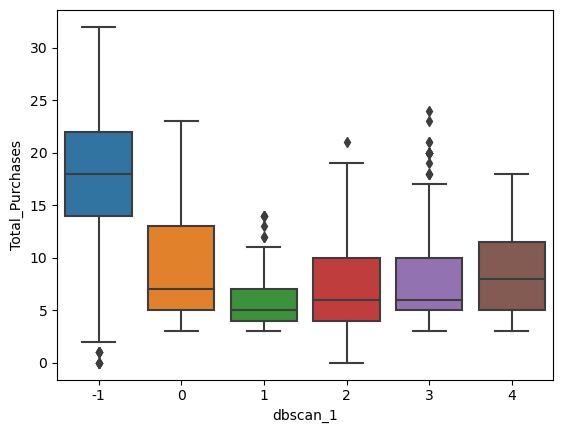

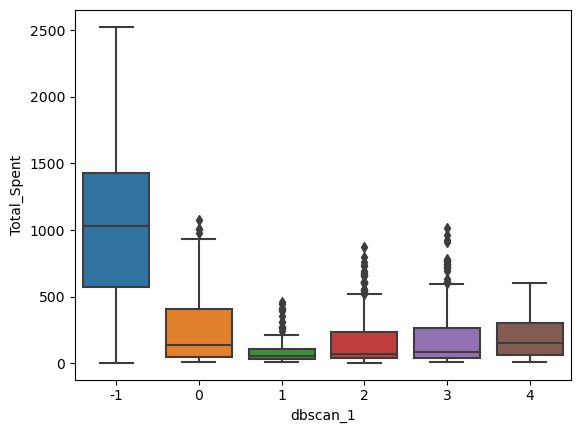

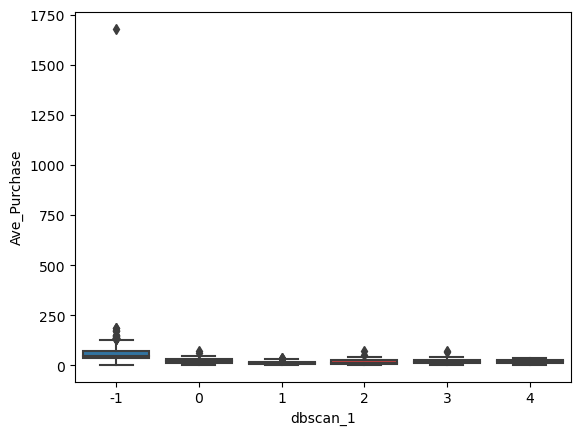

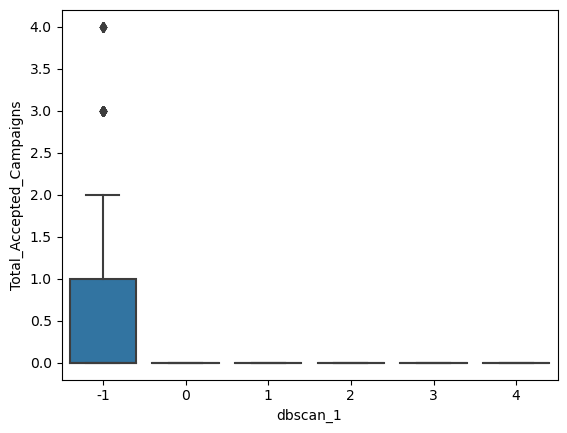

In [140]:
for col in cols_visualise:
    sns.boxplot(x = 'dbscan_1', y = col, data = data)
    
    plt.show()

**Observations and Insights:**<br>
Cluster -1 holds most of the income and purchases. Clusters 0, 1, 2, 3, and 4 are similar to each other. Cluster -1 has the most outliers.

**Think about it:**

<u>- Changing the eps and min sample values will result in different DBSCAN results? Can we try more value for eps and min_sample?</u><br>
Yes, changing the values for eps and min samples will alter the results. Another version is below. Only slight variations appear.

In [141]:
# Creating another series with different eps/min sample values

eps_value = [4,5]                       # Using random eps
min_sample_values = [20,45]              # Using random min_sample value
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}  # Setting up dictionary

In [142]:
high_silhouette_avg = 0                                               # Finding eps and silhouette scores and calc DBScan
high_i_j = [0, 0]                                                     
key = res.keys()                                                      
for i in key:
    z = res[i]                                                       
    for j in z:
        db = DBSCAN(eps = i, min_samples = j).fit(dbscan_1)          
        core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(dbscan_1, labels)            
        print( 
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                            
        )
        if high_silhouette_avg < silhouette_avg:                                
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =4 For min sample =20 The average silhoutte_score is : 0.04371517262112027
For eps value =4 For min sample =45 The average silhoutte_score is : 0.050254044152428824
For eps value =5 For min sample =20 The average silhoutte_score is : 0.298860222286131
For eps value =5 For min sample =45 The average silhoutte_score is : 0.2836814964787206


In [143]:
print(                                                                               # Getting highest sil score
    "Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(
        high_silhouette_avg, high_i_j[0], high_i_j[1]
    )
)

Highest_silhoutte_avg is 0 for eps = 5 and min sample = 45


In [144]:
dbs = DBSCAN(eps = 5, min_samples = 45)                                        # Defining what eps and min samples are based on highest sil ave

In [145]:
data['dbscan_1'].value_counts()

-1    1150
 2     348
 3     313
 0     204
 1     154
 4      71
Name: dbscan_1, dtype: int64

In [146]:
# Calculating the mean and the median of the original data for each label
original_features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Education_Level', 'Marital_Status_Size', 'days_since', 'Age', 'Total_Children', 'Family_Size', 'Total_Purchases', 'Total_Spent', 'Ave_Purchase', 'Total_Accepted_Campaigns']

mean = data.groupby('dbscan_1').mean()

median = data.groupby('dbscan_1').median()

df_hierachical = pd.concat([mean, median], axis = 0)

df_hierachical.index = ['group_-1 Mean', 'group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean', 'group_4 Mean', 'group_-1 Median', 'group_0 Median', 'group_1 Median', 'group_2 Median', 'group_3 Median', 'group_4 Median']

df_hierachical[original_features].T

group_-1 Mean  group_0 Mean  group_1 Mean  \
Income                     63949.141391  44797.491176  28571.690260   
Recency                       47.846957     50.529412     48.707792   
MntWines                     501.783478    145.921569     28.051948   
MntFruits                     44.151304      9.348039      6.694805   
MntMeatProducts              288.411304     55.441176     25.292208   
MntFishProducts               63.351304     12.524510      9.902597   
MntSweetProducts              45.472174     10.500000      7.142857   
MntGoldProds                  66.433913     27.813725     15.837662   
NumDealsPurchases              2.365217      2.397059      1.753247   
NumWebPurchases                5.333043      3.230392      2.025974   
NumCatalogPurchases            4.366087      1.245098      0.422078   
NumStorePurchases              7.393913      4.882353      3.305195   
NumWebVisitsMonth              4.612174      5.509804      6.694805   
Education_Level                2.630435      2.568627      2.207792   
Marital_Status_Size            1.633913      1.789216      1.662338   
days_since                  3591.642609   3519.897059   3537.233766   
Age                           55.592174     65.450980     36.551948   
Total_Children                 0.680870      1.318627      0.792208   
Family_Size                    2.329565      3.093137      2.454545   
Total_Purchases               17.093043      9.357843      5.753247   
Total_Spent                 1009.603478    261.549020     92.922078   
Ave_Purchase                  57.628072     21.222252     13.545674   
Total_Accepted_Campaigns       0.579130      0.000000      0.000000   

                          group_2 Mean  group_3 Mean  group_4 Mean  \
Income                    37814.650000  41520.230671  44843.014085   
Recency                      51.143678     50.303514     51.112676   
MntWines                     78.060345    109.654952    115.352113   
MntFruits                     7.577586      6.316294      8.323944   
MntMeatProducts              37.525862     36.412141     37.098592   
MntFishProducts              11.060345      8.249201      9.746479   
MntSweetProducts              7.606322      6.150160      7.239437   
MntGoldProds                 19.959770     18.610224     18.676056   
NumDealsPurchases             2.373563      2.424920      2.028169   
NumWebPurchases               2.712644      2.865815      2.887324   
NumCatalogPurchases           0.741379      0.913738      1.112676   
NumStorePurchases             3.925287      4.111821      4.352113   
NumWebVisitsMonth             6.250000      6.070288      5.281690   
Education_Level               2.408046      2.667732      2.901408   
Marital_Status_Size           1.729885      1.690096      1.887324   
days_since                 3537.882184   3507.332268   3522.492958   
Age                          46.293103     54.907348     73.056338   
Total_Children                1.198276      1.434505      1.253521   
Family_Size                   2.925287      3.115016      3.140845   
Total_Purchases               7.379310      7.891374      8.352113   
Total_Spent                 161.790230    185.392971    196.436620   
Ave_Purchase                 16.933267     17.983348     19.321440   
Total_Accepted_Campaigns      0.000000      0.000000      0.000000   

                          group_-1 Median  group_0 Median  group_1 Median  \
Income                       66835.000000       46651.000    28215.500000   
Recency                         48.000000          50.000       48.000000   
MntWines                       462.500000          69.000       11.000000   
MntFruits                       26.000000           3.000        4.000000   
MntMeatProducts                217.000000          24.500       14.500000   
MntFishProducts                 41.500000           4.000        6.000000   
MntSweetProducts                28.000000           3.000        4.000000   
MntGoldProds            

### **Characteristics of each cluster**

**Summary of each cluster:**

Six clusters were created. The clusters look similiar to the prior clusters. Cluster -1 has the most income and purchases with smaller family size. It also holds most of the data.

## **Gaussian Mixture Model**

In [147]:
gmm = GaussianMixture(n_components = 3, random_state = 1)                 #Prepping data for gmm, labels

gmm.fit(data_scaled)

data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)

data['GmmLabels'] = gmm.predict(data_scaled)

In [148]:
data.GmmLabels.value_counts()                    # Finding number for each cluster 

1    1104
0     915
2     221
Name: GmmLabels, dtype: int64

In [149]:
# Calculating the mean and the median of the original data for each label
original_features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Education_Level', 'Marital_Status_Size', 'days_since', 'Age', 'Total_Children', 'Family_Size', 'Total_Purchases', 'Total_Spent', 'Ave_Purchase', 'Total_Accepted_Campaigns']

mean = data.groupby('GmmLabels').mean()

median = data.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_gmm[original_features].T

group_0 Mean  group_1 Mean  group_2 Mean  \
Income                    64369.281311  36335.310236  78766.292308   
Recency                      49.630601     48.634964     49.321267   
MntWines                    488.572678     61.559783    750.271493   
MntFruits                    45.993443      4.819746     52.090498   
MntMeatProducts             268.377049     26.975543    446.253394   
MntFishProducts              66.212022      6.624094     73.122172   
MntSweetProducts             45.946448      4.903080     59.579186   
MntGoldProds                 70.840437     16.033514     72.800905   
NumDealsPurchases             2.656831      2.221920      1.466063   
NumWebPurchases               5.878689      2.420290      4.972851   
NumCatalogPurchases           4.338798      0.634058      5.850679   
NumStorePurchases             8.118033      3.483696      7.674208   
NumWebVisitsMonth             4.538798      6.355072      3.348416   
Education_Level               2.620765      2.520833      2.656109   
Marital_Status_Size           1.675410      1.673913      1.737557   
days_since                 3592.088525   3533.380435   3550.425339   
Age                          56.513661     52.359601     53.755656   
Total_Children                0.732240      1.273551      0.239819   
Family_Size                   2.407650      2.938406      2.067873   
Total_Purchases              18.335519      6.538043     18.497738   
Total_Spent                 985.942077    120.915761   1454.117647   
Ave_Purchase                 53.819183     15.211664     88.429022   
Total_Accepted_Campaigns      0.253552      0.062500      1.651584   

                          group_0 Median  group_1 Median  group_2 Median  
Income                           65463.0         35986.0        80360.00  
Recency                             51.0            49.0           54.00  
MntWines                           454.0            24.0          777.00  
MntFruits                           31.0             3.0           29.00  
MntMeatProducts                    204.0            16.0          414.00  
MntFishProducts                     46.0             4.0           55.00  
MntSweetProducts                    31.0             2.5           40.00  
MntGoldProds                        52.0            11.0           51.00  
NumDealsPurchases                    2.0             2.0            1.00  
NumWebPurchases                      6.0             2.0            5.00  
NumCatalogPurchases                  4.0             0.0            6.00  
NumStorePurchases                    8.0             3.0            7.00  
NumWebVisitsMonth                    4.0             7.0            2.00  
Education_Level                      2.0             2.0            2.00  
Marital_Status_Size                  2.0             2.0            2.00  
days_since                        3602.0          3525.0         3544.00  
Age                                 57.0            51.0           53.00  
Total_Children                       1.0             1.0            0.00  
Family_Size                          2.0             3.0            2.00  
Total_Purchases                     18.0             6.0           19.00  
Total_Spent                        960.0            69.0         1536.00  
Ave_Purchase                        43.8            13.0           73.32  
Total_Accepted_Campaigns             0.0             0.0            2.00

## Observations
Three clusters were created. 
Cluster 2 holds highest income, 750 spent on wine, 450 spent on meat, and 72 spent on gold. This cluster used 1.5 deals, 1.6 accepted campaigns, made 18 purchases with an ave purchase price of 88. They have the smallest family size. Their age range is around 54.

Cluster 0 follows with the next highest income, spent about 500 on wine, 270 on meat, and 70 on gold. This group uses the least campaigns, has a family size around 2.5, and spends about 54 on each purchase. They spend the most stores purchases, and make a good bit of catalog purchases- not as many as cluster 2. Their average age is 56.

Cluster 1 makes the least and spends the least. Still spends most on wine, then meat. They make most purchases in store, but web is close second. They rarely use the catalog and they spend the most time on the website compared to the other clusters. They have largest family size and average around 52 years old.

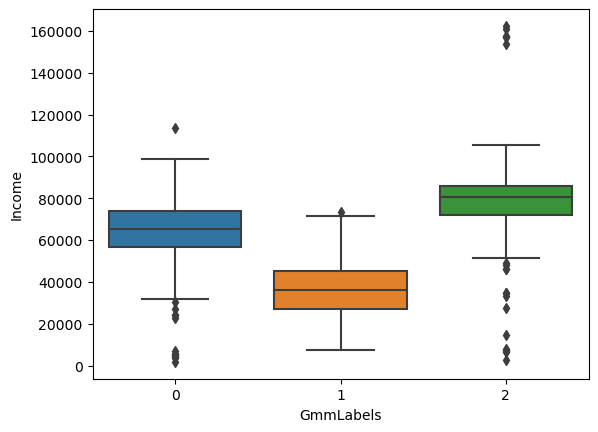

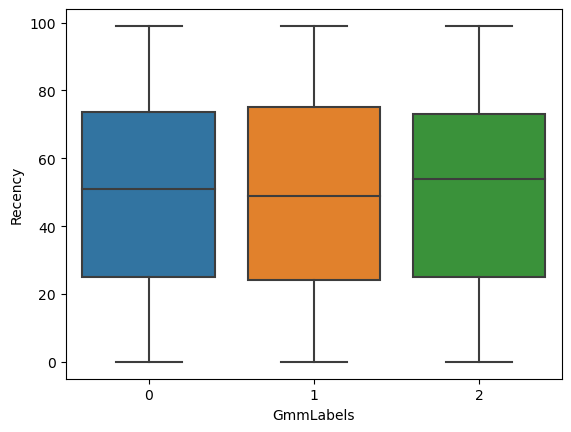

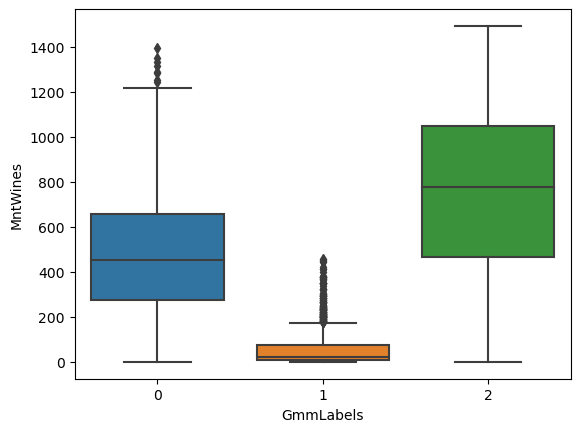

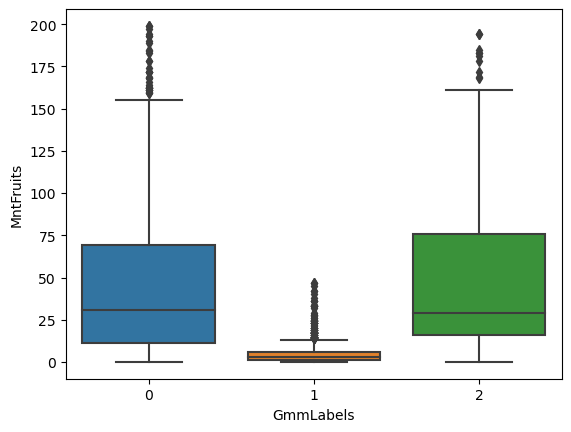

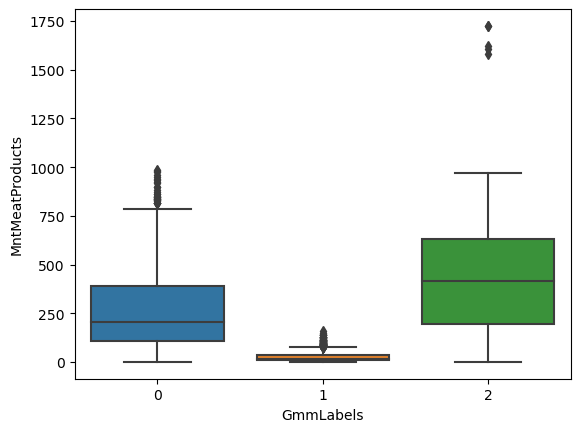

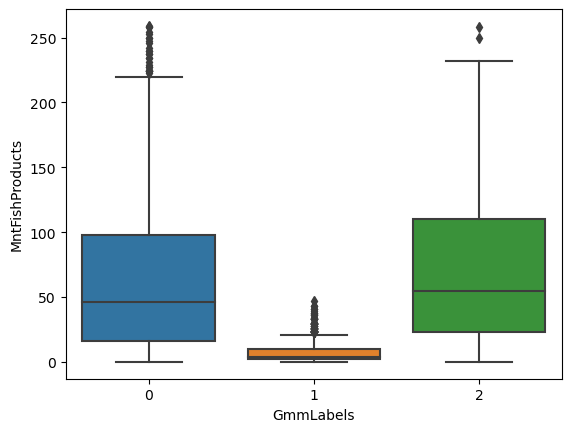

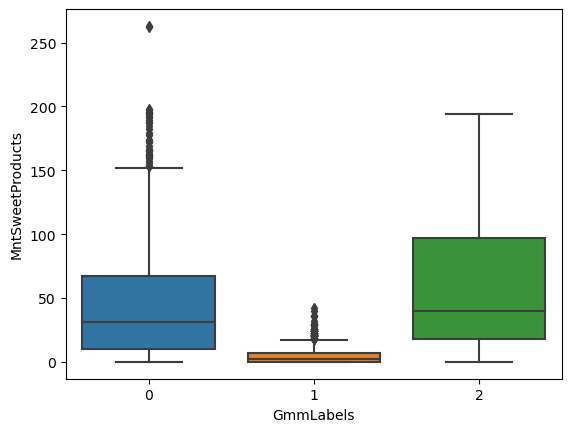

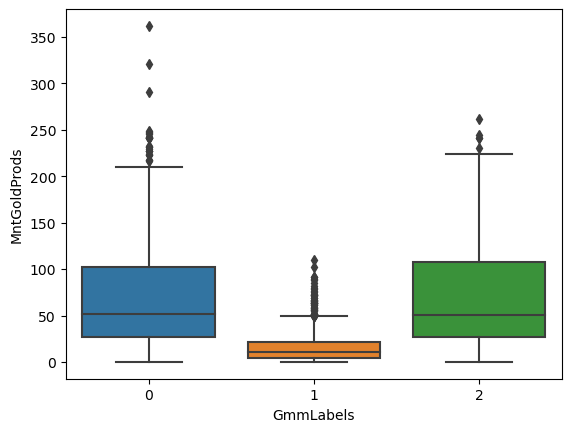

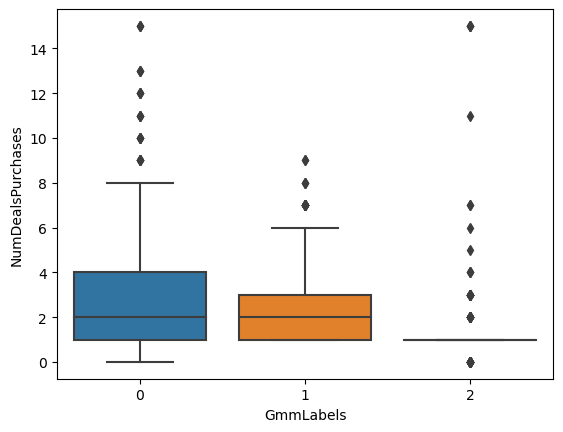

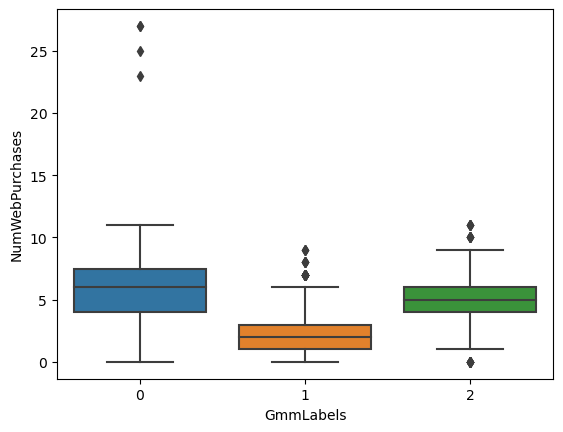

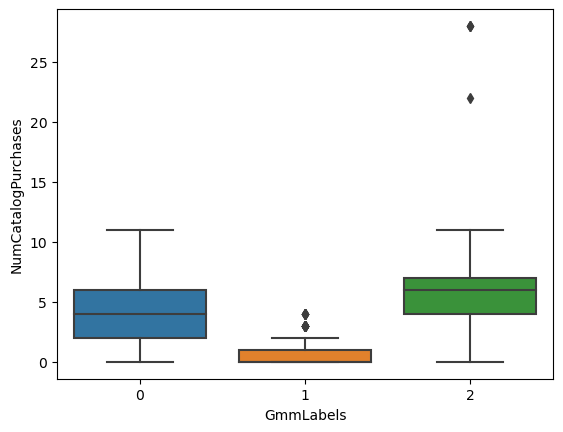

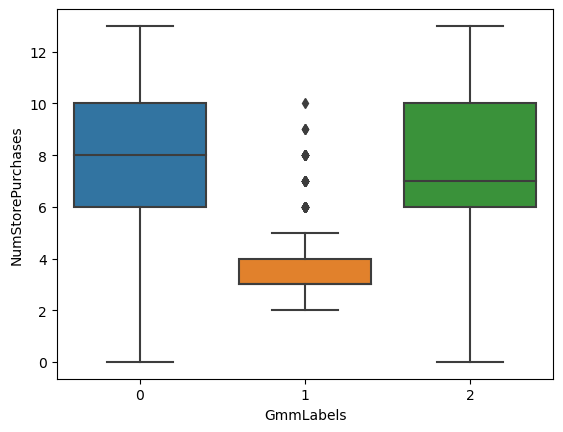

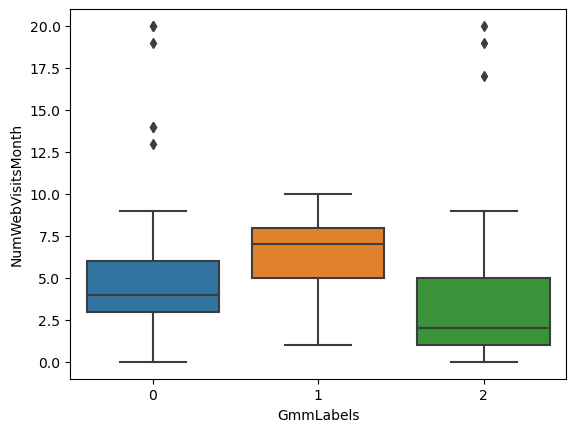

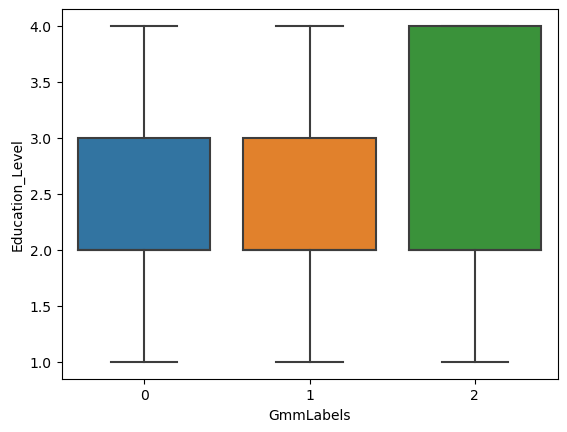

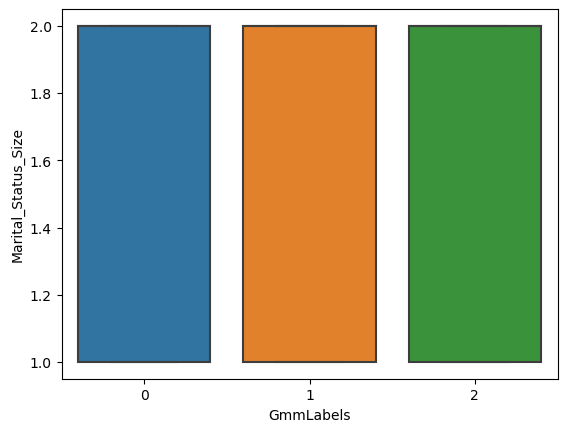

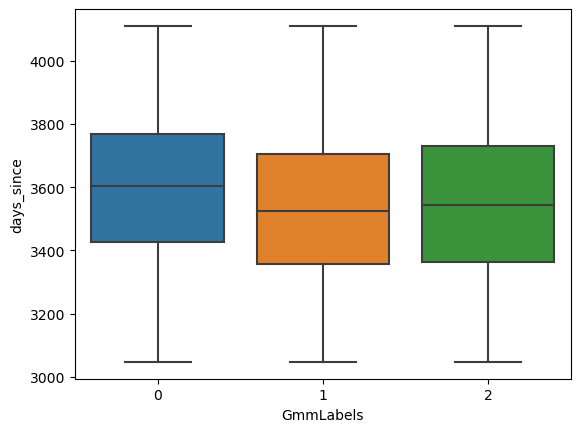

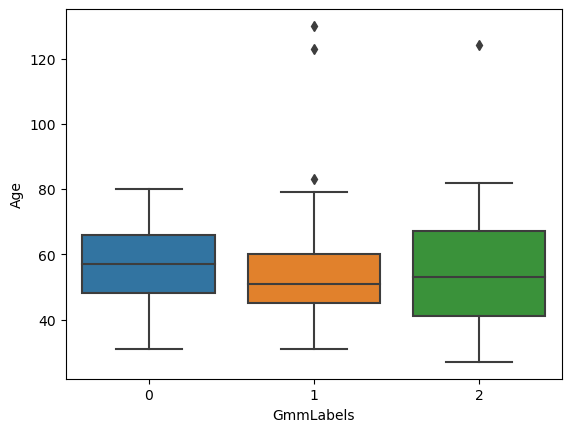

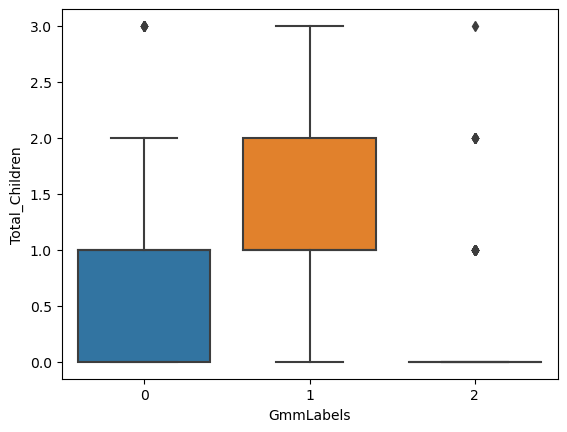

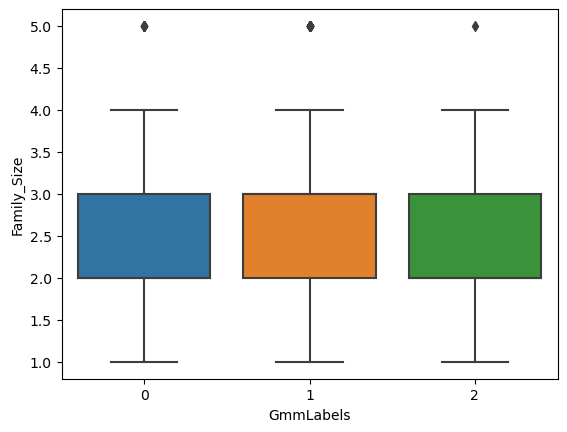

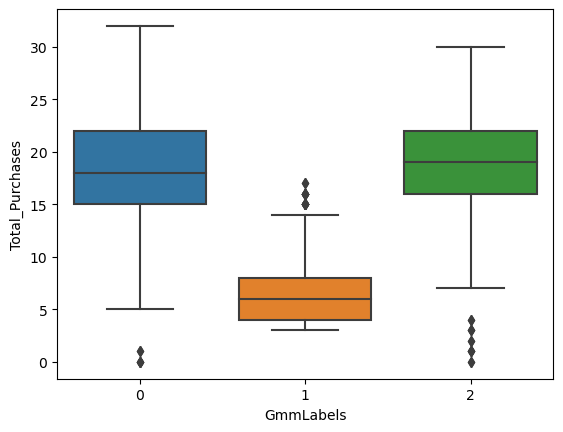

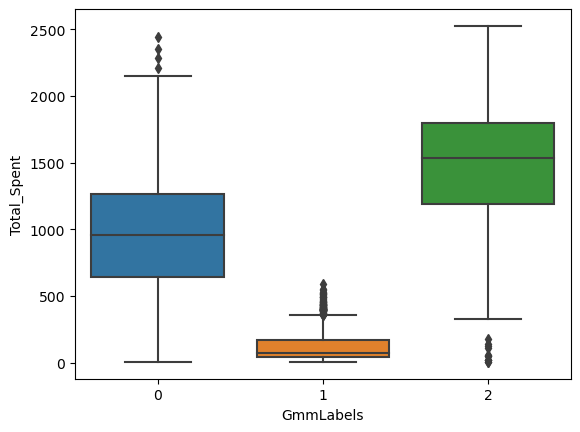

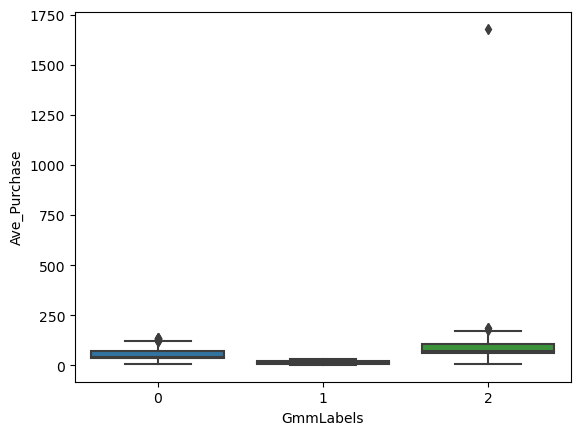

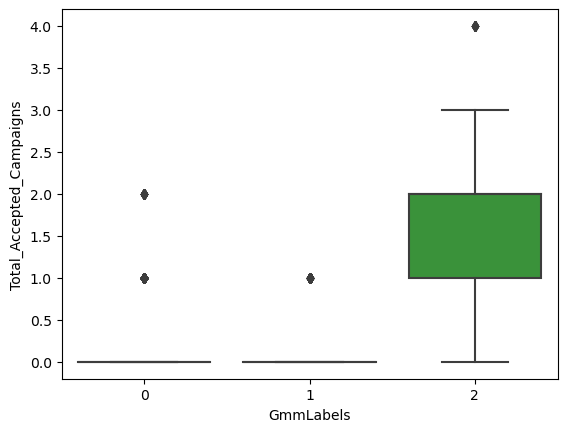

In [150]:
for col in cols_visualise:
    sns.boxplot(x = 'GmmLabels', y = col, data = data)
    
    plt.show()

## Observations
The most noticeable thing with the boxplots is the amount of outliers. All clusters have outliers and almost all the variables have outliers. Below will be another run of gmm, with 2 components and below that, with 4 components.

In [151]:
gmm = GaussianMixture(n_components = 2, random_state = 1)

gmm.fit(data_scaled)

data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)

data['GmmLabels'] = gmm.predict(data_scaled)

In [152]:
data.GmmLabels.value_counts()

1    1583
0     657
Name: GmmLabels, dtype: int64

In [153]:
# Calculating the mean and the median of the original data for each label
original_features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Education_Level', 'Marital_Status_Size', 'days_since', 'Age', 'Total_Children', 'Family_Size', 'Total_Purchases', 'Total_Spent', 'Ave_Purchase', 'Total_Accepted_Campaigns']

mean = data.groupby('GmmLabels').mean()

median = data.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_0 Median', 'group_1 Median']

df_gmm[original_features].T

group_0 Mean  group_1 Mean  group_0 Median  \
Income                    73760.511111  42930.366203    74854.000000   
Recency                      49.013699     49.149084       51.000000   
MntWines                    653.033486    159.048010      629.000000   
MntFruits                    56.080670     13.943146       38.000000   
MntMeatProducts             416.526636     63.367025      396.000000   
MntFishProducts              83.356164     18.504106       65.000000   
MntSweetProducts             60.051750     13.371447       42.000000   
MntGoldProds                 74.400304     31.413771       51.000000   
NumDealsPurchases             1.791476      2.546431        1.000000   
NumWebPurchases               5.147641      3.643714        5.000000   
NumCatalogPurchases           5.468798      1.497157        5.000000   
NumStorePurchases             7.742770      4.979785        8.000000   
NumWebVisitsMonth             3.622527      6.019583        3.000000   
Education_Level               2.634703      2.550221        2.000000   
Marital_Status_Size           1.651446      1.692988        2.000000   
days_since                 3582.599696   3549.266582     3599.000000   
Age                          55.264840     53.749842       54.000000   
Total_Children                0.372907      1.190145        0.000000   
Family_Size                   2.050228      2.878711        2.000000   
Total_Purchases              18.359209     10.120657       18.000000   
Total_Spent                1343.449011    299.647505     1338.000000   
Ave_Purchase                 77.373125     21.950031       71.517241   
Total_Accepted_Campaigns      0.770167      0.101074        0.000000   

                          group_1 Median  
Income                           42373.0  
Recency                             49.0  
MntWines                            62.0  
MntFruits                            4.0  
MntMeatProducts                     28.0  
MntFishProducts                      7.0  
MntSweetProducts                     4.0  
MntGoldProds                        16.0  
NumDealsPurchases                    2.0  
NumWebPurchases                      3.0  
NumCatalogPurchases                  1.0  
NumStorePurchases                    4.0  
NumWebVisitsMonth                    6.0  
Education_Level                      2.0  
Marital_Status_Size                  2.0  
days_since                        3550.0  
Age                                 52.0  
Total_Children                       1.0  
Family_Size                          3.0  
Total_Purchases                      7.0  
Total_Spent                        140.0  
Ave_Purchase                        20.0  
Total_Accepted_Campaigns             0.0

### **Cluster Profiling**

### **Characteristics of each cluster**

**Summary of each cluster:**

Cluster 0 has highest income and spend the most on their purchases. Most of their purchases are in-store, but they use the catalog more than Cluster 1. They are slightly older than Cluster 1 at 55 yrs. They use the most campaigns and have smaller families than Cluster 1. They also have higher education and ave purchase is higher (77 vs 21). <br>

Cluster 1 has lower incomes, larger families, make an ave purchase of 21 with about half as many purchases as Cluster 0. The are an ave of 53 urs old. Most of their purchases are in-store and they visit the web about twice as much as Cluster 0. 

### **Visualize the clusters using PCA**

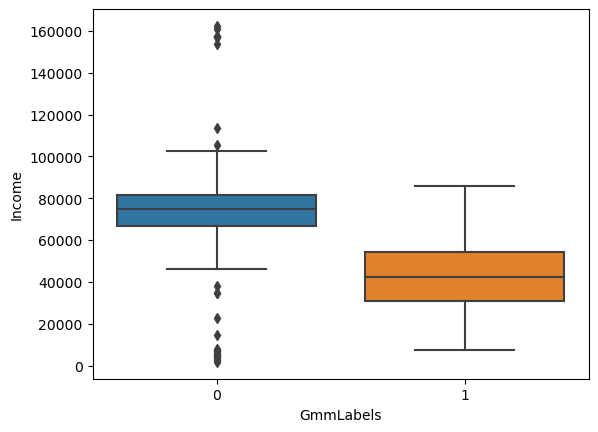

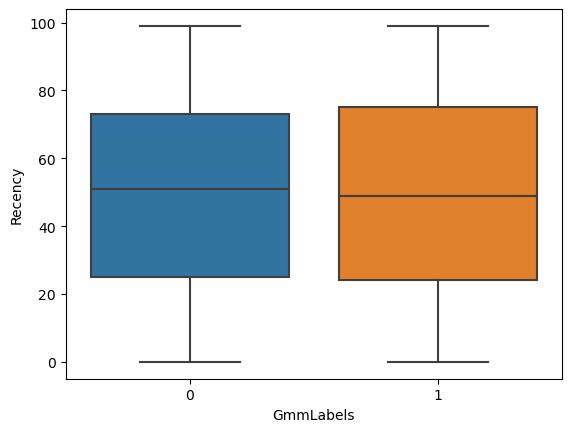

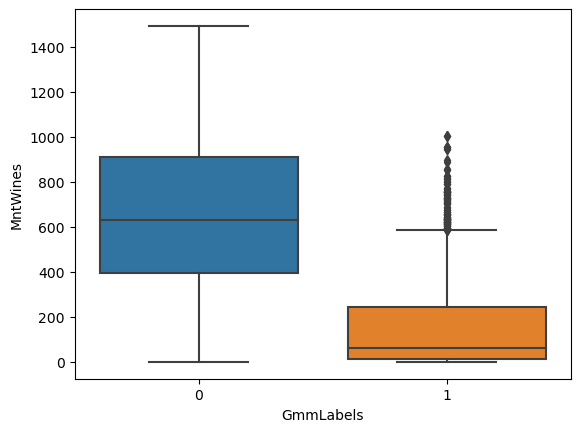

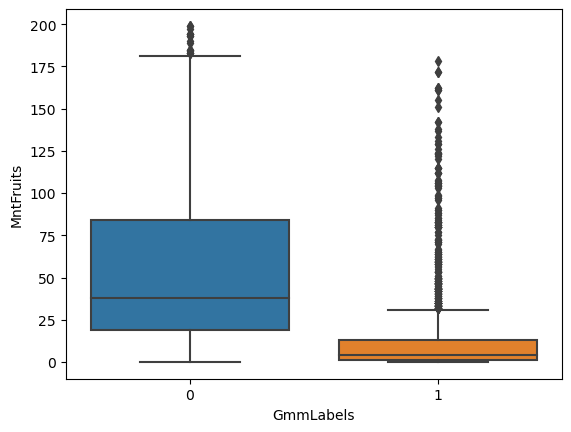

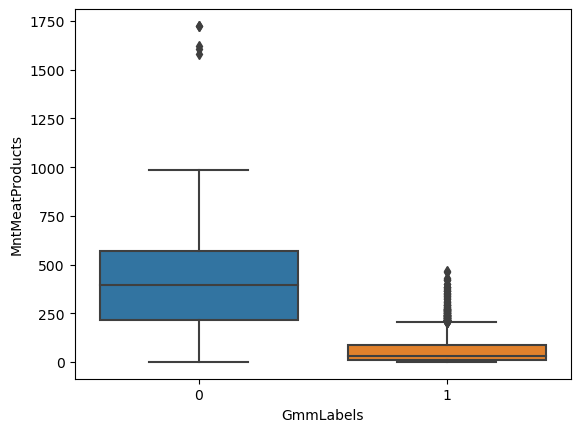

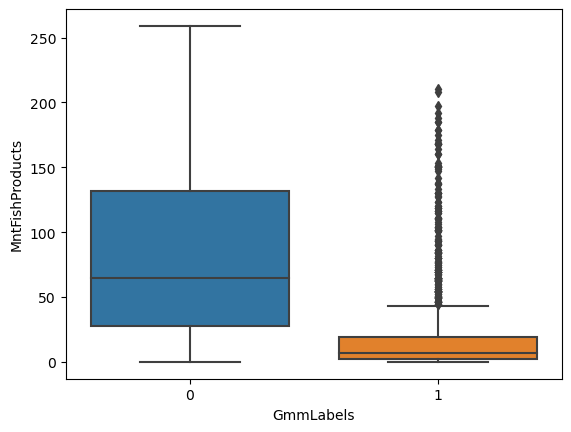

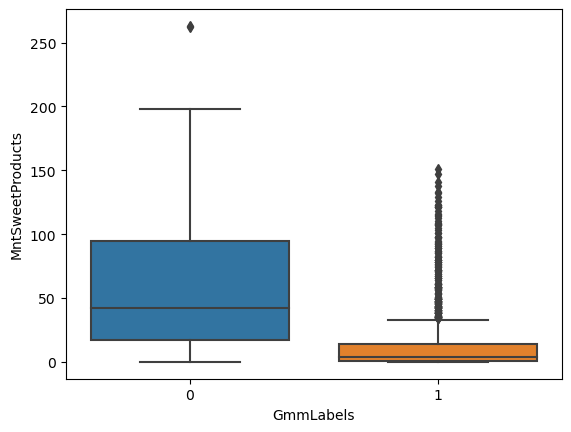

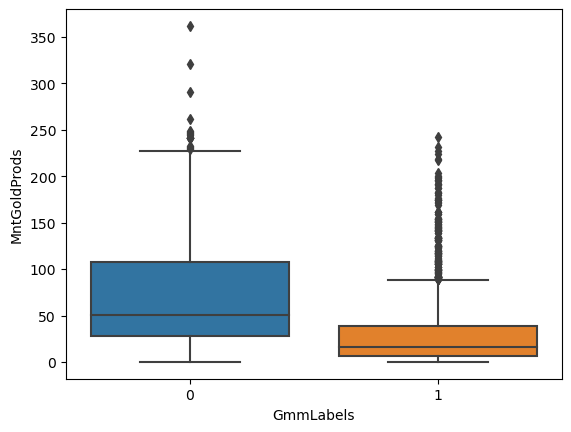

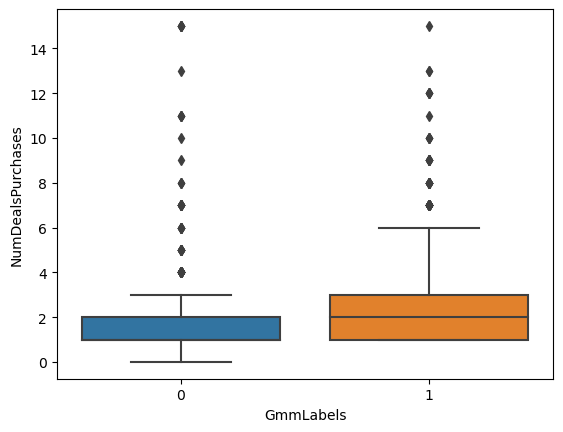

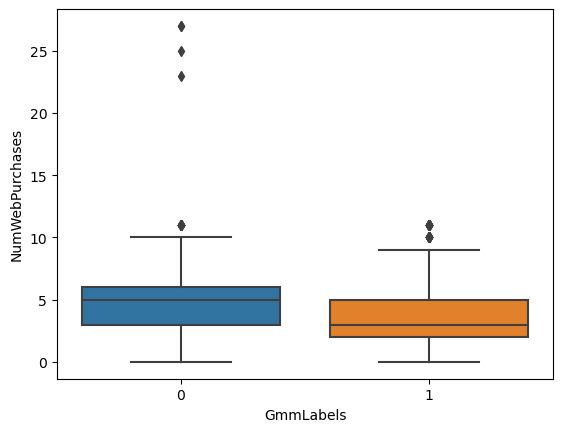

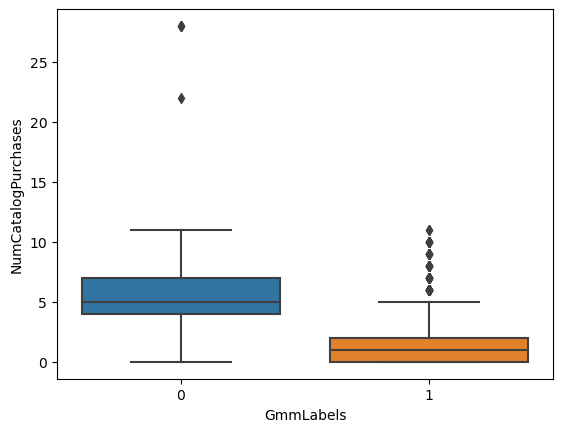

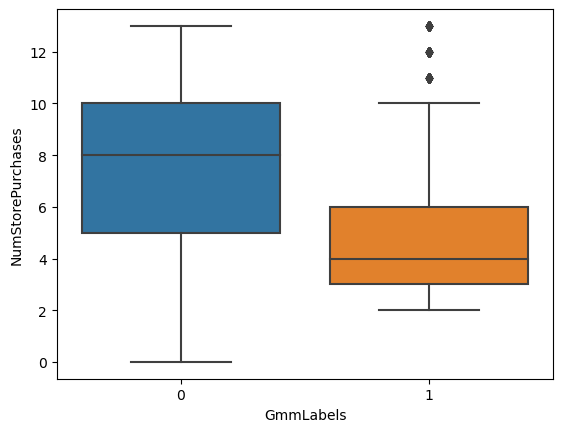

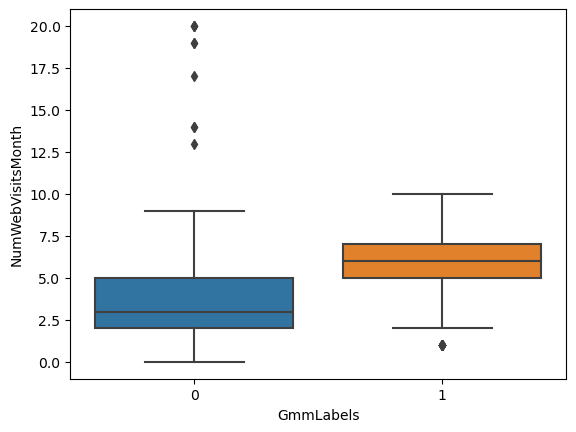

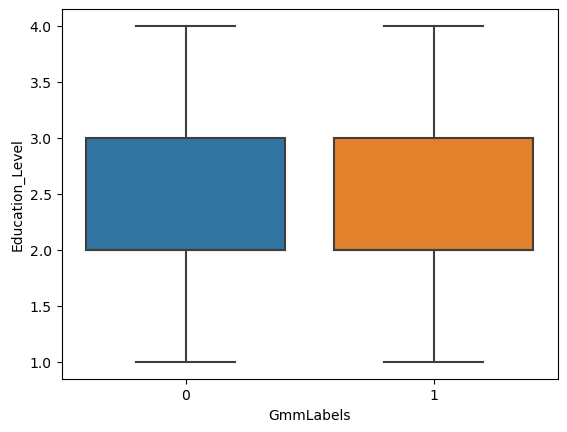

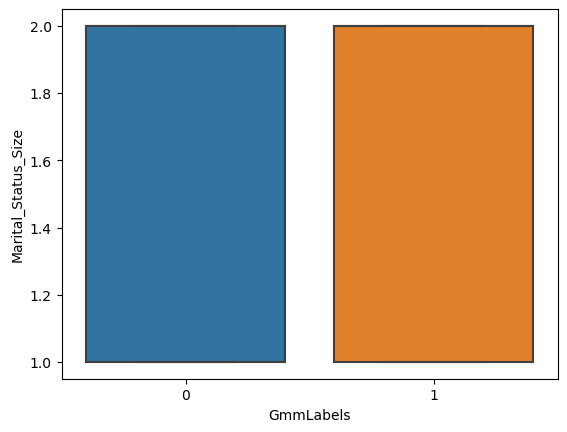

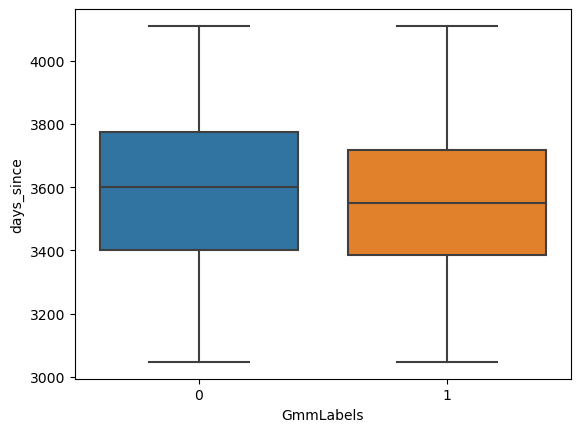

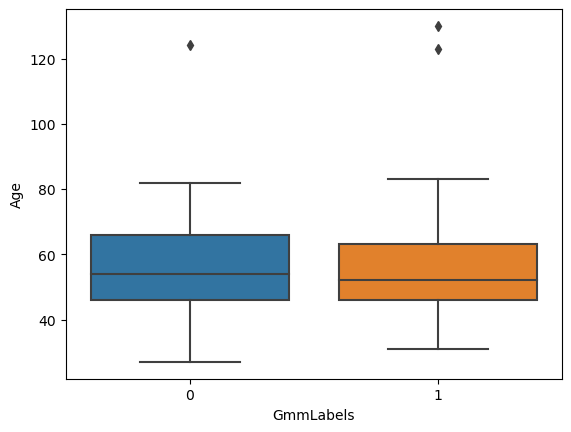

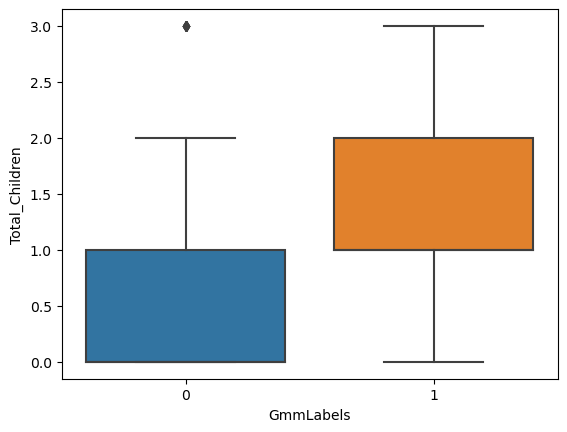

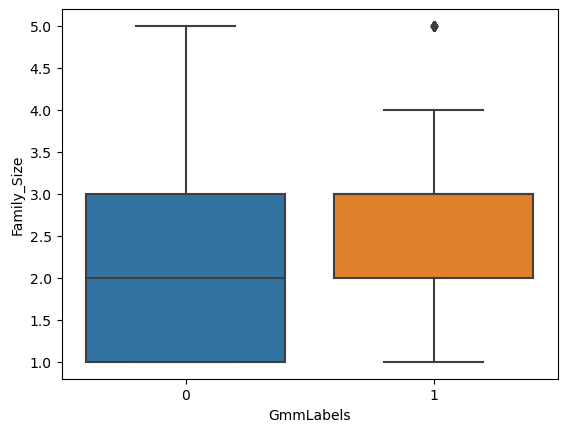

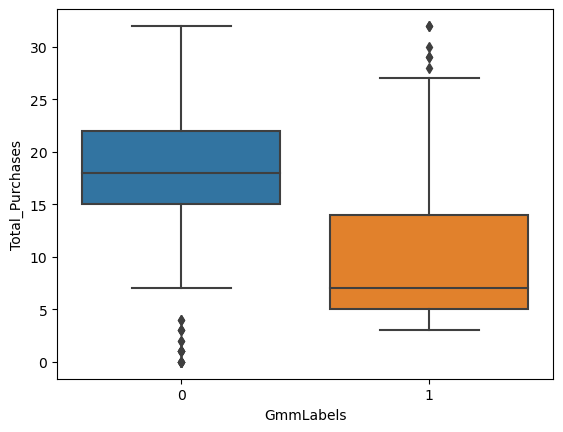

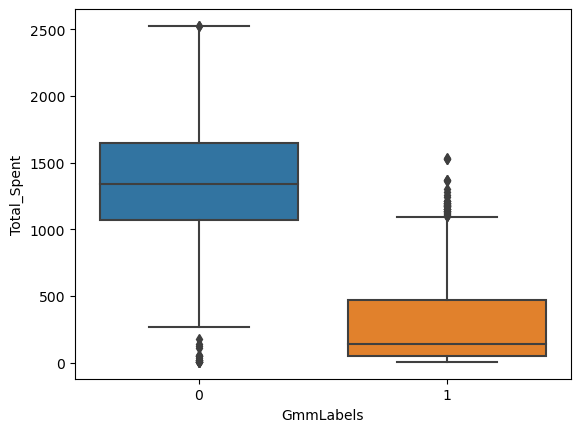

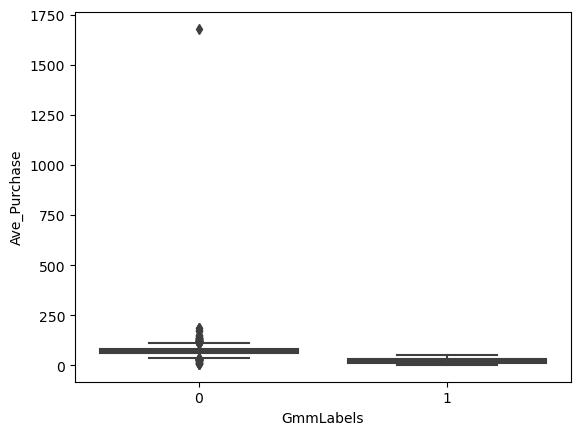

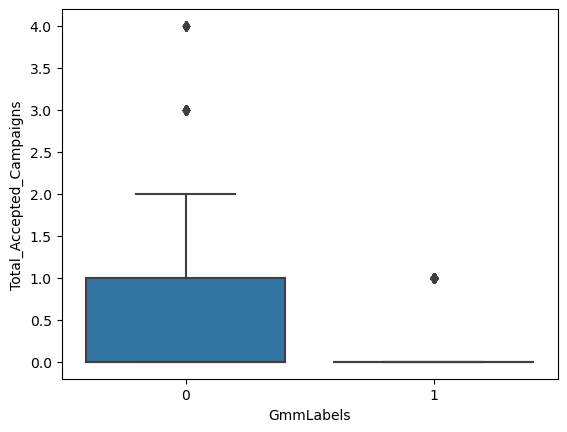

In [154]:
for col in cols_visualise:
    sns.boxplot(x = 'GmmLabels', y = col, data = data)
    
    plt.show()

**Observations and Insights:**


Using gmm with 2 clusters gives a bit better results having fewer outliers, but there are still some. There are likely columns to remove from analysis and other cluster numbers to try to eliminate more outliers. 

## **Conclusion and Recommendations**

<u>**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?</u><br>

The most clear model is kmedoids with 3 clusters. The clusters are distinct and there can be some relevant insights gained. The hierarchical clusters did not work at all so they aren't recommended. The gmm model also worked fairly well with 2 clusters.

<u>**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?</u><br>

The customers can be broken down well by income. Income is directly related to how much they spend and their family size. There could be large, medium and small market segments with specific targets for each- and based on how they make their purchases. For example, the large segment uses the catalog the most and is slightly older than the others. The smallest group researches more online and makes more web purchases.

<u>**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?</u><br>

The KMedoids model is proposed with 3 clusters. These findings were the most clear and provide audience segments that are easy to classify. 